In [1]:
import torch
import math
import matplotlib.pyplot as plt
from utils import SatProblemDataSet
from model import MLP, LayerNormBasicLSTMCell, NeuroSAT, compute_loss, ConfusionMatrix
from tqdm import tqdm
import sys
sys.path.append('utils')

# torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
n = NeuroSAT(128, 3, 3, 16)
# n.load_state_dict(torch.load("snapshots/neurosat10-40_10.pt"))

In [3]:
ds = SatProblemDataSet("data/pickle/train/sr5-10")
dl = torch.utils.data.DataLoader(ds)

In [4]:
optim = torch.optim.Adam(n.parameters(), lr = 1e-5, weight_decay = 1e-10)

In [5]:
n.train()
losses = []
cm = ConfusionMatrix()
for _ in range(10):
    for prob, target in tqdm(dl):
        optim.zero_grad()
        outputs = n(prob[0].float())
        cm.update_one(target[0], outputs > 0)
        cm.pretty_print()
        torch.nn.utils.clip_grad_norm_(n.parameters(), 0.5)
        loss = compute_loss(outputs, target[0], n.parameters())
        desc = 'loss: %.4f; is_sta: %s' % (loss.item(), target[0])
        losses.append(loss.item())
        print(desc)

        loss.backward()
        optim.step()

  0%|          | 0/2000 [00:00<?, ?it/s]/home/l0rem1psum/anaconda3/envs/neurosat/lib/python3.6/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370120218/work/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag
  0%|          | 1/2000 [00:00<16:07,  2.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                0|                  1|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                            -1.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                            -1.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             1.000000|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 2/2000 [00:00<14:23,  2.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                1|                  1|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 3/2000 [00:01<13:52,  2.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                1|                  2|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.666667|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 5/2000 [00:02<13:14,  2.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                2|                  3|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.600000|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 6/2000 [00:02<14:21,  2.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                3|                  3|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 8/2000 [00:03<12:08,  2.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                4|                  4|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 9/2000 [00:03<11:34,  2.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                4|                  5|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.555556|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 10/2000 [00:03<11:16,  2.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                5|                  5|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 11/2000 [00:04<10:26,  3.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                5|                  6|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.545455|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 12/2000 [00:04<10:53,  3.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                6|                  6|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 13/2000 [00:04<10:37,  3.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                6|                  7|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.538462|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 14/2000 [00:05<10:34,  3.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                7|                  7|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 15/2000 [00:05<10:52,  3.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                7|                  8|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.533333|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 17/2000 [00:06<11:02,  2.99it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                8|                  9|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.529412|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 18/2000 [00:06<09:51,  3.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                9|                  9|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 19/2000 [00:06<10:13,  3.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |                9|                 10|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.526316|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 20/2000 [00:06<09:42,  3.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               10|                 10|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 21/2000 [00:07<08:48,  3.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               10|                 11|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.523810|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 23/2000 [00:07<08:03,  4.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               11|                 12|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.521739|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 24/2000 [00:07<08:18,  3.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               12|                 12|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|▏         | 26/2000 [00:08<09:02,  3.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               13|                 13|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|▏         | 28/2000 [00:09<10:23,  3.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               14|                 14|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 30/2000 [00:09<10:30,  3.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               15|                 15|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 31/2000 [00:10<09:53,  3.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               15|                 16|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.516129|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 32/2000 [00:10<09:46,  3.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               16|                 16|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 33/2000 [00:10<09:39,  3.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               16|                 17|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.515152|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 34/2000 [00:11<10:14,  3.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               17|                 17|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 35/2000 [00:11<09:19,  3.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               17|                 18|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.514286|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 36/2000 [00:11<09:40,  3.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               18|                 18|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 37/2000 [00:11<09:54,  3.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               18|                 19|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.513514|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 38/2000 [00:12<10:01,  3.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               19|                 19|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 39/2000 [00:12<09:42,  3.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               19|                 20|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.512821|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 41/2000 [00:13<09:32,  3.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               20|                 21|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.512195|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 43/2000 [00:13<08:07,  4.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               21|                 22|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.511628|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 44/2000 [00:13<08:07,  4.01it/s]

loss: 0.7290; is_sta: tensor([1.])


  2%|▏         | 45/2000 [00:14<08:08,  4.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               22|                 23|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.511111|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 46/2000 [00:14<08:32,  3.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               23|                 23|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 47/2000 [00:14<08:51,  3.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               23|                 24|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.510638|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 48/2000 [00:14<08:30,  3.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               24|                 24|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 49/2000 [00:15<08:38,  3.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               24|                 25|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.510204|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 51/2000 [00:15<09:10,  3.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               25|                 26|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.509804|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 52/2000 [00:16<10:19,  3.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               26|                 26|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 53/2000 [00:16<11:44,  2.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               27|                 27|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 55/2000 [00:17<12:27,  2.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               27|                 28|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.509091|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 56/2000 [00:17<11:55,  2.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               28|                 28|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 57/2000 [00:18<11:28,  2.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               28|                 29|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.508772|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 58/2000 [00:18<11:05,  2.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               29|                 29|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 59/2000 [00:18<10:58,  2.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               29|                 30|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.508475|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 60/2000 [00:19<10:37,  3.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               30|                 30|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 61/2000 [00:19<10:17,  3.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               30|                 31|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.508197|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 62/2000 [00:19<09:47,  3.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               31|                 31|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 63/2000 [00:19<10:03,  3.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               31|                 32|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.507937|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 64/2000 [00:20<09:58,  3.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               32|                 32|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 65/2000 [00:20<09:44,  3.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               32|                 33|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.507692|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 66/2000 [00:20<09:42,  3.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               33|                 33|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 67/2000 [00:21<09:40,  3.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               33|                 34|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.507463|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 68/2000 [00:21<09:42,  3.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               34|                 34|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 69/2000 [00:21<09:20,  3.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               34|                 35|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.507246|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▎         | 70/2000 [00:21<08:26,  3.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               35|                 35|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▎         | 71/2000 [00:22<08:05,  3.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               35|                 36|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.507042|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▎         | 72/2000 [00:22<07:47,  4.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               36|                 36|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▎         | 73/2000 [00:22<07:24,  4.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               36|                 37|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.506849|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▎         | 74/2000 [00:22<07:19,  4.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               37|                 37|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 75/2000 [00:22<07:13,  4.44it/s]

loss: 0.6682; is_sta: tensor([0.])


  4%|▍         | 76/2000 [00:23<07:01,  4.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               38|                 38|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 77/2000 [00:23<06:56,  4.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               38|                 39|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.506494|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 78/2000 [00:23<07:33,  4.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               39|                 39|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 79/2000 [00:23<08:08,  3.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               39|                 40|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.506329|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 80/2000 [00:24<08:17,  3.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               40|                 40|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 81/2000 [00:24<08:32,  3.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               40|                 41|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.506173|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 82/2000 [00:24<08:20,  3.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               41|                 41|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 83/2000 [00:24<08:06,  3.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               41|                 42|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.506024|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 84/2000 [00:25<07:40,  4.16it/s]

loss: 0.7169; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               42|                 43|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.505882|
+--------------------+-----------------+--

  4%|▍         | 86/2000 [00:25<07:31,  4.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               43|                 43|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 87/2000 [00:25<07:45,  4.11it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               43|                 44|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.505747|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 88/2000 [00:26<08:07,  3.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               44|                 44|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 89/2000 [00:26<08:41,  3.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               44|                 45|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.505618|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 90/2000 [00:26<09:07,  3.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               45|                 45|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▍         | 91/2000 [00:27<09:19,  3.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               45|                 46|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.505495|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▍         | 92/2000 [00:27<08:49,  3.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               46|                 46|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▍         | 93/2000 [00:27<08:18,  3.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               46|                 47|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.505376|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▍         | 94/2000 [00:27<07:55,  4.01it/s]

loss: 0.7178; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               47|                 48|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.505263|
+--------------------+-----------------+--

  5%|▍         | 96/2000 [00:28<07:10,  4.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               48|                 48|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▍         | 97/2000 [00:28<07:02,  4.50it/s]

loss: 0.6727; is_sta: tensor([0.])


  5%|▍         | 98/2000 [00:28<06:52,  4.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               49|                 49|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▍         | 99/2000 [00:28<07:26,  4.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               49|                 50|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.505051|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 100/2000 [00:29<07:45,  4.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               50|                 50|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 101/2000 [00:29<08:27,  3.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               50|                 51|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.504950|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 102/2000 [00:29<08:43,  3.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               51|                 51|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 103/2000 [00:30<08:07,  3.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               51|                 52|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.504854|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 104/2000 [00:30<07:52,  4.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               52|                 52|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 105/2000 [00:30<07:20,  4.30it/s]

loss: 0.6842; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               53|                 53|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+--

  5%|▌         | 107/2000 [00:30<06:50,  4.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               53|                 54|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.504673|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 108/2000 [00:31<06:49,  4.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               54|                 54|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 109/2000 [00:31<06:56,  4.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               54|                 55|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.504587|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 110/2000 [00:31<07:15,  4.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               55|                 55|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 111/2000 [00:31<07:00,  4.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               55|                 56|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.504505|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 112/2000 [00:31<06:53,  4.57it/s]

loss: 0.7206; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               56|                 57|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.504425|
+--------------------+-----------------+--

  6%|▌         | 114/2000 [00:32<06:23,  4.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               57|                 57|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 116/2000 [00:32<06:23,  4.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               58|                 58|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 118/2000 [00:33<07:04,  4.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               59|                 59|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 119/2000 [00:33<07:44,  4.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               59|                 60|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.504202|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 120/2000 [00:33<08:24,  3.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               60|                 60|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 121/2000 [00:34<08:48,  3.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               60|                 61|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.504132|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 122/2000 [00:34<09:01,  3.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               61|                 61|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 123/2000 [00:34<08:53,  3.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               61|                 62|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.504065|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 124/2000 [00:35<08:50,  3.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               62|                 62|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▋         | 125/2000 [00:35<08:51,  3.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               62|                 63|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.504000|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▋         | 126/2000 [00:35<08:37,  3.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               63|                 63|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▋         | 127/2000 [00:35<08:37,  3.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               63|                 64|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503937|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▋         | 128/2000 [00:36<08:36,  3.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               64|                 64|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▋         | 129/2000 [00:36<08:50,  3.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               64|                 65|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503876|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▋         | 130/2000 [00:36<09:12,  3.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               65|                 65|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 131/2000 [00:36<08:26,  3.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               65|                 66|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503817|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 132/2000 [00:37<08:07,  3.83it/s]

loss: 0.7111; is_sta: tensor([1.])


  7%|▋         | 133/2000 [00:37<07:56,  3.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               66|                 67|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503759|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 134/2000 [00:37<07:12,  4.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               67|                 67|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 136/2000 [00:38<07:51,  3.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               68|                 68|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 137/2000 [00:38<08:39,  3.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               68|                 69|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503650|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 138/2000 [00:38<09:01,  3.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               69|                 69|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 139/2000 [00:39<09:15,  3.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               69|                 70|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503597|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 141/2000 [00:39<09:47,  3.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               70|                 71|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503546|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 142/2000 [00:40<09:16,  3.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               71|                 71|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 143/2000 [00:40<09:03,  3.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               71|                 72|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503497|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 144/2000 [00:40<08:40,  3.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               72|                 72|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 145/2000 [00:40<08:32,  3.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               72|                 73|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503448|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 146/2000 [00:41<08:58,  3.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               73|                 73|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 147/2000 [00:41<09:00,  3.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               73|                 74|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503401|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 148/2000 [00:41<09:04,  3.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               74|                 74|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 149/2000 [00:42<08:59,  3.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               74|                 75|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503356|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 150/2000 [00:42<09:03,  3.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               75|                 75|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 151/2000 [00:42<08:43,  3.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               75|                 76|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503311|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 152/2000 [00:42<08:28,  3.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               76|                 76|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 153/2000 [00:43<08:34,  3.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               76|                 77|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503268|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 154/2000 [00:43<09:15,  3.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               77|                 77|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 155/2000 [00:43<08:46,  3.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               77|                 78|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503226|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 156/2000 [00:44<08:37,  3.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               78|                 78|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 157/2000 [00:44<08:20,  3.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               78|                 79|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503185|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 158/2000 [00:44<08:39,  3.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               79|                 79|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 159/2000 [00:44<08:32,  3.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               79|                 80|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503145|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 161/2000 [00:45<09:22,  3.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               80|                 81|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503106|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 162/2000 [00:45<09:27,  3.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               81|                 81|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 163/2000 [00:46<09:47,  3.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               81|                 82|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.503067|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 164/2000 [00:46<09:06,  3.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               82|                 82|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 166/2000 [00:47<10:04,  3.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               83|                 83|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 167/2000 [00:47<09:23,  3.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               83|                 84|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502994|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 168/2000 [00:47<08:49,  3.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               84|                 84|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 169/2000 [00:47<08:24,  3.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               84|                 85|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502959|
+--------------------+-----------------+-------------------+
        
loss: 0

  8%|▊         | 170/2000 [00:48<08:13,  3.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               85|                 85|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▊         | 171/2000 [00:48<07:58,  3.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               85|                 86|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502924|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▊         | 172/2000 [00:48<07:55,  3.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               86|                 86|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▊         | 173/2000 [00:48<07:41,  3.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               86|                 87|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502890|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▊         | 174/2000 [00:49<07:36,  4.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               87|                 87|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 175/2000 [00:49<07:28,  4.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               87|                 88|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502857|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 176/2000 [00:49<07:43,  3.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               88|                 88|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 177/2000 [00:49<08:14,  3.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               88|                 89|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502825|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 178/2000 [00:50<08:30,  3.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  0|
| Predicted is_unsat |               89|                 89|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             1.000000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                            -1.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 179/2000 [00:50<08:41,  3.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                0|                  1|
| Predicted is_unsat |               89|                 89|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.000000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.988889|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.000000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.000000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497207|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 180/2000 [00:50<08:33,  3.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               89|                 89|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.011111|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.988889|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.021739|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 181/2000 [00:51<08:25,  3.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               89|                 90|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.011111|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989011|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.021739|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502762|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 182/2000 [00:51<08:14,  3.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               90|                 90|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010989|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989011|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.021505|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 183/2000 [00:51<08:06,  3.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               90|                 91|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010989|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989130|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.021505|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502732|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 184/2000 [00:52<09:15,  3.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               91|                 92|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010870|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989247|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.021277|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502703|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 186/2000 [00:52<10:27,  2.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               92|                 92|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010753|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989247|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.021053|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 187/2000 [00:53<12:56,  2.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               93|                 93|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010638|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989362|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.020833|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

  9%|▉         | 189/2000 [00:54<12:06,  2.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               93|                 94|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010638|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989474|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.020833|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502646|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|▉         | 190/2000 [00:54<10:48,  2.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               94|                 94|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010526|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989474|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.020619|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|▉         | 191/2000 [00:54<10:28,  2.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               94|                 95|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010526|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989583|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.020619|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502618|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|▉         | 192/2000 [00:55<10:55,  2.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               95|                 96|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010417|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989691|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.020408|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502591|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|▉         | 194/2000 [00:55<11:18,  2.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               96|                 96|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010309|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989691|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.020202|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|▉         | 195/2000 [00:56<11:02,  2.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               96|                 97|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010309|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989796|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.020202|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502564|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|▉         | 196/2000 [00:56<10:50,  2.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               97|                 97|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010204|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989796|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.020000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|▉         | 198/2000 [00:57<10:58,  2.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               98|                 98|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010101|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.989899|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.019802|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|▉         | 199/2000 [00:57<10:37,  2.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               98|                 99|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010101|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.019802|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502513|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|█         | 200/2000 [00:58<10:43,  2.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               99|                 99|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.019608|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|█         | 201/2000 [00:58<09:37,  3.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |               99|                100|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.010000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990099|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.019608|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502488|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|█         | 202/2000 [00:58<08:48,  3.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              100|                100|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009901|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990099|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.019417|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|█         | 203/2000 [00:58<08:31,  3.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              100|                101|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009901|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990196|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.019417|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502463|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|█         | 204/2000 [00:59<08:05,  3.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              101|                101|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009804|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990196|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.019231|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|█         | 205/2000 [00:59<08:24,  3.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              101|                102|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009804|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990291|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.019231|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502439|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|█         | 206/2000 [00:59<08:37,  3.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              102|                102|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009709|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990291|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.019048|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|█         | 207/2000 [00:59<09:16,  3.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              102|                103|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009709|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990385|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.019048|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502415|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|█         | 208/2000 [01:00<09:48,  3.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              103|                103|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009615|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990385|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.018868|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|█         | 209/2000 [01:00<09:48,  3.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              103|                104|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009615|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990476|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.018868|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502392|
+--------------------+-----------------+-------------------+
        
loss: 0

 10%|█         | 210/2000 [01:01<09:40,  3.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              104|                104|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009524|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990476|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.018692|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 211/2000 [01:01<10:00,  2.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              104|                105|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009524|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990566|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.018692|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502370|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 212/2000 [01:01<09:53,  3.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              105|                105|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009434|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990566|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.018519|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 213/2000 [01:01<09:11,  3.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              105|                106|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009434|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990654|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.018519|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502347|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 214/2000 [01:02<09:01,  3.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              106|                106|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009346|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990654|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.018349|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 215/2000 [01:02<08:48,  3.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              106|                107|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009346|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990741|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.018349|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502326|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 216/2000 [01:02<08:45,  3.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              107|                107|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009259|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990741|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.018182|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 217/2000 [01:03<08:51,  3.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              107|                108|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009259|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990826|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.018182|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502304|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 218/2000 [01:03<08:20,  3.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              108|                108|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009174|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990826|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.018018|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 219/2000 [01:03<07:51,  3.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              108|                109|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009174|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990909|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.018018|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502283|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 220/2000 [01:03<07:37,  3.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              109|                109|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009091|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990909|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.017857|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 221/2000 [01:04<07:36,  3.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              109|                110|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009091|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990991|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.017857|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502262|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 222/2000 [01:04<08:04,  3.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              110|                110|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009009|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.990991|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.017699|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 223/2000 [01:04<07:41,  3.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              110|                111|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.009009|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991071|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.017699|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502242|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█         | 224/2000 [01:04<07:51,  3.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              111|                111|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008929|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991071|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.017544|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█▏        | 225/2000 [01:05<07:46,  3.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              111|                112|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008929|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991150|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.017544|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502222|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█▏        | 226/2000 [01:05<07:39,  3.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              112|                112|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008850|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991150|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.017391|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█▏        | 227/2000 [01:05<07:29,  3.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              112|                113|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008850|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991228|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.017391|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502203|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█▏        | 228/2000 [01:05<07:32,  3.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              113|                113|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008772|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991228|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.017241|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 11%|█▏        | 229/2000 [01:06<07:49,  3.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              113|                114|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008772|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991304|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.017241|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502183|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 230/2000 [01:06<07:43,  3.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              114|                114|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008696|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991304|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.017094|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 231/2000 [01:06<07:24,  3.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              114|                115|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008696|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991379|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.017094|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502165|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 232/2000 [01:06<07:16,  4.05it/s]

loss: 0.6950; is_sta: tensor([1.])


 12%|█▏        | 233/2000 [01:07<07:16,  4.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              115|                116|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008621|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991453|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.016949|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502146|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 234/2000 [01:07<07:23,  3.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              116|                116|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008547|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991453|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.016807|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 235/2000 [01:07<07:23,  3.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              116|                117|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008547|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991525|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.016807|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502128|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 236/2000 [01:07<07:22,  3.99it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  1|
| Predicted is_unsat |              117|                117|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008475|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.991525|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.016667|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 237/2000 [01:08<07:03,  4.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                1|                  2|
| Predicted is_unsat |              117|                117|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.008475|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.983193|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.333333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.016529|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497890|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 238/2000 [01:08<06:50,  4.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                2|                  2|
| Predicted is_unsat |              117|                117|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.016807|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.983193|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.032520|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 239/2000 [01:08<06:42,  4.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                2|                  3|
| Predicted is_unsat |              117|                117|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.016807|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.975000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.400000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.032258|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497908|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 240/2000 [01:08<07:11,  4.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              117|                117|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.025000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.975000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.047619|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 242/2000 [01:09<08:06,  3.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              118|                118|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.024793|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.975207|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.047244|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 243/2000 [01:09<08:44,  3.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              118|                119|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.024793|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.975410|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.047244|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502058|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 244/2000 [01:10<09:18,  3.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              119|                119|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.024590|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.975410|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.046875|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 245/2000 [01:10<09:05,  3.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              119|                120|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.024590|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.975610|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.046875|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502041|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 246/2000 [01:10<08:24,  3.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              120|                120|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.024390|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.975610|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.046512|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 247/2000 [01:10<07:36,  3.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              120|                121|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.024390|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.975806|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.046512|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502024|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▏        | 249/2000 [01:11<06:43,  4.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              121|                122|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.024194|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.976000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.046154|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.502008|
+--------------------+-----------------+-------------------+
        
loss: 0

 12%|█▎        | 250/2000 [01:11<06:38,  4.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              122|                122|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.024000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.976000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.045802|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 13%|█▎        | 251/2000 [01:11<06:37,  4.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              122|                123|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.024000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.976190|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.045802|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.501992|
+--------------------+-----------------+-------------------+
        
loss: 0

 13%|█▎        | 253/2000 [01:12<05:55,  4.91it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              123|                124|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.023810|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.976378|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.045455|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.501976|
+--------------------+-----------------+-------------------+
        
loss: 0

 13%|█▎        | 255/2000 [01:12<06:20,  4.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              124|                125|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.023622|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.976562|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.045113|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.501961|
+--------------------+-----------------+-------------------+
        
loss: 0

 13%|█▎        | 256/2000 [01:12<06:48,  4.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              125|                125|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.023438|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.976562|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.044776|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 13%|█▎        | 257/2000 [01:13<06:26,  4.51it/s]

loss: 0.6857; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  3|
| Predicted is_unsat |              126|                126|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.023256|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.976744|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.044444|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+--

 13%|█▎        | 258/2000 [01:13<06:24,  4.54it/s]

loss: 0.7013; is_sta: tensor([1.])


 13%|█▎        | 259/2000 [01:13<06:25,  4.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                3|                  4|
| Predicted is_unsat |              126|                126|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.023256|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.969231|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.428571|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.044118|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498069|
+--------------------+-----------------+-------------------+
        
loss: 0

 13%|█▎        | 260/2000 [01:13<06:17,  4.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                4|                  4|
| Predicted is_unsat |              126|                126|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.030769|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.969231|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.057971|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 13%|█▎        | 261/2000 [01:13<06:10,  4.69it/s]

loss: 0.6811; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                4|                  4|
| Predicted is_unsat |              127|                127|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.030534|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.969466|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.057554|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+--

 13%|█▎        | 263/2000 [01:14<05:51,  4.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                4|                  4|
| Predicted is_unsat |              127|                128|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.030534|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.969697|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.057554|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.501901|
+--------------------+-----------------+-------------------+
        
loss: 0

 13%|█▎        | 265/2000 [01:14<05:41,  5.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                4|                  4|
| Predicted is_unsat |              128|                129|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.030303|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.969925|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.057143|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.501887|
+--------------------+-----------------+-------------------+
        
loss: 0

 13%|█▎        | 266/2000 [01:14<05:46,  5.01it/s]

loss: 0.6999; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                4|                  4|
| Predicted is_unsat |              129|                130|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.030075|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.970149|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.056738|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.501873|
+--------------------+-----------------+--

 13%|█▎        | 267/2000 [01:15<05:56,  4.86it/s]

loss: 0.6893; is_sta: tensor([0.])


 13%|█▎        | 268/2000 [01:15<06:47,  4.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                4|                  4|
| Predicted is_unsat |              130|                130|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.029851|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.970149|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.056338|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 13%|█▎        | 269/2000 [01:15<07:20,  3.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                4|                  4|
| Predicted is_unsat |              130|                131|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.029851|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.970370|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.056338|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.501859|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▎        | 270/2000 [01:15<07:45,  3.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                4|                  4|
| Predicted is_unsat |              131|                131|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.029630|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.970370|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.055944|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▎        | 271/2000 [01:16<08:09,  3.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                4|                  4|
| Predicted is_unsat |              131|                132|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.029630|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.970588|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.055944|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.501845|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▎        | 272/2000 [01:16<08:23,  3.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                4|                  4|
| Predicted is_unsat |              132|                132|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.029412|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.970588|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.500000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.055556|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.500000|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▎        | 273/2000 [01:16<08:00,  3.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                4|                  5|
| Predicted is_unsat |              132|                132|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.029412|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.963504|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.055172|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498168|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▎        | 274/2000 [01:17<07:23,  3.89it/s]

loss: 0.6887; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              132|                132|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036496|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956522|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.067568|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498182|
+--------------------+-----------------+--

 14%|█▍        | 276/2000 [01:17<06:35,  4.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              133|                132|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036232|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956522|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.067114|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496377|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▍        | 277/2000 [01:17<06:27,  4.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              133|                133|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036232|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956835|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.067114|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498195|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▍        | 278/2000 [01:17<06:20,  4.53it/s]

loss: 0.7114; is_sta: tensor([1.])


 14%|█▍        | 279/2000 [01:18<06:26,  4.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              134|                134|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035971|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.066667|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498208|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▍        | 280/2000 [01:18<06:16,  4.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              135|                134|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035714|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.066225|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496429|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▍        | 281/2000 [01:18<06:08,  4.66it/s]

loss: 0.6793; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              136|                135|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035461|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957447|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.065789|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496454|
+--------------------+-----------------+--

 14%|█▍        | 283/2000 [01:19<06:25,  4.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              136|                136|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035461|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957746|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.065789|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498233|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▍        | 284/2000 [01:19<06:46,  4.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              137|                136|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035211|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957746|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.065359|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496479|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▍        | 285/2000 [01:19<06:55,  4.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              137|                137|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035211|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958042|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.065359|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498246|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▍        | 286/2000 [01:19<07:05,  4.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              138|                137|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034965|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958042|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064935|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496503|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▍        | 287/2000 [01:20<07:48,  3.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              138|                138|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034965|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064935|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498258|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▍        | 288/2000 [01:20<07:37,  3.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              139|                138|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034722|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064516|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496528|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▍        | 289/2000 [01:20<07:38,  3.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              139|                139|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034722|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958621|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064516|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498270|
+--------------------+-----------------+-------------------+
        
loss: 0

 14%|█▍        | 290/2000 [01:20<07:47,  3.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              140|                139|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034483|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958621|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064103|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496552|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▍        | 291/2000 [01:21<07:31,  3.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              140|                140|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034483|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958904|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064103|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498282|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▍        | 292/2000 [01:21<07:15,  3.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              141|                140|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034247|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958904|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.063694|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496575|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▍        | 293/2000 [01:21<06:54,  4.11it/s]

loss: 0.6909; is_sta: tensor([0.])


 15%|█▍        | 294/2000 [01:21<06:46,  4.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              142|                141|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034014|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959184|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.063291|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496599|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▍        | 295/2000 [01:22<06:45,  4.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              142|                142|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034014|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959459|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.063291|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498305|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▍        | 296/2000 [01:22<06:33,  4.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              143|                142|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033784|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959459|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062893|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496622|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▍        | 297/2000 [01:22<06:23,  4.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              143|                143|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033784|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959732|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062893|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498316|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▍        | 298/2000 [01:22<06:15,  4.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              144|                143|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033557|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959732|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062500|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496644|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▌        | 300/2000 [01:23<05:51,  4.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              145|                144|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062112|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496667|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▌        | 302/2000 [01:23<05:41,  4.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              146|                145|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033113|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960265|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.061728|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496689|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▌        | 303/2000 [01:23<05:43,  4.94it/s]

loss: 0.6925; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              147|                146|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.032895|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960526|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.061350|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496711|
+--------------------+-----------------+--

 15%|█▌        | 305/2000 [01:24<05:23,  5.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              147|                147|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.032895|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960784|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.061350|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498361|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▌        | 307/2000 [01:24<05:50,  4.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              148|                148|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.032680|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961039|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.060976|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498371|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▌        | 308/2000 [01:24<06:24,  4.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              149|                148|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.032468|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961039|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.060606|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496753|
+--------------------+-----------------+-------------------+
        
loss: 0

 15%|█▌        | 309/2000 [01:25<06:23,  4.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              149|                149|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.032468|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961290|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.060606|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498382|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▌        | 310/2000 [01:25<06:59,  4.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  6|
| Predicted is_unsat |              150|                149|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.032258|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961290|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.060241|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496774|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▌        | 311/2000 [01:25<07:05,  3.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                5|                  7|
| Predicted is_unsat |              150|                149|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.032258|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955128|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.416667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.059880|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495177|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▌        | 312/2000 [01:25<06:44,  4.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                6|                  7|
| Predicted is_unsat |              150|                149|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038462|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955128|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.071006|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496795|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▌        | 313/2000 [01:26<06:38,  4.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                6|                  7|
| Predicted is_unsat |              150|                150|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038462|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955414|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.071006|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498403|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▌        | 314/2000 [01:26<06:36,  4.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                6|                  7|
| Predicted is_unsat |              151|                150|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038217|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955414|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.070588|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496815|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▌        | 315/2000 [01:26<06:24,  4.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                6|                  7|
| Predicted is_unsat |              151|                151|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038217|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955696|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.070588|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498413|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▌        | 316/2000 [01:26<06:16,  4.47it/s]

loss: 0.7027; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                6|                  8|
| Predicted is_unsat |              152|                151|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037975|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.949686|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.428571|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.069767|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495268|
+--------------------+-----------------+--

 16%|█▌        | 317/2000 [01:26<06:06,  4.59it/s]

loss: 0.6983; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              152|                151|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044025|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.949686|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080460|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496855|
+--------------------+-----------------+--

 16%|█▌        | 319/2000 [01:27<06:08,  4.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              152|                152|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044025|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080460|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498433|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▌        | 320/2000 [01:27<06:05,  4.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              153|                152|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043750|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496875|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▌        | 321/2000 [01:27<07:03,  3.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              153|                153|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043750|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950311|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498442|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▌        | 322/2000 [01:28<07:05,  3.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              154|                153|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043478|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950311|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079545|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496894|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▌        | 323/2000 [01:28<06:54,  4.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              154|                154|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043478|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950617|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079545|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498452|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▌        | 324/2000 [01:28<07:15,  3.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              155|                154|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043210|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950617|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079096|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496914|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▋        | 325/2000 [01:28<07:05,  3.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              155|                155|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043210|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950920|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079096|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498462|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▋        | 326/2000 [01:29<07:01,  3.97it/s]

loss: 0.6996; is_sta: tensor([1.])


 16%|█▋        | 327/2000 [01:29<07:43,  3.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              156|                156|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.042945|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.951220|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.078652|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498471|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▋        | 328/2000 [01:29<07:42,  3.62it/s]

loss: 0.7001; is_sta: tensor([1.])


 16%|█▋        | 329/2000 [01:29<07:24,  3.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              157|                157|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.042683|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.951515|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.078212|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498480|
+--------------------+-----------------+-------------------+
        
loss: 0

 16%|█▋        | 330/2000 [01:30<07:37,  3.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              158|                157|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.042424|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.951515|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.077778|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496970|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 331/2000 [01:30<08:11,  3.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              159|                158|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.042169|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.951807|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.077348|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496988|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 332/2000 [01:31<09:46,  2.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              159|                159|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.042169|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952096|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.077348|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498498|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 333/2000 [01:31<11:32,  2.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              160|                159|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041916|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952096|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.076923|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497006|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 334/2000 [01:32<11:43,  2.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              160|                160|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041916|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952381|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.076923|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498507|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 335/2000 [01:32<12:27,  2.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              161|                160|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041667|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952381|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.076503|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497024|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 336/2000 [01:33<15:49,  1.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              161|                161|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041667|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952663|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.076503|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498516|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 337/2000 [01:34<16:23,  1.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              162|                161|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041420|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952663|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.076087|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497041|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 338/2000 [01:34<17:45,  1.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              162|                162|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041420|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952941|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.076087|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498525|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 339/2000 [01:35<18:39,  1.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              163|                162|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041176|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952941|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.075676|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497059|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 340/2000 [01:36<18:48,  1.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              163|                163|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041176|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953216|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.075676|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498534|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 341/2000 [01:36<17:44,  1.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              164|                163|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040936|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953216|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.075269|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497076|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 343/2000 [01:37<13:28,  2.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              164|                164|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040936|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953488|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.075269|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498542|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 344/2000 [01:37<12:13,  2.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              165|                164|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040698|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953488|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.074866|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497093|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 345/2000 [01:38<10:20,  2.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              165|                165|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040698|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953757|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.074866|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498551|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 346/2000 [01:38<08:58,  3.07it/s]

loss: 0.7053; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              166|                166|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040462|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954023|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.074468|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498559|
+--------------------+-----------------+--

 17%|█▋        | 347/2000 [01:38<08:40,  3.18it/s]

loss: 0.6872; is_sta: tensor([0.])


 17%|█▋        | 348/2000 [01:38<07:57,  3.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              167|                166|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040230|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954023|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.074074|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497126|
+--------------------+-----------------+-------------------+
        
loss: 0

 17%|█▋        | 349/2000 [01:39<07:19,  3.76it/s]

loss: 0.6805; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              168|                167|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954286|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.073684|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497143|
+--------------------+-----------------+--

 18%|█▊        | 351/2000 [01:39<07:16,  3.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              168|                168|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954545|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.073684|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498575|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 353/2000 [01:39<06:04,  4.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              169|                169|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.039773|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954802|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.073298|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498584|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 354/2000 [01:40<06:12,  4.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              170|                169|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.039548|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954802|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.072917|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497175|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 355/2000 [01:40<06:45,  4.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              170|                170|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.039548|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955056|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.072917|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498592|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 356/2000 [01:40<06:59,  3.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              171|                170|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.039326|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955056|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.072539|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497191|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 357/2000 [01:41<06:58,  3.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              171|                171|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.039326|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955307|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.072539|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498599|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 358/2000 [01:41<06:19,  4.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              172|                171|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.039106|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955307|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.072165|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497207|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 359/2000 [01:41<06:07,  4.46it/s]

loss: 0.6805; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              173|                172|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038889|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955556|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.071795|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497222|
+--------------------+-----------------+--

 18%|█▊        | 361/2000 [01:41<06:22,  4.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              173|                173|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038889|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955801|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.071795|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498615|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 362/2000 [01:42<06:12,  4.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              174|                173|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038674|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955801|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.071429|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497238|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 363/2000 [01:42<05:50,  4.68it/s]

loss: 0.6835; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              175|                174|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038462|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956044|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.071066|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497253|
+--------------------+-----------------+--

 18%|█▊        | 364/2000 [01:42<06:10,  4.42it/s]

loss: 0.7038; is_sta: tensor([1.])


 18%|█▊        | 365/2000 [01:42<06:21,  4.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              175|                175|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038462|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956284|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.071066|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498630|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 366/2000 [01:42<06:12,  4.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              176|                175|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038251|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956284|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.070707|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497268|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 367/2000 [01:43<06:20,  4.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              176|                176|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038251|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956522|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.070707|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498638|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 368/2000 [01:43<06:17,  4.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              177|                176|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038043|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956522|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.070352|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497283|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 369/2000 [01:43<06:05,  4.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              177|                177|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038043|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956757|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.070352|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498645|
+--------------------+-----------------+-------------------+
        
loss: 0

 18%|█▊        | 370/2000 [01:43<05:41,  4.78it/s]

loss: 0.7014; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              178|                178|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037838|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956989|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.070000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498652|
+--------------------+-----------------+--

 19%|█▊        | 371/2000 [01:44<06:16,  4.32it/s]

loss: 0.6829; is_sta: tensor([0.])


 19%|█▊        | 372/2000 [01:44<06:23,  4.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              179|                178|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037634|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956989|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.069652|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497312|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▊        | 374/2000 [01:44<05:30,  4.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              180|                179|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037433|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957219|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.069307|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497326|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 375/2000 [01:45<06:22,  4.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              180|                180|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037433|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957447|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.069307|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498667|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 377/2000 [01:45<08:28,  3.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              181|                181|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037234|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957672|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.068966|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498674|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 378/2000 [01:46<08:13,  3.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  8|
| Predicted is_unsat |              182|                181|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037037|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957672|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.466667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.068627|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497354|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 379/2000 [01:46<08:24,  3.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                7|                  9|
| Predicted is_unsat |              182|                181|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037037|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952632|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.437500|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.068293|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496042|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 380/2000 [01:46<07:53,  3.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              182|                181|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.042105|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952632|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.077295|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497368|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 381/2000 [01:46<07:38,  3.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              182|                182|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.042105|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952880|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.077295|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498688|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 382/2000 [01:47<07:26,  3.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              183|                182|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041885|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952880|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.076923|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497382|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 383/2000 [01:47<08:04,  3.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              184|                183|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041667|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953125|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.076555|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497396|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 384/2000 [01:47<08:36,  3.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              184|                184|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041667|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953368|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.076555|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498701|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 386/2000 [01:48<08:57,  3.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              185|                184|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041451|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953368|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.076190|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497409|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 387/2000 [01:48<08:01,  3.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              185|                185|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041451|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953608|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.076190|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498708|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 388/2000 [01:49<07:22,  3.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              186|                185|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041237|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953608|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.075829|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497423|
+--------------------+-----------------+-------------------+
        
loss: 0

 19%|█▉        | 389/2000 [01:49<06:44,  3.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              186|                186|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041237|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953846|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.075829|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498715|
+--------------------+-----------------+-------------------+
        
loss: 0

 20%|█▉        | 390/2000 [01:49<06:14,  4.30it/s]

loss: 0.7040; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              187|                187|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.041026|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954082|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.075472|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498721|
+--------------------+-----------------+--

 20%|█▉        | 392/2000 [01:49<05:55,  4.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              188|                187|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040816|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954082|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.075117|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497449|
+--------------------+-----------------+-------------------+
        
loss: 0

 20%|█▉        | 393/2000 [01:50<05:43,  4.68it/s]

loss: 0.6832; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              189|                188|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040609|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954315|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.074766|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497462|
+--------------------+-----------------+--

 20%|█▉        | 395/2000 [01:50<05:36,  4.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              189|                189|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040609|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954545|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.074766|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498734|
+--------------------+-----------------+-------------------+
        
loss: 0

 20%|█▉        | 396/2000 [01:50<06:07,  4.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              190|                189|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040404|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954545|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.074419|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497475|
+--------------------+-----------------+-------------------+
        
loss: 0

 20%|█▉        | 397/2000 [01:51<06:05,  4.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              190|                190|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040404|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954774|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.074419|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498741|
+--------------------+-----------------+-------------------+
        
loss: 0

 20%|█▉        | 398/2000 [01:51<05:49,  4.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              191|                190|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040201|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954774|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.074074|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497487|
+--------------------+-----------------+-------------------+
        
loss: 0

 20%|█▉        | 399/2000 [01:51<05:48,  4.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              191|                191|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040201|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.074074|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498747|
+--------------------+-----------------+-------------------+
        
loss: 0

 20%|██        | 400/2000 [01:51<05:42,  4.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              192|                191|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.073733|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497500|
+--------------------+-----------------+-------------------+
        
loss: 0

 20%|██        | 402/2000 [01:52<05:06,  5.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              193|                192|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.039801|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955224|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.073394|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497512|
+--------------------+-----------------+-------------------+
        
loss: 0

 20%|██        | 404/2000 [01:52<04:53,  5.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              194|                193|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.039604|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955446|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.073059|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497525|
+--------------------+-----------------+-------------------+
        
loss: 0

 20%|██        | 406/2000 [01:52<04:39,  5.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              195|                194|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.039409|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955665|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.072727|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497537|
+--------------------+-----------------+-------------------+
        
loss: 0

 20%|██        | 408/2000 [01:53<04:36,  5.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              196|                195|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.039216|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955882|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.072398|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497549|
+--------------------+-----------------+-------------------+
        
loss: 0

 20%|██        | 410/2000 [01:53<04:50,  5.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              197|                196|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.039024|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956098|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.072072|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497561|
+--------------------+-----------------+-------------------+
        
loss: 0

 21%|██        | 412/2000 [01:53<04:54,  5.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              198|                197|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038835|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956311|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.071749|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497573|
+--------------------+-----------------+-------------------+
        
loss: 0

 21%|██        | 414/2000 [01:54<04:48,  5.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              199|                198|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038647|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956522|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.071429|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497585|
+--------------------+-----------------+-------------------+
        
loss: 0

 21%|██        | 416/2000 [01:54<04:49,  5.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              200|                199|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038462|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956731|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.071111|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497596|
+--------------------+-----------------+-------------------+
        
loss: 0

 21%|██        | 418/2000 [01:54<04:47,  5.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              201|                200|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038278|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956938|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.070796|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497608|
+--------------------+-----------------+-------------------+
        
loss: 0

 21%|██        | 420/2000 [01:55<04:44,  5.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              202|                201|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.038095|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.070485|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497619|
+--------------------+-----------------+-------------------+
        
loss: 0

 21%|██        | 422/2000 [01:55<04:51,  5.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              203|                202|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037915|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957346|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.070175|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497630|
+--------------------+-----------------+-------------------+
        
loss: 0

 21%|██        | 423/2000 [01:55<04:46,  5.50it/s]

loss: 0.6854; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              204|                203|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037736|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957547|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.069869|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497642|
+--------------------+-----------------+--

 21%|██▏       | 425/2000 [01:56<04:39,  5.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              204|                204|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037736|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957746|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.069869|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498824|
+--------------------+-----------------+-------------------+
        
loss: 0

 21%|██▏       | 427/2000 [01:56<04:30,  5.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              205|                205|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037559|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.957944|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.069565|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498829|
+--------------------+-----------------+-------------------+
        
loss: 0

 21%|██▏       | 429/2000 [01:56<04:39,  5.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              206|                206|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037383|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958140|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.069264|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498834|
+--------------------+-----------------+-------------------+
        
loss: 0

 22%|██▏       | 430/2000 [01:57<04:53,  5.35it/s]

loss: 0.7055; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              207|                207|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037209|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.068966|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498840|
+--------------------+-----------------+--

 22%|██▏       | 432/2000 [01:57<04:46,  5.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              208|                207|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.037037|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.068670|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497685|
+--------------------+-----------------+-------------------+
        
loss: 0

 22%|██▏       | 434/2000 [01:57<04:54,  5.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              209|                208|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036866|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958525|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.068376|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497696|
+--------------------+-----------------+-------------------+
        
loss: 0

 22%|██▏       | 436/2000 [01:58<04:43,  5.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              210|                209|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036697|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958716|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.068085|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497706|
+--------------------+-----------------+-------------------+
        
loss: 0

 22%|██▏       | 438/2000 [01:58<04:54,  5.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              211|                210|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036530|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.958904|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.067797|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497717|
+--------------------+-----------------+-------------------+
        
loss: 0

 22%|██▏       | 439/2000 [01:58<05:09,  5.05it/s]

loss: 0.6793; is_sta: tensor([0.])


 22%|██▏       | 440/2000 [01:58<05:19,  4.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              212|                211|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036364|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959091|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.067511|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497727|
+--------------------+-----------------+-------------------+
        
loss: 0

 22%|██▏       | 441/2000 [01:59<05:20,  4.86it/s]

loss: 0.6867; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              213|                212|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036199|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959276|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.067227|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497738|
+--------------------+-----------------+--

 22%|██▏       | 443/2000 [01:59<05:23,  4.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              213|                213|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036199|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959459|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.067227|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498871|
+--------------------+-----------------+-------------------+
        
loss: 0

 22%|██▏       | 444/2000 [01:59<05:05,  5.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              214|                213|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036036|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959459|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.066946|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497748|
+--------------------+-----------------+-------------------+
        
loss: 0

 22%|██▏       | 446/2000 [02:00<05:24,  4.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              215|                214|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035874|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959641|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.066667|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497758|
+--------------------+-----------------+-------------------+
        
loss: 0

 22%|██▏       | 447/2000 [02:00<05:17,  4.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              215|                215|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035874|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959821|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.066667|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498881|
+--------------------+-----------------+-------------------+
        
loss: 0

 22%|██▏       | 448/2000 [02:00<05:20,  4.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              216|                215|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035714|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959821|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.066390|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497768|
+--------------------+-----------------+-------------------+
        
loss: 0

 22%|██▎       | 450/2000 [02:01<05:48,  4.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              217|                216|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035556|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.066116|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497778|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 451/2000 [02:01<05:55,  4.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              217|                217|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035556|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960177|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.066116|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498891|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 452/2000 [02:01<06:19,  4.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              218|                217|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035398|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960177|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.065844|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497788|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 453/2000 [02:01<06:54,  3.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              218|                218|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035398|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960352|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.065844|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498896|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 454/2000 [02:02<07:14,  3.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              219|                218|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035242|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960352|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.065574|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497797|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 455/2000 [02:02<07:16,  3.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              219|                219|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035242|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960526|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.065574|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498901|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 456/2000 [02:02<07:08,  3.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              220|                219|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.035088|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960526|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.065306|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497807|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 457/2000 [02:03<07:58,  3.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              221|                220|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034934|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960699|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.065041|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497817|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 458/2000 [02:03<09:08,  2.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              221|                221|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034934|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960870|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.065041|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498911|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 459/2000 [02:04<09:50,  2.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              222|                221|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034783|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.960870|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064777|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497826|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 460/2000 [02:04<11:49,  2.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              222|                222|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034783|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961039|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064777|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498915|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 461/2000 [02:05<10:59,  2.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              223|                222|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034632|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961039|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064516|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497835|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 462/2000 [02:05<10:25,  2.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              223|                223|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034632|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961207|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064516|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498920|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 463/2000 [02:05<10:11,  2.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              224|                223|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034483|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961207|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064257|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497845|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 464/2000 [02:06<11:17,  2.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              224|                224|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034483|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961373|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064257|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498925|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 465/2000 [02:06<11:36,  2.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              225|                224|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034335|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961373|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497854|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 466/2000 [02:07<10:39,  2.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              225|                225|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034335|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961538|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.064000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498929|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 467/2000 [02:07<10:31,  2.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              226|                225|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034188|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961538|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.063745|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497863|
+--------------------+-----------------+-------------------+
        
loss: 0

 23%|██▎       | 469/2000 [02:08<09:38,  2.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              226|                226|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034188|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961702|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.063745|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498934|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▎       | 471/2000 [02:08<08:53,  2.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              227|                227|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.034043|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961864|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.063492|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498938|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▎       | 472/2000 [02:09<08:57,  2.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              228|                227|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033898|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.961864|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.063241|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497881|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▎       | 473/2000 [02:09<08:15,  3.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              228|                228|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033898|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962025|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.063241|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498943|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▎       | 474/2000 [02:09<08:20,  3.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              229|                228|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033755|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962025|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062992|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497890|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 475/2000 [02:10<07:55,  3.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              229|                229|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033755|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962185|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062992|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498947|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 476/2000 [02:10<09:31,  2.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              230|                230|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033613|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962343|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062745|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498952|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 477/2000 [02:11<12:22,  2.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              231|                230|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033473|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962343|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062500|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497908|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 478/2000 [02:12<14:08,  1.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              231|                231|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033473|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962500|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062500|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498956|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 479/2000 [02:12<16:07,  1.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              232|                231|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962500|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062257|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497917|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 480/2000 [02:13<17:18,  1.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              232|                232|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962656|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062257|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498960|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 481/2000 [02:14<17:39,  1.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              233|                232|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033195|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962656|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062016|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497925|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 482/2000 [02:15<18:22,  1.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              233|                233|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033195|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962810|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.062016|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498965|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 483/2000 [02:15<17:31,  1.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              234|                233|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033058|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962810|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.061776|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497934|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 484/2000 [02:16<17:31,  1.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              234|                234|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.033058|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962963|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.061776|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498969|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 485/2000 [02:17<17:39,  1.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              235|                234|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.032922|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.962963|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.061538|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497942|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 486/2000 [02:18<18:34,  1.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              235|                235|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.032922|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.963115|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.061538|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498973|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 487/2000 [02:18<18:15,  1.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                  9|
| Predicted is_unsat |              236|                235|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.032787|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.963115|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.470588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.061303|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497951|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 488/2000 [02:19<18:28,  1.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                8|                 10|
| Predicted is_unsat |              236|                235|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.032787|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959184|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.061069|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496933|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 489/2000 [02:20<17:52,  1.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                9|                 10|
| Predicted is_unsat |              236|                235|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036735|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959184|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.473684|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.068182|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497959|
+--------------------+-----------------+-------------------+
        
loss: 0

 24%|██▍       | 490/2000 [02:20<18:10,  1.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                9|                 10|
| Predicted is_unsat |              236|                236|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036735|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959350|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.473684|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.068182|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498982|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▍       | 491/2000 [02:21<17:50,  1.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                9|                 10|
| Predicted is_unsat |              237|                236|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036585|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959350|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.473684|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.067925|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497967|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▍       | 492/2000 [02:22<17:44,  1.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                9|                 10|
| Predicted is_unsat |              237|                237|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036585|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959514|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.473684|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.067925|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498986|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▍       | 493/2000 [02:23<17:23,  1.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                9|                 10|
| Predicted is_unsat |              238|                237|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036437|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.959514|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.473684|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.067669|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497976|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▍       | 495/2000 [02:24<15:01,  1.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |                9|                 11|
| Predicted is_unsat |              238|                237|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.036437|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955645|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.067416|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496970|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▍       | 496/2000 [02:24<15:13,  1.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               10|                 11|
| Predicted is_unsat |              238|                238|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040323|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955823|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.476190|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.074349|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498994|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▍       | 497/2000 [02:25<15:47,  1.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               10|                 11|
| Predicted is_unsat |              239|                238|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040161|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955823|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.476190|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.074074|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497992|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▍       | 498/2000 [02:25<14:53,  1.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               10|                 12|
| Predicted is_unsat |              239|                238|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.040161|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.073801|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496994|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▍       | 499/2000 [02:26<13:36,  1.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 12|
| Predicted is_unsat |              239|                238|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.478261|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080586|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498000|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▌       | 500/2000 [02:27<14:51,  1.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 12|
| Predicted is_unsat |              239|                239|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952191|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.478261|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080586|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.499002|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▌       | 501/2000 [02:27<15:18,  1.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 12|
| Predicted is_unsat |              240|                239|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043825|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952191|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.478261|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080292|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498008|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▌       | 503/2000 [02:28<12:37,  1.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 12|
| Predicted is_unsat |              240|                240|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043825|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952381|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.478261|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080292|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.499006|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▌       | 504/2000 [02:28<10:33,  2.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 12|
| Predicted is_unsat |              241|                240|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043651|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952381|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.478261|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498016|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▌       | 505/2000 [02:29<09:13,  2.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 12|
| Predicted is_unsat |              241|                241|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043651|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952569|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.478261|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.499010|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▌       | 506/2000 [02:29<08:07,  3.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 12|
| Predicted is_unsat |              242|                241|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043478|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952569|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.478261|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079710|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498024|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▌       | 507/2000 [02:29<07:38,  3.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 12|
| Predicted is_unsat |              242|                242|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043478|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952756|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.478261|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079710|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.499014|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▌       | 508/2000 [02:29<07:17,  3.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 12|
| Predicted is_unsat |              243|                242|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043307|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952756|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.478261|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079422|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.498031|
+--------------------+-----------------+-------------------+
        
loss: 0

 25%|██▌       | 509/2000 [02:29<06:43,  3.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 12|
| Predicted is_unsat |              243|                243|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043307|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952941|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.478261|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079422|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.499018|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 510/2000 [02:30<07:06,  3.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 13|
| Predicted is_unsat |              244|                243|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043137|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.949219|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.078853|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497065|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 511/2000 [02:30<07:49,  3.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 13|
| Predicted is_unsat |              245|                243|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.042969|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.949219|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.078571|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496094|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 512/2000 [02:31<08:21,  2.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 13|
| Predicted is_unsat |              245|                244|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.042969|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.949416|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.078571|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.497076|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 513/2000 [02:31<08:43,  2.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 13|
| Predicted is_unsat |              246|                244|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.042802|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.949416|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.078292|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496109|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 514/2000 [02:31<08:52,  2.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               11|                 14|
| Predicted is_unsat |              246|                244|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.042802|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945736|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.078014|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495146|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 516/2000 [02:32<08:44,  2.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 14|
| Predicted is_unsat |              246|                244|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046512|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945736|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.084507|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496124|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 517/2000 [02:32<08:26,  2.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              246|                244|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046512|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942085|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.084211|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495164|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 518/2000 [02:33<08:44,  2.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              247|                244|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046332|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942085|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083916|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494208|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 519/2000 [02:33<08:32,  2.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              247|                245|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046332|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942308|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083916|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495183|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 520/2000 [02:34<09:24,  2.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              248|                246|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046154|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942529|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083624|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495202|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 521/2000 [02:34<09:34,  2.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              249|                246|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045977|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942529|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083333|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494253|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 523/2000 [02:34<07:54,  3.11it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              249|                247|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045977|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942748|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083333|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495220|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▌       | 524/2000 [02:35<07:04,  3.47it/s]

loss: 0.6990; is_sta: tensor([1.])


 26%|██▋       | 525/2000 [02:35<06:46,  3.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              250|                248|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045802|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942966|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083045|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495238|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▋       | 526/2000 [02:35<06:24,  3.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              251|                248|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045627|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942966|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.082759|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494297|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▋       | 527/2000 [02:35<05:59,  4.10it/s]

loss: 0.6840; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              252|                249|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045455|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943182|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.082474|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494318|
+--------------------+-----------------+--

 26%|██▋       | 528/2000 [02:36<05:58,  4.10it/s]

loss: 0.7031; is_sta: tensor([1.])


 26%|██▋       | 529/2000 [02:36<05:55,  4.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              252|                250|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045455|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943396|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.082474|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495274|
+--------------------+-----------------+-------------------+
        
loss: 0

 26%|██▋       | 530/2000 [02:36<05:46,  4.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              253|                250|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045283|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943396|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.082192|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494340|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 531/2000 [02:36<05:54,  4.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              253|                251|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045283|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943609|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.082192|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495292|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 532/2000 [02:37<05:41,  4.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              254|                251|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045113|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943609|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.081911|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494361|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 533/2000 [02:37<05:40,  4.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              254|                252|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045113|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943820|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.081911|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495310|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 534/2000 [02:37<05:39,  4.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              255|                252|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044944|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943820|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.081633|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494382|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 535/2000 [02:37<05:36,  4.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              255|                253|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044944|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944030|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.081633|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495327|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 536/2000 [02:37<05:35,  4.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              256|                253|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044776|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944030|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.081356|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494403|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 537/2000 [02:38<05:40,  4.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              256|                254|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044776|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944238|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.081356|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495345|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 538/2000 [02:38<05:40,  4.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              257|                254|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044610|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944238|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.081081|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494424|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 539/2000 [02:38<05:41,  4.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              257|                255|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044610|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944444|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.081081|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495362|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 540/2000 [02:38<05:37,  4.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              258|                255|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044444|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944444|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080808|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494444|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 541/2000 [02:39<05:40,  4.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              258|                256|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044444|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944649|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080808|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495379|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 542/2000 [02:39<06:02,  4.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              259|                256|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044280|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944649|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080537|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494465|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 543/2000 [02:39<06:02,  4.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              259|                257|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044280|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944853|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080537|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495396|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 544/2000 [02:39<05:47,  4.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              260|                257|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044118|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944853|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080268|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494485|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 545/2000 [02:40<05:48,  4.18it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              260|                258|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044118|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945055|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080268|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495413|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 546/2000 [02:40<05:52,  4.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              261|                258|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043956|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945055|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494505|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 547/2000 [02:40<05:43,  4.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              261|                259|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043956|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945255|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495430|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 548/2000 [02:40<05:47,  4.18it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              262|                259|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043796|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945255|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079734|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494526|
+--------------------+-----------------+-------------------+
        
loss: 0

 27%|██▋       | 549/2000 [02:41<05:53,  4.11it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              262|                260|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043796|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945455|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079734|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495446|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 550/2000 [02:41<05:41,  4.24it/s]

loss: 0.7004; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              263|                261|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043636|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945652|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079470|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495463|
+--------------------+-----------------+--

 28%|██▊       | 552/2000 [02:41<05:39,  4.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              264|                261|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043478|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945652|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079208|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494565|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 553/2000 [02:41<05:34,  4.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              264|                262|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043478|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945848|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079208|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495479|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 554/2000 [02:42<05:24,  4.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              265|                262|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043321|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945848|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.078947|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494585|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 555/2000 [02:42<05:30,  4.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              265|                263|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043321|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.946043|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.078947|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495495|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 556/2000 [02:42<05:26,  4.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              266|                263|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043165|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.946043|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.078689|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494604|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 557/2000 [02:42<05:22,  4.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              266|                264|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043165|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.946237|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.078689|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495512|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 558/2000 [02:43<05:21,  4.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               12|                 15|
| Predicted is_unsat |              267|                264|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043011|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.946237|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.078431|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494624|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 559/2000 [02:43<05:44,  4.18it/s]

loss: 0.7028; is_sta: tensor([0.])


 28%|██▊       | 560/2000 [02:43<05:29,  4.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              267|                264|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046429|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942857|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.084142|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494643|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 562/2000 [02:43<05:18,  4.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              268|                265|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046263|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943060|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083871|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494662|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 563/2000 [02:44<05:12,  4.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              268|                266|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046263|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943262|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083871|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495560|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 564/2000 [02:44<05:09,  4.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              269|                266|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046099|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943262|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083601|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494681|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 565/2000 [02:44<05:10,  4.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              269|                267|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046099|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943463|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083601|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495575|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 566/2000 [02:44<05:11,  4.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              270|                267|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045936|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943463|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083333|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494700|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 567/2000 [02:45<05:24,  4.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              270|                268|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045936|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943662|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083333|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495591|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 568/2000 [02:45<05:31,  4.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              271|                268|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045775|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943662|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083067|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494718|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 569/2000 [02:45<05:20,  4.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              271|                269|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045775|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943860|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.083067|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495606|
+--------------------+-----------------+-------------------+
        
loss: 0

 28%|██▊       | 570/2000 [02:45<04:59,  4.77it/s]

loss: 0.7033; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              272|                270|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045614|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944056|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.082803|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495622|
+--------------------+-----------------+--

 29%|██▊       | 572/2000 [02:46<04:31,  5.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              273|                270|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045455|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944056|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.082540|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494755|
+--------------------+-----------------+-------------------+
        
loss: 0

 29%|██▊       | 574/2000 [02:46<04:17,  5.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              274|                271|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045296|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944251|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.082278|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494774|
+--------------------+-----------------+-------------------+
        
loss: 0

 29%|██▉       | 576/2000 [02:46<04:17,  5.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              275|                272|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.045139|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944444|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.082019|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494792|
+--------------------+-----------------+-------------------+
        
loss: 0

 29%|██▉       | 578/2000 [02:47<04:21,  5.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              276|                273|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044983|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944637|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.081761|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494810|
+--------------------+-----------------+-------------------+
        
loss: 0

 29%|██▉       | 579/2000 [02:47<04:27,  5.30it/s]

loss: 0.6865; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              277|                274|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044828|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944828|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.081505|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494828|
+--------------------+-----------------+--

 29%|██▉       | 581/2000 [02:47<04:18,  5.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              277|                275|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044828|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945017|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.081505|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495697|
+--------------------+-----------------+-------------------+
        
loss: 0

 29%|██▉       | 583/2000 [02:48<04:09,  5.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              278|                276|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044674|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945205|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.081250|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495712|
+--------------------+-----------------+-------------------+
        
loss: 0

 29%|██▉       | 585/2000 [02:48<04:18,  5.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              279|                277|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044521|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945392|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080997|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495726|
+--------------------+-----------------+-------------------+
        
loss: 0

 29%|██▉       | 586/2000 [02:48<04:23,  5.37it/s]

loss: 0.7014; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              280|                278|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044369|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945578|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080745|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495741|
+--------------------+-----------------+--

 29%|██▉       | 588/2000 [02:48<04:20,  5.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              281|                278|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044218|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945578|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080495|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494898|
+--------------------+-----------------+-------------------+
        
loss: 0

 30%|██▉       | 590/2000 [02:49<04:20,  5.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              282|                279|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.044068|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945763|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080247|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494915|
+--------------------+-----------------+-------------------+
        
loss: 0

 30%|██▉       | 591/2000 [02:49<04:17,  5.47it/s]

loss: 0.6865; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              283|                280|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043919|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945946|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494932|
+--------------------+-----------------+--

 30%|██▉       | 593/2000 [02:49<04:17,  5.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              283|                281|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043919|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.946128|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.080000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495784|
+--------------------+-----------------+-------------------+
        
loss: 0

 30%|██▉       | 595/2000 [02:50<04:11,  5.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 16|
| Predicted is_unsat |              284|                282|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043771|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.946309|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079755|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495798|
+--------------------+-----------------+-------------------+
        
loss: 0

 30%|██▉       | 597/2000 [02:50<04:06,  5.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               13|                 17|
| Predicted is_unsat |              285|                282|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.043624|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943144|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.433333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.079268|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494137|
+--------------------+-----------------+-------------------+
        
loss: 0

 30%|██▉       | 599/2000 [02:50<04:02,  5.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               14|                 17|
| Predicted is_unsat |              285|                283|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046823|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451613|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.084848|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495826|
+--------------------+-----------------+-------------------+
        
loss: 0

 30%|███       | 601/2000 [02:51<04:11,  5.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               14|                 17|
| Predicted is_unsat |              286|                284|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046667|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943522|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451613|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.084592|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495840|
+--------------------+-----------------+-------------------+
        
loss: 0

 30%|███       | 603/2000 [02:51<04:00,  5.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               14|                 18|
| Predicted is_unsat |              287|                284|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.046512|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940397|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.437500|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.084084|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494196|
+--------------------+-----------------+-------------------+
        
loss: 0

 30%|███       | 605/2000 [02:51<04:02,  5.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              287|                285|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.049669|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940594|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.089552|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495868|
+--------------------+-----------------+-------------------+
        
loss: 0

 30%|███       | 607/2000 [02:52<04:05,  5.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              288|                286|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.049505|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940789|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.089286|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495881|
+--------------------+-----------------+-------------------+
        
loss: 0

 30%|███       | 609/2000 [02:52<04:06,  5.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              289|                287|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.049342|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940984|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.089021|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495895|
+--------------------+-----------------+-------------------+
        
loss: 0

 31%|███       | 611/2000 [02:53<04:11,  5.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              290|                288|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.049180|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.941176|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.088757|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495908|
+--------------------+-----------------+-------------------+
        
loss: 0

 31%|███       | 613/2000 [02:53<04:09,  5.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              291|                289|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.049020|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.941368|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.088496|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495922|
+--------------------+-----------------+-------------------+
        
loss: 0

 31%|███       | 615/2000 [02:53<04:09,  5.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              292|                290|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.048860|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.941558|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.088235|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495935|
+--------------------+-----------------+-------------------+
        
loss: 0

 31%|███       | 617/2000 [02:54<04:16,  5.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              293|                291|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.048701|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.941748|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.087977|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495948|
+--------------------+-----------------+-------------------+
        
loss: 0

 31%|███       | 618/2000 [02:54<04:13,  5.45it/s]

loss: 0.6968; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              294|                292|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.048544|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.941935|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.087719|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495961|
+--------------------+-----------------+--

 31%|███       | 620/2000 [02:54<04:21,  5.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              295|                292|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.048387|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.941935|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.087464|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495161|
+--------------------+-----------------+-------------------+
        
loss: 0

 31%|███       | 621/2000 [02:54<04:15,  5.40it/s]

loss: 0.6859; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              296|                293|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.048232|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942122|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.087209|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495177|
+--------------------+-----------------+--

 31%|███       | 623/2000 [02:55<04:03,  5.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              296|                294|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.048232|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942308|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.087209|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495987|
+--------------------+-----------------+-------------------+
        
loss: 0

 31%|███▏      | 625/2000 [02:55<04:19,  5.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              297|                295|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.048077|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942492|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.086957|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496000|
+--------------------+-----------------+-------------------+
        
loss: 0

 31%|███▏      | 626/2000 [02:55<04:21,  5.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              298|                295|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.047923|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942492|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.086705|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495208|
+--------------------+-----------------+-------------------+
        
loss: 0

 31%|███▏      | 628/2000 [02:56<04:21,  5.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              299|                296|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.047771|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942675|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.086455|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495223|
+--------------------+-----------------+-------------------+
        
loss: 0

 32%|███▏      | 630/2000 [02:56<04:07,  5.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              300|                297|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.047619|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942857|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.086207|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495238|
+--------------------+-----------------+-------------------+
        
loss: 0

 32%|███▏      | 631/2000 [02:56<04:18,  5.29it/s]

loss: 0.6844; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 18|
| Predicted is_unsat |              301|                298|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.047468|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943038|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.085960|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495253|
+--------------------+-----------------+--

 32%|███▏      | 633/2000 [02:57<04:09,  5.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               15|                 19|
| Predicted is_unsat |              301|                298|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.047468|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940063|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441176|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.085714|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494471|
+--------------------+-----------------+-------------------+
        
loss: 0

 32%|███▏      | 635/2000 [02:57<04:12,  5.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               16|                 19|
| Predicted is_unsat |              301|                299|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.050473|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940252|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457143|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.090909|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496063|
+--------------------+-----------------+-------------------+
        
loss: 0

 32%|███▏      | 636/2000 [02:57<04:14,  5.35it/s]

loss: 0.6990; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               16|                 19|
| Predicted is_unsat |              302|                300|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.050314|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940439|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457143|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.090652|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496075|
+--------------------+-----------------+--

 32%|███▏      | 638/2000 [02:58<04:02,  5.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               16|                 19|
| Predicted is_unsat |              303|                300|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.050157|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940439|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457143|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.090395|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495298|
+--------------------+-----------------+-------------------+
        
loss: 0

 32%|███▏      | 640/2000 [02:58<04:03,  5.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               16|                 19|
| Predicted is_unsat |              304|                301|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.050000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940625|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457143|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.090141|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495312|
+--------------------+-----------------+-------------------+
        
loss: 0

 32%|███▏      | 642/2000 [02:58<03:56,  5.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               16|                 19|
| Predicted is_unsat |              305|                302|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.049844|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940810|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457143|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.089888|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495327|
+--------------------+-----------------+-------------------+
        
loss: 0

 32%|███▏      | 644/2000 [02:59<03:51,  5.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               17|                 20|
| Predicted is_unsat |              305|                302|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.052795|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.937888|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459459|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.094708|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495342|
+--------------------+-----------------+-------------------+
        
loss: 0

 32%|███▏      | 646/2000 [02:59<03:46,  5.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               18|                 21|
| Predicted is_unsat |              305|                302|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055728|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934985|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.099448|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495356|
+--------------------+-----------------+-------------------+
        
loss: 0

 32%|███▏      | 648/2000 [02:59<03:53,  5.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               18|                 21|
| Predicted is_unsat |              306|                303|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055556|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935185|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.099174|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495370|
+--------------------+-----------------+-------------------+
        
loss: 0

 32%|███▏      | 649/2000 [02:59<03:57,  5.69it/s]

loss: 0.6985; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              306|                303|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058462|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932308|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103825|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495385|
+--------------------+-----------------+--

 33%|███▎      | 651/2000 [03:00<03:41,  6.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              306|                304|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058462|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932515|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103825|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496160|
+--------------------+-----------------+-------------------+
        
loss: 0

 33%|███▎      | 653/2000 [03:00<03:44,  6.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              307|                305|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058282|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932722|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103542|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496172|
+--------------------+-----------------+-------------------+
        
loss: 0

 33%|███▎      | 655/2000 [03:00<03:53,  5.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              308|                306|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058104|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932927|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103261|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496183|
+--------------------+-----------------+-------------------+
        
loss: 0

 33%|███▎      | 657/2000 [03:01<03:58,  5.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              309|                307|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057927|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933131|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102981|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496195|
+--------------------+-----------------+-------------------+
        
loss: 0

 33%|███▎      | 659/2000 [03:01<03:51,  5.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              310|                308|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057751|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102703|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496206|
+--------------------+-----------------+-------------------+
        
loss: 0

 33%|███▎      | 661/2000 [03:01<03:45,  5.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              311|                309|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057576|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933535|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102426|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496218|
+--------------------+-----------------+-------------------+
        
loss: 0

 33%|███▎      | 663/2000 [03:02<03:41,  6.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              312|                310|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057402|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933735|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102151|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496229|
+--------------------+-----------------+-------------------+
        
loss: 0

 33%|███▎      | 665/2000 [03:02<03:44,  5.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              313|                311|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057229|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933934|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101877|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496241|
+--------------------+-----------------+-------------------+
        
loss: 0

 33%|███▎      | 667/2000 [03:02<03:55,  5.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              314|                312|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057057|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934132|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101604|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496252|
+--------------------+-----------------+-------------------+
        
loss: 0

 33%|███▎      | 668/2000 [03:03<04:07,  5.38it/s]

loss: 0.6975; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              315|                313|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056886|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934328|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101333|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496263|
+--------------------+-----------------+--

 34%|███▎      | 670/2000 [03:03<04:50,  4.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              316|                313|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056716|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934328|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101064|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495522|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▎      | 671/2000 [03:03<04:46,  4.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              316|                314|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056716|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934524|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101064|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496274|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▎      | 672/2000 [03:04<04:32,  4.87it/s]

loss: 0.6983; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              317|                315|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056548|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934718|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100796|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496285|
+--------------------+-----------------+--

 34%|███▎      | 674/2000 [03:04<04:27,  4.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              318|                315|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056380|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934718|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100529|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495549|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▍      | 675/2000 [03:04<04:42,  4.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              318|                316|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056380|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934911|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100529|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496296|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▍      | 676/2000 [03:04<05:15,  4.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              319|                316|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056213|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934911|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100264|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495562|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▍      | 677/2000 [03:05<04:53,  4.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              319|                317|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056213|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935103|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100264|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496307|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▍      | 679/2000 [03:05<04:50,  4.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              320|                318|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056047|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935294|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496318|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▍      | 680/2000 [03:05<05:03,  4.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              321|                318|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055882|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935294|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.099738|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495588|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▍      | 681/2000 [03:06<04:57,  4.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              321|                319|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055882|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935484|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.099738|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496329|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▍      | 683/2000 [03:06<04:42,  4.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              322|                320|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055718|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935673|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.099476|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496340|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▍      | 684/2000 [03:06<05:00,  4.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              323|                320|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055556|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935673|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.099217|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495614|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▍      | 685/2000 [03:06<05:08,  4.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              323|                321|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055556|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935860|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.099217|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496350|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▍      | 686/2000 [03:07<04:41,  4.66it/s]

loss: 0.7002; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              324|                322|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055394|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936047|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.098958|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496361|
+--------------------+-----------------+--

 34%|███▍      | 688/2000 [03:07<04:45,  4.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              325|                322|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055233|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936047|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.098701|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495640|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▍      | 689/2000 [03:07<05:05,  4.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              325|                323|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055233|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936232|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.098701|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496372|
+--------------------+-----------------+-------------------+
        
loss: 0

 34%|███▍      | 690/2000 [03:08<05:02,  4.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              326|                323|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055072|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936232|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.098446|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495652|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▍      | 691/2000 [03:08<04:54,  4.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              326|                324|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055072|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936416|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.098446|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496382|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▍      | 692/2000 [03:08<05:14,  4.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              327|                324|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.054913|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936416|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.098191|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495665|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▍      | 693/2000 [03:08<05:19,  4.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              327|                325|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.054913|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936599|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.098191|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.496392|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▍      | 694/2000 [03:09<05:12,  4.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              328|                325|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.054755|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936599|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.097938|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495677|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▍      | 695/2000 [03:09<04:53,  4.44it/s]

loss: 0.6849; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 22|
| Predicted is_unsat |              329|                326|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.054598|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936782|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.463415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.097686|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495690|
+--------------------+-----------------+--

 35%|███▍      | 697/2000 [03:09<04:56,  4.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 23|
| Predicted is_unsat |              329|                326|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.054598|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934097|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452381|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.097436|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494978|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▍      | 698/2000 [03:09<05:13,  4.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 23|
| Predicted is_unsat |              330|                326|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.054441|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934097|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452381|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.097187|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494269|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▍      | 699/2000 [03:10<04:47,  4.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               19|                 24|
| Predicted is_unsat |              330|                326|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.054441|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931429|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.096939|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493562|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▌      | 701/2000 [03:10<04:47,  4.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              330|                327|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057143|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931624|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101523|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495007|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▌      | 702/2000 [03:10<05:00,  4.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              331|                327|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056980|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931624|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101266|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494302|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▌      | 703/2000 [03:11<04:51,  4.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              331|                328|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056980|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931818|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101266|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495021|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▌      | 705/2000 [03:11<04:15,  5.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              332|                329|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056818|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932011|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101010|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495035|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▌      | 706/2000 [03:11<04:36,  4.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              333|                329|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056657|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932011|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100756|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494334|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▌      | 707/2000 [03:11<05:05,  4.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              333|                330|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056657|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932203|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100756|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495050|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▌      | 708/2000 [03:12<04:59,  4.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              334|                330|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056497|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932203|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100503|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494350|
+--------------------+-----------------+-------------------+
        
loss: 0

 35%|███▌      | 709/2000 [03:12<04:52,  4.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              334|                331|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056497|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932394|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100503|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495063|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 710/2000 [03:12<05:22,  4.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              335|                331|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056338|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932394|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100251|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494366|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 711/2000 [03:12<05:28,  3.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              335|                332|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056338|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932584|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100251|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495077|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 712/2000 [03:13<05:18,  4.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              336|                332|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056180|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932584|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494382|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 713/2000 [03:13<05:03,  4.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              336|                333|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056180|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932773|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495091|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 714/2000 [03:13<04:56,  4.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              337|                333|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056022|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932773|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.099751|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494398|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 715/2000 [03:13<04:48,  4.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 24|
| Predicted is_unsat |              337|                334|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056022|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932961|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.099751|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495105|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 716/2000 [03:13<04:43,  4.52it/s]

loss: 0.6981; is_sta: tensor([1.])


 36%|███▌      | 717/2000 [03:14<04:55,  4.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               20|                 25|
| Predicted is_unsat |              338|                334|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.055866|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930362|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.099256|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493724|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 718/2000 [03:14<04:46,  4.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              338|                334|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058496|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930362|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103704|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494429|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 720/2000 [03:15<06:30,  3.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              339|                335|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930556|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103448|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494444|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 721/2000 [03:15<06:10,  3.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              339|                336|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930748|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103448|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495146|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 722/2000 [03:15<05:47,  3.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              340|                336|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058172|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930748|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103194|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494460|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 723/2000 [03:15<05:27,  3.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              340|                337|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058172|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930939|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103194|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495159|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▌      | 724/2000 [03:16<05:33,  3.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              341|                337|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058011|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930939|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102941|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494475|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▋      | 725/2000 [03:16<05:27,  3.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              341|                338|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058011|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931129|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102941|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495172|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▋      | 727/2000 [03:17<05:53,  3.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              342|                339|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057851|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931319|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102689|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495186|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▋      | 728/2000 [03:17<06:23,  3.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              343|                339|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057692|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931319|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102439|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494505|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▋      | 729/2000 [03:17<06:50,  3.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              343|                340|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057692|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931507|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102439|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495199|
+--------------------+-----------------+-------------------+
        
loss: 0

 36%|███▋      | 730/2000 [03:18<06:26,  3.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              344|                340|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057534|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931507|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102190|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494521|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 731/2000 [03:18<06:01,  3.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              344|                341|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057534|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931694|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102190|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495212|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 732/2000 [03:18<05:49,  3.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              345|                341|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057377|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931694|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101942|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494536|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 733/2000 [03:18<05:18,  3.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              345|                342|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057377|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931880|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101942|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495225|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 734/2000 [03:19<05:40,  3.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              346|                342|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057221|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931880|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101695|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494550|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 735/2000 [03:19<05:42,  3.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              346|                343|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057221|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932065|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101695|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495238|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 736/2000 [03:19<05:35,  3.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              347|                343|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057065|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932065|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101449|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494565|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 737/2000 [03:19<05:22,  3.92it/s]

loss: 0.6859; is_sta: tensor([0.])


 37%|███▋      | 738/2000 [03:20<05:12,  4.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              348|                344|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056911|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932249|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101205|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494580|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 739/2000 [03:20<04:57,  4.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              348|                345|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056911|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932432|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101205|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495264|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 740/2000 [03:20<04:53,  4.29it/s]

loss: 0.6953; is_sta: tensor([1.])


 37%|███▋      | 741/2000 [03:20<04:52,  4.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              349|                346|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056757|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932615|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100962|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495277|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 742/2000 [03:20<04:50,  4.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              350|                346|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056604|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932615|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100719|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494609|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 743/2000 [03:21<04:43,  4.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              350|                347|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056604|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932796|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100719|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495289|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 744/2000 [03:21<05:10,  4.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               21|                 25|
| Predicted is_unsat |              351|                347|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056452|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932796|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100478|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494624|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 745/2000 [03:21<04:54,  4.26it/s]

loss: 0.6947; is_sta: tensor([0.])


 37%|███▋      | 746/2000 [03:21<05:23,  3.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              351|                347|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058981|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930295|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104513|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494638|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 747/2000 [03:22<05:53,  3.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              351|                348|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058981|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930481|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104513|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495315|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 748/2000 [03:22<05:46,  3.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              352|                348|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058824|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930481|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104265|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494652|
+--------------------+-----------------+-------------------+
        
loss: 0

 37%|███▋      | 749/2000 [03:22<05:35,  3.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              352|                349|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058824|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104265|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495327|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 750/2000 [03:23<05:46,  3.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              353|                349|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058667|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104019|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494667|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 751/2000 [03:23<06:31,  3.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              354|                350|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058511|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930851|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103774|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494681|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 752/2000 [03:23<07:03,  2.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              354|                351|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058511|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931034|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103774|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495352|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 753/2000 [03:24<09:35,  2.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              355|                351|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058355|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931034|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103529|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494695|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 754/2000 [03:25<11:46,  1.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              355|                352|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058355|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931217|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103529|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495364|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 755/2000 [03:26<13:18,  1.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              356|                352|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058201|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931217|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103286|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494709|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 756/2000 [03:26<13:35,  1.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              356|                353|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058201|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931398|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103286|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495376|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 757/2000 [03:27<13:24,  1.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              357|                353|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058047|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931398|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103044|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494723|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 758/2000 [03:28<14:20,  1.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              357|                354|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058047|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931579|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103044|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495389|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 759/2000 [03:29<14:56,  1.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              358|                354|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057895|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931579|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102804|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494737|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 760/2000 [03:29<14:35,  1.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              358|                355|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057895|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931759|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102804|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495401|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 761/2000 [03:30<14:35,  1.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              359|                355|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057743|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931759|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102564|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494751|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 763/2000 [03:31<11:01,  1.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              359|                356|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057743|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931937|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102564|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495413|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 765/2000 [03:32<09:06,  2.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              360|                357|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057592|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932115|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102326|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495425|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 766/2000 [03:32<08:35,  2.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              361|                357|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057441|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932115|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102088|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494778|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 767/2000 [03:32<08:18,  2.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              362|                358|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057292|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932292|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101852|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494792|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 769/2000 [03:33<08:23,  2.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              362|                359|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057292|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932468|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101852|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495449|
+--------------------+-----------------+-------------------+
        
loss: 0

 38%|███▊      | 770/2000 [03:34<08:49,  2.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              363|                360|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057143|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932642|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101617|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495460|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▊      | 771/2000 [03:34<10:43,  1.91it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              364|                360|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056995|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932642|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101382|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494819|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▊      | 772/2000 [03:35<11:36,  1.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              364|                361|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056995|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932817|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101382|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495472|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▊      | 773/2000 [03:35<10:37,  1.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              365|                361|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056848|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932817|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101149|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494832|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▊      | 774/2000 [03:36<11:15,  1.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              365|                362|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056848|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932990|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101149|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.495484|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 775/2000 [03:37<11:06,  1.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 26|
| Predicted is_unsat |              366|                362|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056701|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932990|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100917|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494845|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 776/2000 [03:37<10:30,  1.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 27|
| Predicted is_unsat |              366|                362|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056701|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930591|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100686|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494208|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 777/2000 [03:38<10:48,  1.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 27|
| Predicted is_unsat |              367|                362|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056555|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930591|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100457|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493573|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 779/2000 [03:38<09:25,  2.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 27|
| Predicted is_unsat |              367|                363|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056555|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930769|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100457|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494223|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 780/2000 [03:39<09:49,  2.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               22|                 28|
| Predicted is_unsat |              368|                363|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.056410|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928389|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.100000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492958|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 781/2000 [03:40<10:39,  1.91it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               23|                 28|
| Predicted is_unsat |              368|                363|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058824|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928389|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104072|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493606|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 782/2000 [03:40<11:17,  1.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               23|                 28|
| Predicted is_unsat |              368|                364|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058824|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928571|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104072|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494253|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 783/2000 [03:41<12:21,  1.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               23|                 28|
| Predicted is_unsat |              369|                364|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058673|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928571|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103837|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493622|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 784/2000 [03:42<13:26,  1.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               23|                 29|
| Predicted is_unsat |              369|                364|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058673|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926209|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442308|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103604|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492994|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 785/2000 [03:42<12:36,  1.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               24|                 29|
| Predicted is_unsat |              369|                364|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061069|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926209|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452830|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107623|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493639|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 786/2000 [03:43<11:21,  1.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               24|                 29|
| Predicted is_unsat |              369|                365|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061069|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926396|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452830|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107623|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494282|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 787/2000 [03:43<11:29,  1.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               24|                 29|
| Predicted is_unsat |              370|                365|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.060914|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926396|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452830|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107383|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493655|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 788/2000 [03:44<12:21,  1.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               24|                 30|
| Predicted is_unsat |              370|                365|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.060914|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924051|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107143|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493029|
+--------------------+-----------------+-------------------+
        
loss: 0

 39%|███▉      | 789/2000 [03:44<11:54,  1.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              370|                365|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.063291|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924051|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.111111|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493671|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|███▉      | 791/2000 [03:45<09:55,  2.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              370|                366|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.063291|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924242|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.111111|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494311|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|███▉      | 792/2000 [03:46<08:39,  2.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              371|                366|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.063131|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924242|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.110865|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493687|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|███▉      | 793/2000 [03:46<08:04,  2.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              371|                367|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.063131|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924433|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.110865|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494325|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|███▉      | 795/2000 [03:47<07:44,  2.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              372|                368|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.062972|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924623|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.110619|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494340|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|███▉      | 796/2000 [03:47<07:01,  2.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              373|                368|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.062814|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924623|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.110375|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493719|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|███▉      | 797/2000 [03:47<07:01,  2.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              373|                369|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.062814|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924812|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.110375|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494354|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|███▉      | 798/2000 [03:48<08:00,  2.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              374|                370|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.062657|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.110132|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494368|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|████      | 800/2000 [03:49<09:03,  2.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              375|                370|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.062500|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.109890|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493750|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|████      | 801/2000 [03:49<08:01,  2.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              375|                371|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.062500|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925187|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.109890|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494382|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|████      | 803/2000 [03:50<07:11,  2.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              376|                372|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.062344|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925373|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.109649|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494396|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|████      | 804/2000 [03:50<06:19,  3.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              377|                372|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.062189|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925373|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.109409|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493781|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|████      | 805/2000 [03:50<05:52,  3.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              377|                373|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.062189|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925558|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.109409|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494410|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|████      | 806/2000 [03:50<05:27,  3.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              378|                373|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.062035|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925558|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.109170|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493797|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|████      | 807/2000 [03:51<05:24,  3.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              378|                374|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.062035|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925743|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.109170|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494424|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|████      | 808/2000 [03:51<05:09,  3.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              379|                374|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061881|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925743|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.108932|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493812|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|████      | 809/2000 [03:51<05:03,  3.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              379|                375|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061881|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925926|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.108932|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494438|
+--------------------+-----------------+-------------------+
        
loss: 0

 40%|████      | 810/2000 [03:51<05:05,  3.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              380|                375|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061728|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925926|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.108696|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493827|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 811/2000 [03:52<04:53,  4.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              380|                376|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061728|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926108|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.108696|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.494451|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 812/2000 [03:52<04:42,  4.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 30|
| Predicted is_unsat |              381|                376|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061576|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926108|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.108460|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493842|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 813/2000 [03:52<04:35,  4.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 31|
| Predicted is_unsat |              381|                376|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061576|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923833|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.108225|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493235|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 814/2000 [03:52<04:32,  4.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 31|
| Predicted is_unsat |              382|                376|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061425|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923833|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107991|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492629|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 815/2000 [03:53<04:32,  4.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 31|
| Predicted is_unsat |              382|                377|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061425|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924020|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107991|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493252|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 816/2000 [03:53<04:32,  4.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 31|
| Predicted is_unsat |              383|                377|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061275|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924020|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107759|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492647|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 817/2000 [03:53<04:34,  4.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 31|
| Predicted is_unsat |              383|                378|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061275|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924205|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107759|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493268|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 818/2000 [03:53<04:54,  4.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 31|
| Predicted is_unsat |              384|                378|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061125|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924205|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107527|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492665|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 819/2000 [03:54<04:53,  4.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 31|
| Predicted is_unsat |              384|                379|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061125|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924390|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107527|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493284|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 820/2000 [03:54<05:09,  3.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 31|
| Predicted is_unsat |              385|                379|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.060976|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924390|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107296|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492683|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 821/2000 [03:54<06:16,  3.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 31|
| Predicted is_unsat |              386|                380|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.060827|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924574|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107066|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492701|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 823/2000 [03:55<06:54,  2.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 31|
| Predicted is_unsat |              386|                381|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.060827|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924757|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107066|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.493317|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████      | 824/2000 [03:55<06:34,  2.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 31|
| Predicted is_unsat |              387|                381|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.060680|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924757|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.106838|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492718|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████▏     | 825/2000 [03:56<07:06,  2.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 31|
| Predicted is_unsat |              388|                382|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.060533|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924939|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.106610|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492736|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████▏     | 826/2000 [03:56<08:08,  2.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 32|
| Predicted is_unsat |              388|                382|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.060533|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922705|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.438596|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.106383|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492140|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████▏     | 828/2000 [03:57<07:13,  2.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 32|
| Predicted is_unsat |              389|                382|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.060386|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922705|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.438596|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.106157|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491546|
+--------------------+-----------------+-------------------+
        
loss: 0

 41%|████▏     | 829/2000 [03:57<06:21,  3.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              389|                382|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.060386|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.920482|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.105932|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490953|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 831/2000 [03:58<06:06,  3.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              390|                383|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.060241|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.920673|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.105708|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490975|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 832/2000 [03:58<07:01,  2.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              391|                384|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.060096|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.920863|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.105485|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490996|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 834/2000 [04:00<09:27,  2.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              392|                384|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059952|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.920863|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.105263|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490408|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 835/2000 [04:00<08:11,  2.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              392|                385|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059952|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921053|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.105263|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491018|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 836/2000 [04:00<08:19,  2.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              393|                386|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059809|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921241|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.105042|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491039|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 837/2000 [04:01<08:21,  2.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              394|                386|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059666|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921241|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104822|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490453|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 838/2000 [04:01<08:25,  2.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              394|                387|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059666|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921429|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104822|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491061|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 840/2000 [04:02<08:13,  2.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              395|                387|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059524|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921429|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104603|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490476|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 842/2000 [04:03<07:43,  2.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              396|                388|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059382|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921615|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104384|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490499|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 844/2000 [04:04<08:27,  2.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              397|                389|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059242|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921801|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104167|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490521|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 845/2000 [04:04<08:01,  2.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              398|                390|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059102|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921986|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103950|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490544|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 847/2000 [04:05<08:41,  2.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              398|                391|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059102|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922170|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103950|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491145|
+--------------------+-----------------+-------------------+
        
loss: 0

 42%|████▏     | 849/2000 [04:06<08:06,  2.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              399|                392|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058962|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922353|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103734|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491166|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 851/2000 [04:07<07:43,  2.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              400|                393|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058824|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922535|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103520|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491187|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 852/2000 [04:07<06:58,  2.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              401|                393|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058685|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922535|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103306|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490610|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 853/2000 [04:07<06:41,  2.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              401|                394|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058685|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922717|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103306|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491208|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 854/2000 [04:08<06:23,  2.99it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              402|                394|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058548|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922717|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103093|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490632|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 855/2000 [04:08<06:50,  2.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              402|                395|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058548|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922897|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.103093|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491228|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 857/2000 [04:09<06:36,  2.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              403|                396|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058411|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923077|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102881|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491249|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 858/2000 [04:09<06:24,  2.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              404|                396|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058275|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923077|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102669|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490676|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 859/2000 [04:09<06:05,  3.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              404|                397|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058275|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923256|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102669|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491269|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 860/2000 [04:10<06:01,  3.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              405|                397|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058140|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923256|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102459|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490698|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 862/2000 [04:10<06:13,  3.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              406|                398|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058005|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923434|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102249|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490719|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 863/2000 [04:11<05:51,  3.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              406|                399|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.058005|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923611|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102249|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491309|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 865/2000 [04:11<06:09,  3.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              407|                400|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057870|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923788|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.102041|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491329|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 866/2000 [04:12<05:44,  3.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 33|
| Predicted is_unsat |              408|                400|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057737|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923788|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.431034|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101833|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490762|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 867/2000 [04:12<05:32,  3.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               25|                 34|
| Predicted is_unsat |              408|                400|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.057737|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921659|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.423729|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.101626|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490196|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 868/2000 [04:12<05:32,  3.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               26|                 34|
| Predicted is_unsat |              408|                400|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059908|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921659|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.433333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.105263|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490783|
+--------------------+-----------------+-------------------+
        
loss: 0

 43%|████▎     | 869/2000 [04:13<05:37,  3.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               26|                 34|
| Predicted is_unsat |              408|                401|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059908|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921839|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.433333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.105263|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491369|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▎     | 871/2000 [04:13<06:38,  2.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               26|                 34|
| Predicted is_unsat |              409|                402|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059770|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922018|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.433333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.105051|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491389|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▎     | 872/2000 [04:14<06:20,  2.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               26|                 34|
| Predicted is_unsat |              410|                402|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059633|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922018|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.433333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104839|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490826|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▎     | 873/2000 [04:14<06:04,  3.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               26|                 34|
| Predicted is_unsat |              410|                403|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059633|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922197|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.433333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104839|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491409|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▎     | 874/2000 [04:14<06:39,  2.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               26|                 34|
| Predicted is_unsat |              411|                404|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059497|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922374|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.433333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104628|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491429|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 875/2000 [04:15<06:40,  2.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               26|                 34|
| Predicted is_unsat |              412|                404|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059361|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922374|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.433333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104418|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490868|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 876/2000 [04:15<08:15,  2.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               26|                 35|
| Predicted is_unsat |              412|                404|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.059361|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.920273|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.426230|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.104208|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490308|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 877/2000 [04:16<08:11,  2.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               27|                 35|
| Predicted is_unsat |              412|                404|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061503|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.920273|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.435484|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107784|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490888|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 878/2000 [04:16<08:47,  2.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               27|                 35|
| Predicted is_unsat |              412|                405|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061503|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.920455|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.435484|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107784|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491468|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 879/2000 [04:17<09:56,  1.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               27|                 35|
| Predicted is_unsat |              413|                405|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061364|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.920455|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.435484|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107570|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490909|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 880/2000 [04:18<11:26,  1.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               27|                 36|
| Predicted is_unsat |              413|                405|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.061364|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.918367|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.428571|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.107356|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490352|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 882/2000 [04:19<09:52,  1.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               28|                 36|
| Predicted is_unsat |              413|                405|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.063492|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.918367|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.437500|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.110891|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490930|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 883/2000 [04:19<08:16,  2.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               28|                 37|
| Predicted is_unsat |              413|                405|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.063492|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.916290|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.430769|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.110672|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490374|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 884/2000 [04:19<07:20,  2.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               29|                 37|
| Predicted is_unsat |              413|                405|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.065611|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.916290|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439394|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.114173|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490950|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 885/2000 [04:20<06:49,  2.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               29|                 37|
| Predicted is_unsat |              413|                406|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.065611|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.916479|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439394|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.114173|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491525|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 886/2000 [04:20<06:20,  2.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               29|                 37|
| Predicted is_unsat |              414|                406|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.065463|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.916479|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439394|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.113949|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490971|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 887/2000 [04:20<05:50,  3.18it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               29|                 37|
| Predicted is_unsat |              414|                407|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.065463|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.916667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439394|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.113949|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491545|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 888/2000 [04:20<05:27,  3.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               29|                 37|
| Predicted is_unsat |              415|                407|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.065315|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.916667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439394|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.113725|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490991|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 889/2000 [04:21<05:43,  3.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               29|                 37|
| Predicted is_unsat |              415|                408|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.065315|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.916854|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439394|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.113725|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491564|
+--------------------+-----------------+-------------------+
        
loss: 0

 44%|████▍     | 890/2000 [04:21<05:38,  3.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               29|                 37|
| Predicted is_unsat |              416|                408|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.065169|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.916854|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439394|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.113503|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491011|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▍     | 891/2000 [04:22<06:45,  2.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               29|                 37|
| Predicted is_unsat |              417|                409|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.065022|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.917040|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439394|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.113281|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491031|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▍     | 893/2000 [04:23<07:39,  2.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               29|                 37|
| Predicted is_unsat |              417|                410|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.065022|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.917226|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439394|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.113281|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491601|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▍     | 894/2000 [04:23<07:33,  2.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               29|                 38|
| Predicted is_unsat |              418|                410|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.064877|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.915179|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.432836|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.112840|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490503|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▍     | 895/2000 [04:23<07:46,  2.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               30|                 38|
| Predicted is_unsat |              418|                410|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.066964|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.915179|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441176|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.116279|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491071|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▍     | 897/2000 [04:24<07:23,  2.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               30|                 39|
| Predicted is_unsat |              418|                410|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.066964|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.913140|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.434783|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.116054|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490524|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▍     | 898/2000 [04:24<06:38,  2.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               31|                 39|
| Predicted is_unsat |              418|                410|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.069042|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.913140|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442857|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.119461|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491091|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▍     | 899/2000 [04:25<06:00,  3.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               31|                 40|
| Predicted is_unsat |              418|                410|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.069042|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.911111|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.436620|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.119231|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490545|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▌     | 900/2000 [04:25<05:36,  3.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               32|                 40|
| Predicted is_unsat |              418|                410|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.071111|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.911111|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.122605|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491111|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▌     | 901/2000 [04:25<05:41,  3.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               32|                 40|
| Predicted is_unsat |              418|                411|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.071111|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.911308|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.122605|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491676|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▌     | 902/2000 [04:26<05:53,  3.11it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               32|                 40|
| Predicted is_unsat |              419|                411|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.070953|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.911308|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.122371|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491131|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▌     | 904/2000 [04:27<07:05,  2.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               32|                 40|
| Predicted is_unsat |              420|                412|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.070796|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.911504|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.122137|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491150|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▌     | 905/2000 [04:27<06:10,  2.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               32|                 40|
| Predicted is_unsat |              420|                413|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.070796|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.911700|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.122137|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491713|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▌     | 906/2000 [04:27<05:51,  3.11it/s]

loss: 0.6963; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               32|                 41|
| Predicted is_unsat |              421|                413|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.070640|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.909692|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.438356|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.121673|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490628|
+--------------------+-----------------+--

 45%|████▌     | 908/2000 [04:28<07:23,  2.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               33|                 41|
| Predicted is_unsat |              421|                413|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072687|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.909692|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445946|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491189|
+--------------------+-----------------+-------------------+
        
loss: 0

 45%|████▌     | 909/2000 [04:28<06:57,  2.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               33|                 42|
| Predicted is_unsat |              421|                413|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072687|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907692|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.124764|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490649|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 910/2000 [04:29<06:36,  2.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              421|                413|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074725|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907692|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.128060|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491209|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 911/2000 [04:29<06:20,  2.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              421|                414|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074725|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907895|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.128060|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491767|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 912/2000 [04:29<06:06,  2.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              422|                414|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074561|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907895|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127820|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491228|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 913/2000 [04:30<06:09,  2.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              422|                415|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074561|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908096|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127820|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491785|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 914/2000 [04:30<05:41,  3.18it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              423|                415|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074398|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908096|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127580|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491247|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 915/2000 [04:30<05:52,  3.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              423|                416|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074398|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908297|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127580|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491803|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 916/2000 [04:31<06:29,  2.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              424|                417|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074236|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908497|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127341|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491821|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 917/2000 [04:31<07:36,  2.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              425|                417|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074074|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908497|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127103|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491285|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 918/2000 [04:32<09:08,  1.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              425|                418|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074074|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908696|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127103|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491839|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 919/2000 [04:33<10:24,  1.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              426|                418|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073913|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908696|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126866|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491304|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 920/2000 [04:33<11:46,  1.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              426|                419|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073913|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908894|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126866|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491857|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 921/2000 [04:34<12:25,  1.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              427|                419|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073753|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908894|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126629|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491323|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 922/2000 [04:35<12:30,  1.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              427|                420|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073753|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.909091|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126629|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491874|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▌     | 924/2000 [04:36<09:18,  1.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              428|                420|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073593|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.909091|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126394|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491342|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▋     | 925/2000 [04:36<08:05,  2.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              428|                421|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073593|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.909287|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126394|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491892|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▋     | 926/2000 [04:36<07:04,  2.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              429|                421|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073434|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.909287|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126160|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491361|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▋     | 927/2000 [04:37<06:39,  2.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              429|                422|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073434|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.909483|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126160|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491909|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▋     | 928/2000 [04:37<06:05,  2.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              430|                422|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073276|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.909483|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125926|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491379|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▋     | 929/2000 [04:37<05:28,  3.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              430|                423|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073276|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.909677|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125926|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491927|
+--------------------+-----------------+-------------------+
        
loss: 0

 46%|████▋     | 930/2000 [04:37<05:09,  3.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              431|                423|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073118|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.909677|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125693|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491398|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 931/2000 [04:38<04:56,  3.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              431|                424|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073118|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.909871|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125693|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491944|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 932/2000 [04:38<04:44,  3.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              432|                424|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072961|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.909871|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125461|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491416|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 933/2000 [04:38<04:47,  3.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              432|                425|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072961|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.910064|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125461|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491961|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 934/2000 [04:38<04:44,  3.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              433|                425|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072805|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.910064|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125230|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491435|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 935/2000 [04:39<04:37,  3.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              433|                426|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072805|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.910256|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125230|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491979|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 936/2000 [04:39<04:34,  3.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              434|                426|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072650|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.910256|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491453|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 937/2000 [04:39<04:21,  4.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              434|                427|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072650|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.910448|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491996|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 938/2000 [04:39<04:25,  4.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 42|
| Predicted is_unsat |              435|                427|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072495|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.910448|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.124771|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491471|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 939/2000 [04:40<04:22,  4.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               34|                 43|
| Predicted is_unsat |              435|                427|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072495|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908511|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441558|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.124542|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490948|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 940/2000 [04:40<04:18,  4.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               35|                 43|
| Predicted is_unsat |              435|                427|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074468|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908511|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127737|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491489|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 941/2000 [04:40<04:12,  4.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               35|                 44|
| Predicted is_unsat |              435|                427|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074468|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906582|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443038|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127505|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490967|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 942/2000 [04:40<04:05,  4.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              435|                427|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.076433|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906582|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.130672|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491507|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 943/2000 [04:40<04:07,  4.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              435|                428|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.076433|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906780|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.130672|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492047|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 944/2000 [04:41<04:04,  4.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              436|                428|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.076271|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906780|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.130435|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491525|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 945/2000 [04:41<04:18,  4.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              436|                429|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.076271|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906977|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.130435|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492063|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 946/2000 [04:41<04:21,  4.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              437|                429|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.076110|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906977|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.130199|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491543|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 947/2000 [04:41<04:19,  4.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              437|                430|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.076110|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907173|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.130199|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492080|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 948/2000 [04:42<04:14,  4.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              438|                430|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075949|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907173|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129964|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491561|
+--------------------+-----------------+-------------------+
        
loss: 0

 47%|████▋     | 949/2000 [04:42<04:13,  4.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              438|                431|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075949|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907368|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129964|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492097|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 950/2000 [04:42<04:14,  4.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              439|                431|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075789|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907368|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129730|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491579|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 951/2000 [04:42<04:17,  4.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              439|                432|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075789|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907563|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129730|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492114|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 952/2000 [04:43<04:25,  3.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              440|                432|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075630|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907563|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129496|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491597|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 953/2000 [04:43<04:16,  4.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              440|                433|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075630|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907757|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129496|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492130|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 954/2000 [04:43<04:10,  4.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              441|                433|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075472|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907757|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129264|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491614|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 955/2000 [04:43<04:05,  4.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              441|                434|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075472|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907950|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129264|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492147|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 956/2000 [04:44<04:03,  4.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              442|                434|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075314|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907950|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129032|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491632|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 957/2000 [04:44<04:03,  4.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              442|                435|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075314|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908142|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129032|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492163|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 958/2000 [04:44<03:54,  4.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              443|                435|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075157|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908142|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.128801|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491649|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 959/2000 [04:44<04:08,  4.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              443|                436|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075157|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.128801|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492179|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 960/2000 [04:45<04:11,  4.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              444|                436|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.128571|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491667|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 961/2000 [04:45<04:06,  4.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              444|                437|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908524|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.128571|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492196|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 962/2000 [04:45<04:02,  4.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              445|                437|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074844|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908524|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.128342|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491684|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 963/2000 [04:45<04:00,  4.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              445|                438|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074844|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908714|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.128342|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492212|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 964/2000 [04:45<03:58,  4.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              446|                438|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074689|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908714|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.128114|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491701|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 965/2000 [04:46<03:57,  4.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              446|                439|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074689|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908903|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.128114|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.492228|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 966/2000 [04:46<03:58,  4.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 44|
| Predicted is_unsat |              447|                439|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074534|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.908903|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127886|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491718|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 967/2000 [04:46<04:10,  4.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 45|
| Predicted is_unsat |              447|                439|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074534|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907025|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127660|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491210|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 968/2000 [04:47<05:14,  3.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 45|
| Predicted is_unsat |              448|                440|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074380|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907216|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127434|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491228|
+--------------------+-----------------+-------------------+
        
loss: 0

 48%|████▊     | 970/2000 [04:47<05:55,  2.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 45|
| Predicted is_unsat |              449|                440|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074227|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907216|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127208|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490722|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▊     | 971/2000 [04:48<05:58,  2.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              450|                440|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074074|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905350|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126761|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489712|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▊     | 972/2000 [04:48<06:27,  2.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              450|                441|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074074|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905544|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126761|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490236|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▊     | 973/2000 [04:49<06:44,  2.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              451|                441|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073922|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905544|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126538|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489733|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▊     | 974/2000 [04:49<07:09,  2.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              451|                442|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073922|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905738|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126538|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490256|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 976/2000 [04:50<06:40,  2.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              452|                442|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073770|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905738|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126316|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489754|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 977/2000 [04:50<06:48,  2.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              453|                443|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073620|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905930|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126095|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489775|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 979/2000 [04:51<06:12,  2.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              453|                444|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073620|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906122|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126095|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490296|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 980/2000 [04:51<05:32,  3.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              454|                444|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073469|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906122|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125874|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489796|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 981/2000 [04:51<05:03,  3.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              454|                445|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073469|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906314|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125874|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490316|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 982/2000 [04:52<04:47,  3.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              455|                445|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073320|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906314|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125654|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489817|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 983/2000 [04:52<04:49,  3.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              455|                446|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073320|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906504|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125654|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490336|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 984/2000 [04:52<04:44,  3.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              456|                446|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073171|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906504|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125436|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489837|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 985/2000 [04:53<04:38,  3.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              456|                447|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073171|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906694|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125436|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490355|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 986/2000 [04:53<04:29,  3.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              457|                447|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073022|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906694|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125217|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489858|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 987/2000 [04:53<04:45,  3.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              457|                448|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073022|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906883|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125217|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490375|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 988/2000 [04:53<05:07,  3.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              458|                448|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072874|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906883|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489879|
+--------------------+-----------------+-------------------+
        
loss: 0

 49%|████▉     | 989/2000 [04:54<04:57,  3.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              458|                449|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072874|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907071|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490394|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|████▉     | 990/2000 [04:54<04:44,  3.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 46|
| Predicted is_unsat |              459|                449|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072727|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907071|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.124783|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489899|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|████▉     | 991/2000 [04:54<04:35,  3.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               36|                 47|
| Predicted is_unsat |              459|                449|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072727|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905242|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.433735|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.124567|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489405|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|████▉     | 992/2000 [04:54<04:26,  3.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              459|                449|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074597|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905242|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127586|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489919|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|████▉     | 993/2000 [04:55<04:15,  3.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              459|                450|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074597|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905433|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127586|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490433|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|████▉     | 994/2000 [04:55<04:07,  4.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              460|                450|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074447|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905433|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127367|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489940|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|████▉     | 995/2000 [04:55<04:03,  4.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              460|                451|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074447|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905622|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127367|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490452|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|████▉     | 996/2000 [04:55<04:07,  4.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              461|                451|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074297|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905622|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127148|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489960|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|████▉     | 997/2000 [04:56<04:15,  3.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              461|                452|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074297|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905812|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127148|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490471|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|████▉     | 998/2000 [04:56<04:25,  3.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              462|                452|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074148|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905812|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126930|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489980|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|████▉     | 999/2000 [04:56<04:16,  3.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              462|                453|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074148|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126930|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490490|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|█████     | 1000/2000 [04:56<04:05,  4.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              463|                453|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126712|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490000|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|█████     | 1001/2000 [04:57<03:59,  4.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              463|                454|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906188|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126712|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490509|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|█████     | 1002/2000 [04:57<03:54,  4.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              464|                454|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073852|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906188|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126496|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490020|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|█████     | 1003/2000 [04:57<03:55,  4.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              464|                455|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073852|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906375|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126496|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490528|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|█████     | 1004/2000 [04:57<04:07,  4.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              465|                455|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073705|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906375|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126280|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490040|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|█████     | 1005/2000 [04:58<04:03,  4.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              465|                456|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073705|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906561|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126280|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490547|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|█████     | 1006/2000 [04:58<04:00,  4.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              466|                456|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073559|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906561|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126065|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490060|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|█████     | 1007/2000 [04:58<04:16,  3.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              466|                457|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073559|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906746|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126065|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490566|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|█████     | 1008/2000 [04:58<04:11,  3.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              467|                457|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073413|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906746|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125850|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490079|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|█████     | 1009/2000 [04:59<04:06,  4.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              467|                458|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073413|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906931|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125850|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490585|
+--------------------+-----------------+-------------------+
        
loss: 0

 50%|█████     | 1010/2000 [04:59<04:15,  3.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              468|                458|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073267|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906931|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125637|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490099|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1011/2000 [04:59<04:05,  4.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              468|                459|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073267|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907115|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125637|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490603|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1012/2000 [04:59<04:00,  4.11it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              469|                459|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073123|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907115|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125424|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490119|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1013/2000 [05:00<04:13,  3.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              469|                460|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073123|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907298|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125424|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490622|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1014/2000 [05:00<04:08,  3.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              470|                460|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072978|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907298|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125212|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490138|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1015/2000 [05:00<04:02,  4.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              470|                461|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072978|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907480|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125212|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490640|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1016/2000 [05:00<03:57,  4.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 47|
| Predicted is_unsat |              471|                461|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072835|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.907480|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.125000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490157|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1017/2000 [05:01<03:51,  4.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               37|                 48|
| Predicted is_unsat |              471|                461|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.072835|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905697|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.435294|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.124789|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489676|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1018/2000 [05:01<03:44,  4.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               38|                 48|
| Predicted is_unsat |              471|                461|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074656|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905697|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127731|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490177|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1019/2000 [05:01<03:45,  4.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               38|                 48|
| Predicted is_unsat |              471|                462|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074656|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905882|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127731|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490677|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1020/2000 [05:01<03:51,  4.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               38|                 48|
| Predicted is_unsat |              472|                462|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074510|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905882|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127517|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490196|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1021/2000 [05:02<03:51,  4.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               38|                 48|
| Predicted is_unsat |              472|                463|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074510|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906067|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127517|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490695|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1022/2000 [05:02<03:48,  4.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               38|                 48|
| Predicted is_unsat |              473|                463|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074364|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906067|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127303|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490215|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1023/2000 [05:02<03:40,  4.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               38|                 48|
| Predicted is_unsat |              473|                464|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074364|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906250|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127303|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490714|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████     | 1024/2000 [05:02<03:46,  4.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               38|                 48|
| Predicted is_unsat |              474|                464|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074219|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906250|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127090|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490234|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████▏    | 1025/2000 [05:02<03:49,  4.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               38|                 48|
| Predicted is_unsat |              474|                465|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074219|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906433|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.127090|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490732|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████▏    | 1026/2000 [05:03<03:50,  4.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               38|                 48|
| Predicted is_unsat |              475|                465|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074074|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906433|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126878|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490253|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████▏    | 1027/2000 [05:03<04:02,  4.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               38|                 48|
| Predicted is_unsat |              475|                466|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.074074|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906615|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126878|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490750|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████▏    | 1028/2000 [05:03<03:52,  4.18it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               38|                 48|
| Predicted is_unsat |              476|                466|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073930|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.906615|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126667|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490272|
+--------------------+-----------------+-------------------+
        
loss: 0

 51%|█████▏    | 1029/2000 [05:03<03:50,  4.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               38|                 49|
| Predicted is_unsat |              476|                466|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.073930|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.904854|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.436782|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.126456|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489796|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1030/2000 [05:04<03:57,  4.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               39|                 49|
| Predicted is_unsat |              476|                466|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075728|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.904854|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443182|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129353|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490291|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1031/2000 [05:04<03:52,  4.18it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               39|                 49|
| Predicted is_unsat |              476|                467|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075728|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905039|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443182|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129353|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490786|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1032/2000 [05:04<03:48,  4.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               39|                 49|
| Predicted is_unsat |              477|                467|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075581|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905039|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443182|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129139|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490310|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1033/2000 [05:04<03:42,  4.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               39|                 49|
| Predicted is_unsat |              477|                468|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075581|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905222|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443182|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.129139|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490803|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1034/2000 [05:05<03:41,  4.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               39|                 49|
| Predicted is_unsat |              478|                468|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075435|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.905222|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443182|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.128926|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490329|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1035/2000 [05:05<03:44,  4.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               39|                 50|
| Predicted is_unsat |              478|                468|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.075435|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.903475|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.438202|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.128713|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489855|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1036/2000 [05:05<03:40,  4.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               40|                 50|
| Predicted is_unsat |              478|                468|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.077220|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.903475|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.131579|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490347|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1037/2000 [05:05<03:38,  4.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               40|                 50|
| Predicted is_unsat |              478|                469|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.077220|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.903661|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.131579|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490839|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1038/2000 [05:06<03:42,  4.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               40|                 50|
| Predicted is_unsat |              479|                469|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.077071|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.903661|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.131363|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490366|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1039/2000 [05:06<03:51,  4.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               40|                 50|
| Predicted is_unsat |              479|                470|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.077071|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.903846|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.131363|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490857|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1040/2000 [05:06<04:03,  3.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               40|                 50|
| Predicted is_unsat |              480|                470|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.076923|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.903846|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.131148|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490385|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1041/2000 [05:06<03:55,  4.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               40|                 51|
| Predicted is_unsat |              480|                470|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.076923|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.902111|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439560|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.130933|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489914|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1042/2000 [05:07<03:47,  4.21it/s]

loss: 0.6894; is_sta: tensor([1.])


 52%|█████▏    | 1043/2000 [05:07<03:42,  4.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               41|                 52|
| Predicted is_unsat |              480|                470|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.078695|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900383|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.133550|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489933|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1044/2000 [05:07<03:42,  4.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              480|                470|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080460|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900383|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136364|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490421|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1045/2000 [05:07<03:44,  4.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              480|                471|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080460|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900574|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136364|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490909|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1046/2000 [05:07<03:49,  4.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              481|                471|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080306|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900574|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136143|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490440|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1047/2000 [05:08<03:47,  4.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              481|                472|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080306|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900763|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136143|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490926|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1048/2000 [05:08<03:40,  4.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              482|                472|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080153|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900763|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.135922|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490458|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▏    | 1049/2000 [05:08<03:43,  4.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              482|                473|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080153|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900952|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.135922|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490944|
+--------------------+-----------------+-------------------+
        
loss: 0

 52%|█████▎    | 1050/2000 [05:08<03:48,  4.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              483|                473|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900952|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.135703|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490476|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1051/2000 [05:09<03:47,  4.18it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              483|                474|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.901141|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.135703|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490961|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1052/2000 [05:09<03:52,  4.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              484|                474|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.079848|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.901141|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.135484|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490494|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1053/2000 [05:09<03:54,  4.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              484|                475|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.079848|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.901328|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.135484|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490978|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1054/2000 [05:09<03:51,  4.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              485|                475|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.079696|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.901328|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.135266|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490512|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1055/2000 [05:10<03:58,  3.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              485|                476|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.079696|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.901515|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.135266|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490995|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1056/2000 [05:10<03:57,  3.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              486|                476|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.079545|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.901515|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.135048|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490530|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1057/2000 [05:10<04:17,  3.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              486|                477|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.079545|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.901701|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.135048|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491012|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1058/2000 [05:10<04:07,  3.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 52|
| Predicted is_unsat |              487|                477|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.079395|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.901701|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.134831|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490548|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1059/2000 [05:11<04:02,  3.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               42|                 53|
| Predicted is_unsat |              487|                477|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.079395|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442105|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.134615|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490085|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1060/2000 [05:11<03:54,  4.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               43|                 53|
| Predicted is_unsat |              487|                477|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081132|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447917|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137380|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490566|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1061/2000 [05:11<03:58,  3.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               43|                 53|
| Predicted is_unsat |              487|                478|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081132|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900188|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447917|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137380|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491046|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1062/2000 [05:11<04:00,  3.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               43|                 53|
| Predicted is_unsat |              488|                478|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080979|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900188|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447917|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137161|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490584|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1063/2000 [05:12<04:02,  3.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               43|                 53|
| Predicted is_unsat |              488|                479|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080979|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900376|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447917|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137161|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491063|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1064/2000 [05:12<04:05,  3.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               43|                 53|
| Predicted is_unsat |              489|                479|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080827|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900376|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447917|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136943|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490602|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1065/2000 [05:12<04:02,  3.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               43|                 53|
| Predicted is_unsat |              489|                480|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080827|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900563|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447917|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136943|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491080|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1066/2000 [05:12<03:56,  3.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               43|                 53|
| Predicted is_unsat |              490|                480|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080675|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900563|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447917|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136725|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490619|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1067/2000 [05:13<03:51,  4.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               43|                 53|
| Predicted is_unsat |              490|                481|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080675|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900749|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447917|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136725|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491097|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1068/2000 [05:13<03:57,  3.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               43|                 53|
| Predicted is_unsat |              491|                481|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080524|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900749|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447917|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136508|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490637|
+--------------------+-----------------+-------------------+
        
loss: 0

 53%|█████▎    | 1069/2000 [05:13<03:56,  3.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               43|                 54|
| Predicted is_unsat |              491|                481|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080524|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.899065|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443299|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136292|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490178|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▎    | 1070/2000 [05:14<03:54,  3.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 54|
| Predicted is_unsat |              491|                481|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.082243|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.899065|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.139021|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490654|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▎    | 1071/2000 [05:14<03:49,  4.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 54|
| Predicted is_unsat |              491|                482|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.082243|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.899254|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.139021|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491130|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▎    | 1072/2000 [05:14<03:49,  4.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 54|
| Predicted is_unsat |              492|                482|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.082090|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.899254|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.138801|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490672|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▎    | 1073/2000 [05:14<03:44,  4.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 54|
| Predicted is_unsat |              492|                483|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.082090|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.899441|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.138801|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.491146|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▎    | 1074/2000 [05:14<03:51,  4.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 54|
| Predicted is_unsat |              493|                483|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081937|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.899441|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.138583|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490689|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1075/2000 [05:15<04:07,  3.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              493|                483|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081937|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.897770|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.138365|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490233|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1076/2000 [05:15<04:11,  3.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              494|                483|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081784|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.897770|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.138148|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489777|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1077/2000 [05:15<04:04,  3.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              494|                484|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081784|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.897959|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.138148|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490251|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1078/2000 [05:16<04:05,  3.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              495|                484|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081633|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.897959|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137931|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489796|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1079/2000 [05:16<04:12,  3.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              495|                485|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081633|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.898148|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137931|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490269|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1080/2000 [05:16<04:09,  3.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              496|                485|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081481|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.898148|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137715|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489815|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1081/2000 [05:16<04:03,  3.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              496|                486|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081481|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.898336|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137715|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490287|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1082/2000 [05:17<04:06,  3.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              497|                486|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081331|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.898336|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137500|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489834|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1083/2000 [05:17<04:05,  3.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              497|                487|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081331|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.898524|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137500|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490305|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1084/2000 [05:17<04:07,  3.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              498|                487|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081181|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.898524|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137285|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489852|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1085/2000 [05:17<04:06,  3.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              498|                488|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081181|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.898711|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137285|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490323|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1086/2000 [05:18<04:01,  3.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              499|                488|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081031|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.898711|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137072|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489871|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1087/2000 [05:18<03:50,  3.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              499|                489|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.081031|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.898897|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.137072|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490340|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1088/2000 [05:18<03:50,  3.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              500|                489|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080882|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.898897|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136858|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489890|
+--------------------+-----------------+-------------------+
        
loss: 0

 54%|█████▍    | 1089/2000 [05:18<03:43,  4.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              500|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080882|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.899083|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136858|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490358|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▍    | 1090/2000 [05:19<03:43,  4.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 55|
| Predicted is_unsat |              501|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080734|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.899083|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136646|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489908|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▍    | 1091/2000 [05:19<03:44,  4.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               44|                 56|
| Predicted is_unsat |              501|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.080734|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.897436|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.136434|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489459|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▍    | 1092/2000 [05:19<03:39,  4.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               45|                 56|
| Predicted is_unsat |              501|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.082418|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.897436|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.139104|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489927|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▍    | 1093/2000 [05:19<03:39,  4.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               45|                 57|
| Predicted is_unsat |              501|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.082418|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.895795|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441176|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.138889|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489478|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▍    | 1094/2000 [05:20<03:41,  4.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               46|                 57|
| Predicted is_unsat |              501|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.084095|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.895795|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446602|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.141538|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489945|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▍    | 1095/2000 [05:20<03:45,  4.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               46|                 58|
| Predicted is_unsat |              501|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.084095|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.894161|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442308|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.141321|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489498|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▍    | 1096/2000 [05:20<03:37,  4.15it/s]

loss: 0.6917; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               47|                 59|
| Predicted is_unsat |              501|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.085766|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.892532|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443396|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.143731|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489517|
+--------------------+-----------------+--

 55%|█████▍    | 1097/2000 [05:20<03:27,  4.34it/s]

loss: 0.6955; is_sta: tensor([0.])


 55%|█████▍    | 1098/2000 [05:21<03:23,  4.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               48|                 59|
| Predicted is_unsat |              501|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.087432|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.892532|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448598|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.146341|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489982|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▌    | 1101/2000 [05:21<02:29,  6.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               49|                 60|
| Predicted is_unsat |              501|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.089091|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.890909|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449541|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.148710|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490000|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▌    | 1103/2000 [05:21<02:13,  6.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               50|                 61|
| Predicted is_unsat |              501|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.090744|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.889292|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450450|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.151057|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490018|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▌    | 1104/2000 [05:21<02:08,  6.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               51|                 62|
| Predicted is_unsat |              501|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.092391|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.887681|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451327|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.153383|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490036|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▌    | 1106/2000 [05:22<02:24,  6.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               52|                 63|
| Predicted is_unsat |              501|                490|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.094033|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.886076|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452174|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.155689|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490054|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▌    | 1107/2000 [05:22<02:47,  5.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               52|                 63|
| Predicted is_unsat |              501|                491|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.094033|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.886282|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452174|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.155689|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490515|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▌    | 1108/2000 [05:22<03:03,  4.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               52|                 63|
| Predicted is_unsat |              502|                491|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.093863|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.886282|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452174|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.155456|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490072|
+--------------------+-----------------+-------------------+
        
loss: 0

 55%|█████▌    | 1109/2000 [05:22<03:16,  4.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               52|                 63|
| Predicted is_unsat |              502|                492|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.093863|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.886486|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452174|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.155456|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490532|
+--------------------+-----------------+-------------------+
        
loss: 0

 56%|█████▌    | 1110/2000 [05:23<03:21,  4.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               52|                 63|
| Predicted is_unsat |              503|                492|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.093694|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.886486|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452174|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.155224|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490090|
+--------------------+-----------------+-------------------+
        
loss: 0

 56%|█████▌    | 1111/2000 [05:23<03:20,  4.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               52|                 64|
| Predicted is_unsat |              503|                492|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.093694|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.884892|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.154993|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489649|
+--------------------+-----------------+-------------------+
        
loss: 0

 56%|█████▌    | 1112/2000 [05:23<03:19,  4.44it/s]

loss: 0.6908; is_sta: tensor([1.])


 56%|█████▌    | 1113/2000 [05:23<03:20,  4.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               53|                 65|
| Predicted is_unsat |              503|                492|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.095324|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.883303|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449153|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.157270|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489668|
+--------------------+-----------------+-------------------+
        
loss: 0

 56%|█████▌    | 1115/2000 [05:24<02:47,  5.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               54|                 65|
| Predicted is_unsat |              503|                493|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.096948|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.883513|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453782|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.159763|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490583|
+--------------------+-----------------+-------------------+
        
loss: 0

 56%|█████▌    | 1117/2000 [05:24<02:23,  6.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               54|                 65|
| Predicted is_unsat |              504|                494|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.096774|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.883721|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453782|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.159527|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490600|
+--------------------+-----------------+-------------------+
        
loss: 0

 56%|█████▌    | 1120/2000 [05:24<02:02,  7.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               54|                 65|
| Predicted is_unsat |              505|                495|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.096601|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.883929|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453782|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.159292|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490617|
+--------------------+-----------------+-------------------+
        
loss: 0

 56%|█████▌    | 1121/2000 [05:25<02:05,  7.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               54|                 65|
| Predicted is_unsat |              506|                496|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.096429|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.884135|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453782|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.159057|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490633|
+--------------------+-----------------+-------------------+
        
loss: 0

 56%|█████▌    | 1123/2000 [05:25<02:09,  6.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               54|                 65|
| Predicted is_unsat |              507|                497|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.096257|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.884342|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453782|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.158824|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490650|
+--------------------+-----------------+-------------------+
        
loss: 0

 56%|█████▋    | 1125/2000 [05:25<02:16,  6.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               54|                 65|
| Predicted is_unsat |              508|                498|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.096085|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.884547|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453782|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.158590|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490667|
+--------------------+-----------------+-------------------+
        
loss: 0

 56%|█████▋    | 1127/2000 [05:25<02:14,  6.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               54|                 65|
| Predicted is_unsat |              509|                499|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.095915|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.884752|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453782|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.158358|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490683|
+--------------------+-----------------+-------------------+
        
loss: 0

 56%|█████▋    | 1130/2000 [05:26<02:01,  7.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               54|                 66|
| Predicted is_unsat |              510|                499|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.095745|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.883186|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.157895|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489814|
+--------------------+-----------------+-------------------+
        
loss: 0

 57%|█████▋    | 1131/2000 [05:26<02:03,  7.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               55|                 66|
| Predicted is_unsat |              510|                500|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.097345|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.883392|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.160350|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490716|
+--------------------+-----------------+-------------------+
        
loss: 0

 57%|█████▋    | 1133/2000 [05:26<02:25,  5.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               55|                 67|
| Predicted is_unsat |              511|                500|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.097173|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.881834|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450820|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.159884|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489850|
+--------------------+-----------------+-------------------+
        
loss: 0

 57%|█████▋    | 1134/2000 [05:27<02:54,  4.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               56|                 67|
| Predicted is_unsat |              511|                500|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.098765|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.881834|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.455285|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.162319|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490300|
+--------------------+-----------------+-------------------+
        
loss: 0

 57%|█████▋    | 1136/2000 [05:27<02:27,  5.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               56|                 67|
| Predicted is_unsat |              512|                501|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.098592|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.882042|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.455285|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.162084|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.490317|
+--------------------+-----------------+-------------------+
        
loss: 0

 57%|█████▋    | 1138/2000 [05:27<02:14,  6.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               56|                 68|
| Predicted is_unsat |              513|                501|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.098418|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.880492|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451613|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.161616|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489455|
+--------------------+-----------------+-------------------+
        
loss: 0

 57%|█████▋    | 1140/2000 [05:27<02:04,  6.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               56|                 68|
| Predicted is_unsat |              514|                502|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.098246|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.880702|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451613|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.161383|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489474|
+--------------------+-----------------+-------------------+
        
loss: 0

 57%|█████▋    | 1142/2000 [05:28<02:01,  7.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               56|                 68|
| Predicted is_unsat |              515|                503|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.098074|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.880911|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451613|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.161151|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489492|
+--------------------+-----------------+-------------------+
        
loss: 0

 57%|█████▋    | 1144/2000 [05:28<02:24,  5.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               56|                 68|
| Predicted is_unsat |              516|                504|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.097902|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.881119|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451613|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.160920|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489510|
+--------------------+-----------------+-------------------+
        
loss: 0

 57%|█████▋    | 1146/2000 [05:28<02:21,  6.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               56|                 68|
| Predicted is_unsat |              517|                505|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.097731|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.881326|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451613|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.160689|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489529|
+--------------------+-----------------+-------------------+
        
loss: 0

 57%|█████▋    | 1148/2000 [05:29<02:11,  6.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               56|                 68|
| Predicted is_unsat |              518|                506|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.097561|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.881533|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451613|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.160458|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489547|
+--------------------+-----------------+-------------------+
        
loss: 0

 57%|█████▊    | 1150/2000 [05:29<02:13,  6.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               56|                 68|
| Predicted is_unsat |              519|                507|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.097391|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.881739|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451613|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.160229|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489565|
+--------------------+-----------------+-------------------+
        
loss: 0

 58%|█████▊    | 1152/2000 [05:29<02:14,  6.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               56|                 68|
| Predicted is_unsat |              520|                508|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.097222|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.881944|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451613|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.160000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489583|
+--------------------+-----------------+-------------------+
        
loss: 0

 58%|█████▊    | 1154/2000 [05:30<02:04,  6.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               57|                 69|
| Predicted is_unsat |              520|                508|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.098787|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.880416|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452381|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.162162|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489601|
+--------------------+-----------------+-------------------+
        
loss: 0

 58%|█████▊    | 1157/2000 [05:30<02:09,  6.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               57|                 69|
| Predicted is_unsat |              521|                509|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.098616|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.880623|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452381|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.161932|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489619|
+--------------------+-----------------+-------------------+
        
loss: 0

 58%|█████▊    | 1158/2000 [05:30<02:11,  6.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               58|                 70|
| Predicted is_unsat |              521|                509|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.100173|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.879102|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453125|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.164074|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489637|
+--------------------+-----------------+-------------------+
        
loss: 0

 58%|█████▊    | 1160/2000 [05:31<02:28,  5.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               59|                 71|
| Predicted is_unsat |              521|                509|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.101724|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.877586|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453846|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.166197|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489655|
+--------------------+-----------------+-------------------+
        
loss: 0

 58%|█████▊    | 1161/2000 [05:31<02:26,  5.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               59|                 72|
| Predicted is_unsat |              521|                509|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.101724|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.876076|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450382|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.165963|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489233|
+--------------------+-----------------+-------------------+
        
loss: 0

 58%|█████▊    | 1163/2000 [05:31<02:19,  6.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               60|                 73|
| Predicted is_unsat |              521|                509|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.103270|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.874570|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451128|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.168067|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489252|
+--------------------+-----------------+-------------------+
        
loss: 0

 58%|█████▊    | 1165/2000 [05:31<02:14,  6.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               60|                 73|
| Predicted is_unsat |              522|                510|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.103093|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.874786|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451128|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.167832|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.489270|
+--------------------+-----------------+-------------------+
        
loss: 0

 58%|█████▊    | 1167/2000 [05:32<02:31,  5.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               60|                 74|
| Predicted is_unsat |              523|                510|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.102916|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.873288|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447761|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.167364|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.488432|
+--------------------+-----------------+-------------------+
        
loss: 0

 58%|█████▊    | 1168/2000 [05:32<02:39,  5.23it/s]

loss: 0.6933; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               60|                 75|
| Predicted is_unsat |              524|                510|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.102740|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.871795|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.166898|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487596|
+--------------------+-----------------+--

 58%|█████▊    | 1169/2000 [05:32<02:41,  5.16it/s]

loss: 0.6936; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               61|                 75|
| Predicted is_unsat |              524|                510|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.104274|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.871795|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448529|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.169209|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.488034|
+--------------------+-----------------+--

 58%|█████▊    | 1170/2000 [05:33<02:53,  4.79it/s]

loss: 0.6931; is_sta: tensor([1.])


 59%|█████▊    | 1171/2000 [05:33<03:02,  4.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               61|                 76|
| Predicted is_unsat |              524|                510|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.104274|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.870307|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445255|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.168975|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487617|
+--------------------+-----------------+-------------------+
        
loss: 0

 59%|█████▊    | 1172/2000 [05:33<02:59,  4.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               62|                 76|
| Predicted is_unsat |              524|                510|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.105802|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.870307|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449275|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.171271|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.488055|
+--------------------+-----------------+-------------------+
        
loss: 0

 59%|█████▊    | 1173/2000 [05:33<02:59,  4.60it/s]

loss: 0.6951; is_sta: tensor([0.])


 59%|█████▊    | 1174/2000 [05:33<02:54,  4.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               63|                 77|
| Predicted is_unsat |              524|                510|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.107325|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.868825|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.173315|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.488075|
+--------------------+-----------------+-------------------+
        
loss: 0

 59%|█████▉    | 1176/2000 [05:34<02:28,  5.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               63|                 78|
| Predicted is_unsat |              525|                510|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.107143|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.867347|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446809|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.172840|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487245|
+--------------------+-----------------+-------------------+
        
loss: 0

 59%|█████▉    | 1178/2000 [05:34<02:38,  5.18it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               64|                 79|
| Predicted is_unsat |              525|                510|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108659|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.865874|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447552|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174863|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487267|
+--------------------+-----------------+-------------------+
        
loss: 0

 59%|█████▉    | 1180/2000 [05:35<02:32,  5.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               64|                 79|
| Predicted is_unsat |              526|                511|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108475|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.866102|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447552|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174625|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487288|
+--------------------+-----------------+-------------------+
        
loss: 0

 59%|█████▉    | 1182/2000 [05:35<02:17,  5.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               64|                 79|
| Predicted is_unsat |              527|                512|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108291|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.866328|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447552|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174387|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487310|
+--------------------+-----------------+-------------------+
        
loss: 0

 59%|█████▉    | 1184/2000 [05:35<02:29,  5.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               64|                 79|
| Predicted is_unsat |              528|                513|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108108|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.866554|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447552|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174150|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487331|
+--------------------+-----------------+-------------------+
        
loss: 0

 59%|█████▉    | 1185/2000 [05:35<02:49,  4.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               64|                 80|
| Predicted is_unsat |              528|                513|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108108|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.865093|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.173913|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486920|
+--------------------+-----------------+-------------------+
        
loss: 0

 59%|█████▉    | 1187/2000 [05:36<03:01,  4.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              528|                514|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109612|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.865320|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.176152|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487784|
+--------------------+-----------------+-------------------+
        
loss: 0

 59%|█████▉    | 1188/2000 [05:36<03:13,  4.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              529|                514|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109428|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.865320|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175913|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487374|
+--------------------+-----------------+-------------------+
        
loss: 0

 59%|█████▉    | 1189/2000 [05:36<03:21,  4.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              529|                515|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109428|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.865546|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175913|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487805|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|█████▉    | 1190/2000 [05:37<03:18,  4.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              530|                515|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109244|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.865546|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175676|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487395|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|█████▉    | 1191/2000 [05:37<03:04,  4.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              530|                516|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109244|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.865772|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175676|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487825|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|█████▉    | 1192/2000 [05:37<03:11,  4.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              531|                516|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109060|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.865772|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175439|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487416|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|█████▉    | 1193/2000 [05:37<03:22,  3.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              531|                517|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109060|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.865997|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175439|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487846|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|█████▉    | 1194/2000 [05:38<03:09,  4.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              532|                517|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108878|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.865997|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175202|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487437|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|█████▉    | 1195/2000 [05:38<03:01,  4.44it/s]

loss: 0.6900; is_sta: tensor([0.])


 60%|█████▉    | 1196/2000 [05:38<03:07,  4.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              533|                518|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108696|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.866221|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174966|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487458|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|█████▉    | 1197/2000 [05:38<03:25,  3.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              533|                519|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108696|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.866444|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174966|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487886|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|█████▉    | 1198/2000 [05:39<03:21,  3.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              534|                519|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108514|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.866444|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174731|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487479|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|█████▉    | 1199/2000 [05:39<03:13,  4.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              534|                520|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108514|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.866667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174731|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487907|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|██████    | 1200/2000 [05:39<03:30,  3.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              535|                520|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.866667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174497|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487500|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|██████    | 1201/2000 [05:39<03:35,  3.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              535|                521|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.866889|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174497|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487927|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|██████    | 1202/2000 [05:40<03:21,  3.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              536|                521|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108153|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.866889|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174263|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487521|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|██████    | 1204/2000 [05:40<02:59,  4.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 80|
| Predicted is_unsat |              537|                522|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.107973|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.867110|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174029|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487542|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|██████    | 1205/2000 [05:40<02:56,  4.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               65|                 81|
| Predicted is_unsat |              537|                522|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.107973|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.865672|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445205|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.173797|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487137|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|██████    | 1206/2000 [05:40<02:47,  4.74it/s]

loss: 0.6885; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               66|                 82|
| Predicted is_unsat |              537|                522|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109453|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.864238|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445946|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175766|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487158|
+--------------------+-----------------+--

 60%|██████    | 1208/2000 [05:41<02:54,  4.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               66|                 82|
| Predicted is_unsat |              538|                522|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109272|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.864238|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445946|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175532|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486755|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|██████    | 1209/2000 [05:41<03:08,  4.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               66|                 82|
| Predicted is_unsat |              538|                523|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109272|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.864463|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445946|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175532|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487179|
+--------------------+-----------------+-------------------+
        
loss: 0

 60%|██████    | 1210/2000 [05:41<03:17,  4.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               66|                 82|
| Predicted is_unsat |              539|                523|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109091|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.864463|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445946|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175299|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486777|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████    | 1211/2000 [05:42<03:06,  4.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               66|                 82|
| Predicted is_unsat |              539|                524|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109091|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.864686|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445946|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175299|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487201|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████    | 1212/2000 [05:42<03:04,  4.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               66|                 82|
| Predicted is_unsat |              540|                524|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108911|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.864686|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445946|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175066|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486799|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████    | 1213/2000 [05:42<03:07,  4.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               66|                 82|
| Predicted is_unsat |              540|                525|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108911|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.864909|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445946|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.175066|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487222|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████    | 1214/2000 [05:42<03:10,  4.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               66|                 82|
| Predicted is_unsat |              541|                525|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108731|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.864909|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445946|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174834|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486820|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████    | 1215/2000 [05:43<02:55,  4.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               66|                 83|
| Predicted is_unsat |              541|                525|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.108731|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.863487|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442953|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.174603|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486420|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████    | 1217/2000 [05:43<02:27,  5.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               67|                 83|
| Predicted is_unsat |              541|                526|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.110197|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.863711|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.176781|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487264|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████    | 1219/2000 [05:43<02:28,  5.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               67|                 83|
| Predicted is_unsat |              542|                527|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.110016|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.863934|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.176548|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487285|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████    | 1221/2000 [05:44<02:32,  5.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               67|                 84|
| Predicted is_unsat |              543|                527|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.109836|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.862520|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443709|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.176084|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486486|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████    | 1222/2000 [05:44<02:26,  5.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               68|                 84|
| Predicted is_unsat |              543|                528|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.111293|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.862745|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.178244|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487326|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████▏   | 1225/2000 [05:44<02:12,  5.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               68|                 84|
| Predicted is_unsat |              544|                528|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.111111|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.862745|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.178010|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486928|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████▏   | 1226/2000 [05:45<02:04,  6.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               68|                 84|
| Predicted is_unsat |              545|                529|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.110930|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.862969|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.177778|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486949|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████▏   | 1227/2000 [05:45<02:53,  4.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               68|                 85|
| Predicted is_unsat |              545|                529|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.110930|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.861564|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.177546|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486553|
+--------------------+-----------------+-------------------+
        
loss: 0

 61%|██████▏   | 1228/2000 [05:45<02:46,  4.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               69|                 85|
| Predicted is_unsat |              545|                529|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.112378|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.861564|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448052|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.179688|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486971|
+--------------------+-----------------+-------------------+
        
loss: 0

 62%|██████▏   | 1230/2000 [05:45<02:16,  5.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               69|                 85|
| Predicted is_unsat |              546|                530|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.112195|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.861789|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448052|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.179454|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486992|
+--------------------+-----------------+-------------------+
        
loss: 0

 62%|██████▏   | 1232/2000 [05:46<02:15,  5.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               69|                 85|
| Predicted is_unsat |              547|                531|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.112013|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.862013|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448052|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.179221|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487013|
+--------------------+-----------------+-------------------+
        
loss: 0

 62%|██████▏   | 1234/2000 [05:46<02:04,  6.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               69|                 85|
| Predicted is_unsat |              548|                532|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.111831|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.862237|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448052|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.178988|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487034|
+--------------------+-----------------+-------------------+
        
loss: 0

 62%|██████▏   | 1236/2000 [05:46<01:57,  6.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               69|                 85|
| Predicted is_unsat |              549|                533|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.111650|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.862460|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448052|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.178756|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487055|
+--------------------+-----------------+-------------------+
        
loss: 0

 62%|██████▏   | 1238/2000 [05:47<02:18,  5.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               69|                 85|
| Predicted is_unsat |              550|                534|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.111470|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.862682|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448052|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.178525|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487076|
+--------------------+-----------------+-------------------+
        
loss: 0

 62%|██████▏   | 1239/2000 [05:47<02:12,  5.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               69|                 86|
| Predicted is_unsat |              550|                534|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.111470|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.861290|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445161|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.178295|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486683|
+--------------------+-----------------+-------------------+
        
loss: 0

 62%|██████▏   | 1241/2000 [05:47<02:10,  5.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               70|                 86|
| Predicted is_unsat |              550|                535|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.112903|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.861514|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180412|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487510|
+--------------------+-----------------+-------------------+
        
loss: 0

 62%|██████▏   | 1243/2000 [05:48<02:05,  6.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               70|                 86|
| Predicted is_unsat |              551|                536|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.112721|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.861736|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180180|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.487530|
+--------------------+-----------------+-------------------+
        
loss: 0

 62%|██████▏   | 1245/2000 [05:48<01:58,  6.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               70|                 87|
| Predicted is_unsat |              552|                536|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.112540|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.860353|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.179718|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.486747|
+--------------------+-----------------+-------------------+
        
loss: 0

 62%|██████▏   | 1247/2000 [05:48<01:55,  6.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               70|                 88|
| Predicted is_unsat |              553|                536|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.112360|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.858974|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443038|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.179257|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485966|
+--------------------+-----------------+-------------------+
        
loss: 0

 62%|██████▏   | 1249/2000 [05:48<01:46,  7.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               71|                 89|
| Predicted is_unsat |              553|                536|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113782|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.857600|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443750|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181122|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485989|
+--------------------+-----------------+-------------------+
        
loss: 0

 63%|██████▎   | 1251/2000 [05:49<01:43,  7.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               71|                 90|
| Predicted is_unsat |              554|                536|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113600|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856230|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440994|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180662|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485212|
+--------------------+-----------------+-------------------+
        
loss: 0

 63%|██████▎   | 1254/2000 [05:49<01:39,  7.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               71|                 90|
| Predicted is_unsat |              555|                537|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113419|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856459|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440994|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180432|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485235|
+--------------------+-----------------+-------------------+
        
loss: 0

 63%|██████▎   | 1256/2000 [05:49<01:31,  8.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               71|                 91|
| Predicted is_unsat |              556|                537|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113238|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.855096|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.438272|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.179975|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484462|
+--------------------+-----------------+-------------------+
        
loss: 0

 63%|██████▎   | 1258/2000 [05:50<01:28,  8.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              556|                538|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114650|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.855326|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.182048|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485282|
+--------------------+-----------------+-------------------+
        
loss: 0

 63%|██████▎   | 1259/2000 [05:50<01:38,  7.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              557|                539|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114467|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.855556|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181818|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485306|
+--------------------+-----------------+-------------------+
        
loss: 0

 63%|██████▎   | 1261/2000 [05:50<01:48,  6.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              558|                540|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114286|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.855784|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181589|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485329|
+--------------------+-----------------+-------------------+
        
loss: 0

 63%|██████▎   | 1263/2000 [05:50<02:01,  6.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              559|                541|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114105|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856013|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181360|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485352|
+--------------------+-----------------+-------------------+
        
loss: 0

 63%|██████▎   | 1265/2000 [05:51<02:16,  5.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              560|                542|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113924|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856240|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181132|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485375|
+--------------------+-----------------+-------------------+
        
loss: 0

 63%|██████▎   | 1266/2000 [05:51<02:13,  5.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              561|                542|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113744|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856240|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180905|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484992|
+--------------------+-----------------+-------------------+
        
loss: 0

 63%|██████▎   | 1267/2000 [05:51<02:05,  5.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              562|                543|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113565|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856467|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180678|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485016|
+--------------------+-----------------+-------------------+
        
loss: 0

 63%|██████▎   | 1268/2000 [05:52<02:59,  4.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              562|                544|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113565|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856693|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180678|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485422|
+--------------------+-----------------+-------------------+
        
loss: 0

 63%|██████▎   | 1269/2000 [05:52<04:21,  2.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              563|                544|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113386|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856693|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180451|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485039|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▎   | 1270/2000 [05:53<04:50,  2.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              563|                545|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113386|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856918|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180451|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485445|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▎   | 1271/2000 [05:53<04:44,  2.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              564|                545|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113208|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856918|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180225|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485063|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▎   | 1273/2000 [05:54<04:29,  2.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              564|                546|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113208|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.857143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180225|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485467|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▎   | 1274/2000 [05:54<04:04,  2.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 91|
| Predicted is_unsat |              565|                546|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113030|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.857143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441718|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485086|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▍   | 1275/2000 [05:54<04:11,  2.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               72|                 92|
| Predicted is_unsat |              565|                546|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113030|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.855799|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.179775|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484706|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▍   | 1276/2000 [05:55<03:37,  3.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               73|                 92|
| Predicted is_unsat |              565|                546|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114420|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.855799|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442424|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181818|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485110|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▍   | 1278/2000 [05:55<02:36,  4.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               73|                 92|
| Predicted is_unsat |              565|                547|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114420|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856025|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442424|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181818|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485513|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▍   | 1279/2000 [05:55<02:29,  4.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               73|                 92|
| Predicted is_unsat |              566|                548|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114241|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856250|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442424|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181592|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485536|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▍   | 1280/2000 [05:55<02:31,  4.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               73|                 92|
| Predicted is_unsat |              567|                548|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114062|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856250|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442424|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181366|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485156|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▍   | 1283/2000 [05:56<01:53,  6.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               73|                 92|
| Predicted is_unsat |              568|                549|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113885|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856474|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442424|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181141|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485179|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▍   | 1284/2000 [05:56<01:46,  6.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               73|                 92|
| Predicted is_unsat |              569|                550|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113707|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856698|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442424|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180917|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485202|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▍   | 1286/2000 [05:56<01:46,  6.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               73|                 92|
| Predicted is_unsat |              570|                551|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113530|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856921|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442424|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180693|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485226|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▍   | 1288/2000 [05:56<01:50,  6.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               73|                 92|
| Predicted is_unsat |              571|                552|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113354|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.857143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442424|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180470|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485248|
+--------------------+-----------------+-------------------+
        
loss: 0

 64%|██████▍   | 1290/2000 [05:57<01:39,  7.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               74|                 93|
| Predicted is_unsat |              571|                552|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114729|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.855814|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443114|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.182266|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485271|
+--------------------+-----------------+-------------------+
        
loss: 0

 65%|██████▍   | 1292/2000 [05:57<01:43,  6.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               74|                 93|
| Predicted is_unsat |              572|                553|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114551|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856037|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443114|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.182042|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485294|
+--------------------+-----------------+-------------------+
        
loss: 0

 65%|██████▍   | 1294/2000 [05:57<01:57,  6.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               74|                 93|
| Predicted is_unsat |              573|                554|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114374|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856260|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443114|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181818|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485317|
+--------------------+-----------------+-------------------+
        
loss: 0

 65%|██████▍   | 1296/2000 [05:58<02:44,  4.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               74|                 93|
| Predicted is_unsat |              574|                555|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114198|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856481|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443114|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181595|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485340|
+--------------------+-----------------+-------------------+
        
loss: 0

 65%|██████▍   | 1297/2000 [05:58<02:57,  3.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               74|                 93|
| Predicted is_unsat |              574|                556|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114198|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856703|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443114|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181595|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485736|
+--------------------+-----------------+-------------------+
        
loss: 0

 65%|██████▌   | 1300/2000 [05:59<02:01,  5.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               74|                 93|
| Predicted is_unsat |              575|                557|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114022|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856923|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443114|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181373|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485758|
+--------------------+-----------------+-------------------+
        
loss: 0

 65%|██████▌   | 1302/2000 [05:59<01:44,  6.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               74|                 93|
| Predicted is_unsat |              576|                558|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113846|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.857143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443114|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181151|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485780|
+--------------------+-----------------+-------------------+
        
loss: 0

 65%|██████▌   | 1303/2000 [05:59<01:47,  6.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               74|                 93|
| Predicted is_unsat |              577|                559|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113671|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.857362|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443114|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180929|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485802|
+--------------------+-----------------+-------------------+
        
loss: 0

 65%|██████▌   | 1305/2000 [05:59<01:50,  6.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               74|                 94|
| Predicted is_unsat |              578|                559|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113497|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856049|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180488|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485057|
+--------------------+-----------------+-------------------+
        
loss: 0

 65%|██████▌   | 1308/2000 [06:00<01:32,  7.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               75|                 94|
| Predicted is_unsat |              578|                560|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114855|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856269|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443787|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.182482|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485845|
+--------------------+-----------------+-------------------+
        
loss: 0

 65%|██████▌   | 1309/2000 [06:00<01:32,  7.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               75|                 94|
| Predicted is_unsat |              579|                561|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114679|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856489|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443787|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.182260|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485867|
+--------------------+-----------------+-------------------+
        
loss: 0

 66%|██████▌   | 1311/2000 [06:00<01:55,  5.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               75|                 94|
| Predicted is_unsat |              580|                562|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114504|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856707|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443787|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.182039|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485889|
+--------------------+-----------------+-------------------+
        
loss: 0

 66%|██████▌   | 1312/2000 [06:01<02:11,  5.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               75|                 94|
| Predicted is_unsat |              581|                562|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114329|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856707|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443787|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181818|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485518|
+--------------------+-----------------+-------------------+
        
loss: 0

 66%|██████▌   | 1314/2000 [06:01<01:55,  5.95it/s]

loss: 0.6852; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               75|                 94|
| Predicted is_unsat |              582|                563|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114155|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856925|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443787|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181598|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485540|
+--------------------+-----------------+--

 66%|██████▌   | 1315/2000 [06:01<02:03,  5.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               75|                 94|
| Predicted is_unsat |              582|                564|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114155|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.857143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443787|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181598|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485932|
+--------------------+-----------------+-------------------+
        
loss: 0

 66%|██████▌   | 1316/2000 [06:01<02:25,  4.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               75|                 94|
| Predicted is_unsat |              583|                564|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113982|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.857143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443787|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181378|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485562|
+--------------------+-----------------+-------------------+
        
loss: 0

 66%|██████▌   | 1317/2000 [06:01<02:21,  4.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               75|                 95|
| Predicted is_unsat |              583|                564|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113982|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.855842|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441176|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181159|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485194|
+--------------------+-----------------+-------------------+
        
loss: 0

 66%|██████▌   | 1319/2000 [06:02<01:57,  5.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               75|                 95|
| Predicted is_unsat |              584|                565|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113809|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.856061|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441176|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180941|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485216|
+--------------------+-----------------+-------------------+
        
loss: 0

 66%|██████▌   | 1321/2000 [06:02<01:57,  5.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               75|                 96|
| Predicted is_unsat |              585|                565|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113636|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.854766|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.438596|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180505|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484481|
+--------------------+-----------------+-------------------+
        
loss: 0

 66%|██████▌   | 1323/2000 [06:02<01:55,  5.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               75|                 97|
| Predicted is_unsat |              586|                565|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.113464|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.853474|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.436047|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.180072|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483749|
+--------------------+-----------------+-------------------+
        
loss: 0

 66%|██████▋   | 1325/2000 [06:03<01:46,  6.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               76|                 98|
| Predicted is_unsat |              586|                565|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.114804|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.852187|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.436782|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.181818|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483774|
+--------------------+-----------------+-------------------+
        
loss: 0

 66%|██████▋   | 1327/2000 [06:03<01:51,  6.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               77|                 98|
| Predicted is_unsat |              586|                566|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.116139|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.852410|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.183771|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484552|
+--------------------+-----------------+-------------------+
        
loss: 0

 66%|██████▋   | 1329/2000 [06:03<01:53,  5.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               77|                 98|
| Predicted is_unsat |              587|                567|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.115964|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.852632|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.183552|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484575|
+--------------------+-----------------+-------------------+
        
loss: 0

 67%|██████▋   | 1332/2000 [06:04<01:33,  7.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               77|                 99|
| Predicted is_unsat |              588|                567|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.115789|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.851351|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.437500|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.183115|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483847|
+--------------------+-----------------+-------------------+
        
loss: 0

 67%|██████▋   | 1333/2000 [06:04<01:36,  6.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               78|                100|
| Predicted is_unsat |              588|                567|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.117117|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.850075|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.438202|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.184834|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483871|
+--------------------+-----------------+-------------------+
        
loss: 0

 67%|██████▋   | 1335/2000 [06:04<01:40,  6.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               79|                101|
| Predicted is_unsat |              588|                567|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.118441|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.848802|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.438889|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.186541|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483895|
+--------------------+-----------------+-------------------+
        
loss: 0

 67%|██████▋   | 1337/2000 [06:05<01:40,  6.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               80|                101|
| Predicted is_unsat |              588|                568|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.119760|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.849028|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441989|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.188457|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484667|
+--------------------+-----------------+-------------------+
        
loss: 0

 67%|██████▋   | 1339/2000 [06:05<02:44,  4.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               80|                101|
| Predicted is_unsat |              589|                569|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.119581|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.849254|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441989|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.188235|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484690|
+--------------------+-----------------+-------------------+
        
loss: 0

 67%|██████▋   | 1341/2000 [06:06<02:11,  5.01it/s]

loss: 0.6939; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               80|                102|
| Predicted is_unsat |              590|                569|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.119403|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.847988|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.439560|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.187793|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483967|
+--------------------+-----------------+--

 67%|██████▋   | 1342/2000 [06:06<01:58,  5.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               81|                102|
| Predicted is_unsat |              590|                569|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.120715|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.847988|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442623|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.189696|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484352|
+--------------------+-----------------+-------------------+
        
loss: 0

 67%|██████▋   | 1344/2000 [06:06<01:48,  6.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               81|                102|
| Predicted is_unsat |              591|                570|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.120536|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.848214|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442623|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.189474|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484375|
+--------------------+-----------------+-------------------+
        
loss: 0

 67%|██████▋   | 1346/2000 [06:07<02:08,  5.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               81|                102|
| Predicted is_unsat |              592|                571|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.120357|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.848440|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442623|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.189252|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484398|
+--------------------+-----------------+-------------------+
        
loss: 0

 67%|██████▋   | 1348/2000 [06:07<01:58,  5.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               82|                103|
| Predicted is_unsat |              592|                571|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.121662|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.847181|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443243|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.190920|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484421|
+--------------------+-----------------+-------------------+
        
loss: 0

 67%|██████▋   | 1349/2000 [06:07<02:23,  4.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               82|                104|
| Predicted is_unsat |              592|                571|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.121662|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.845926|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.440860|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.190698|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484062|
+--------------------+-----------------+-------------------+
        
loss: 0

 68%|██████▊   | 1350/2000 [06:07<02:39,  4.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               83|                104|
| Predicted is_unsat |              592|                571|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.122963|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.845926|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443850|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.192575|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484444|
+--------------------+-----------------+-------------------+
        
loss: 0

 68%|██████▊   | 1351/2000 [06:08<02:26,  4.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               83|                104|
| Predicted is_unsat |              592|                572|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.122963|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.846154|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443850|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.192575|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484826|
+--------------------+-----------------+-------------------+
        
loss: 0

 68%|██████▊   | 1353/2000 [06:08<02:04,  5.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               83|                104|
| Predicted is_unsat |              593|                573|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.122781|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.846381|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443850|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.192352|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484848|
+--------------------+-----------------+-------------------+
        
loss: 0

 68%|██████▊   | 1355/2000 [06:09<02:38,  4.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               83|                105|
| Predicted is_unsat |              594|                573|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.122600|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.845133|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.441489|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.191908|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484133|
+--------------------+-----------------+-------------------+
        
loss: 0

 68%|██████▊   | 1356/2000 [06:09<02:34,  4.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               84|                105|
| Predicted is_unsat |              594|                573|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.123894|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.845133|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.193772|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484513|
+--------------------+-----------------+-------------------+
        
loss: 0

 68%|██████▊   | 1357/2000 [06:09<02:21,  4.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               84|                106|
| Predicted is_unsat |              594|                573|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.123894|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.843888|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442105|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.193548|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484156|
+--------------------+-----------------+-------------------+
        
loss: 0

 68%|██████▊   | 1359/2000 [06:09<02:01,  5.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               85|                107|
| Predicted is_unsat |              594|                573|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.125184|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.842647|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.442708|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.195178|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484180|
+--------------------+-----------------+-------------------+
        
loss: 0

 68%|██████▊   | 1362/2000 [06:10<01:35,  6.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               86|                107|
| Predicted is_unsat |              594|                574|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.126471|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.842878|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445596|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.197022|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484938|
+--------------------+-----------------+-------------------+
        
loss: 0

 68%|██████▊   | 1363/2000 [06:10<01:31,  6.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               86|                108|
| Predicted is_unsat |              595|                574|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.126285|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.841642|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443299|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.196571|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484226|
+--------------------+-----------------+-------------------+
        
loss: 0

 68%|██████▊   | 1365/2000 [06:10<01:43,  6.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               87|                108|
| Predicted is_unsat |              595|                575|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.127566|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.841874|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446154|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.198404|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484982|
+--------------------+-----------------+-------------------+
        
loss: 0

 68%|██████▊   | 1367/2000 [06:11<01:47,  5.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               87|                108|
| Predicted is_unsat |              596|                576|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.127379|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.842105|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446154|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.198178|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485004|
+--------------------+-----------------+-------------------+
        
loss: 0

 68%|██████▊   | 1369/2000 [06:11<01:39,  6.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               87|                108|
| Predicted is_unsat |              597|                577|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.127193|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.842336|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446154|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.197952|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485026|
+--------------------+-----------------+-------------------+
        
loss: 0

 69%|██████▊   | 1371/2000 [06:11<02:07,  4.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               87|                108|
| Predicted is_unsat |              598|                578|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.127007|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.842566|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446154|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.197727|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485047|
+--------------------+-----------------+-------------------+
        
loss: 0

 69%|██████▊   | 1372/2000 [06:12<02:19,  4.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               87|                108|
| Predicted is_unsat |              599|                578|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.126822|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.842566|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446154|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.197503|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484694|
+--------------------+-----------------+-------------------+
        
loss: 0

 69%|██████▊   | 1373/2000 [06:12<02:02,  5.10it/s]

loss: 0.6923; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               87|                108|
| Predicted is_unsat |              600|                579|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.126638|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.842795|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446154|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.197279|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484716|
+--------------------+-----------------+--

 69%|██████▉   | 1375/2000 [06:12<02:09,  4.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               87|                109|
| Predicted is_unsat |              600|                579|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.126638|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.841570|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443878|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.197055|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484364|
+--------------------+-----------------+-------------------+
        
loss: 0

 69%|██████▉   | 1376/2000 [06:12<02:13,  4.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               88|                109|
| Predicted is_unsat |              600|                579|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.127907|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.841570|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446701|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.198870|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484738|
+--------------------+-----------------+-------------------+
        
loss: 0

 69%|██████▉   | 1377/2000 [06:13<02:07,  4.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               88|                109|
| Predicted is_unsat |              600|                580|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.127907|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.841800|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446701|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.198870|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485113|
+--------------------+-----------------+-------------------+
        
loss: 0

 69%|██████▉   | 1379/2000 [06:13<02:00,  5.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               88|                110|
| Predicted is_unsat |              601|                580|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.127721|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.840580|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.198422|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484409|
+--------------------+-----------------+-------------------+
        
loss: 0

 69%|██████▉   | 1380/2000 [06:13<01:50,  5.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               89|                110|
| Predicted is_unsat |              601|                580|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.128986|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.840580|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447236|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.200225|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484783|
+--------------------+-----------------+-------------------+
        
loss: 0

 69%|██████▉   | 1382/2000 [06:13<01:36,  6.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               90|                111|
| Predicted is_unsat |              601|                580|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.130246|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.839363|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447761|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.201794|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484805|
+--------------------+-----------------+-------------------+
        
loss: 0

 69%|██████▉   | 1384/2000 [06:14<01:34,  6.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               90|                111|
| Predicted is_unsat |              602|                581|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.130058|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.839595|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447761|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.201568|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484827|
+--------------------+-----------------+-------------------+
        
loss: 0

 69%|██████▉   | 1386/2000 [06:14<01:32,  6.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               91|                112|
| Predicted is_unsat |              602|                581|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.131313|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.838384|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448276|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.203125|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484848|
+--------------------+-----------------+-------------------+
        
loss: 0

 69%|██████▉   | 1388/2000 [06:14<01:32,  6.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               92|                113|
| Predicted is_unsat |              602|                581|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.132565|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.837176|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448780|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.204672|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484870|
+--------------------+-----------------+-------------------+
        
loss: 0

 70%|██████▉   | 1390/2000 [06:15<01:36,  6.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               93|                114|
| Predicted is_unsat |              602|                581|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.133813|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.835971|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449275|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.206208|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484892|
+--------------------+-----------------+-------------------+
        
loss: 0

 70%|██████▉   | 1392/2000 [06:15<02:19,  4.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               93|                114|
| Predicted is_unsat |              603|                582|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.133621|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.836207|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449275|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.205980|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484914|
+--------------------+-----------------+-------------------+
        
loss: 0

 70%|██████▉   | 1393/2000 [06:15<02:08,  4.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               93|                115|
| Predicted is_unsat |              603|                582|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.133621|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.835007|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447115|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.205752|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484566|
+--------------------+-----------------+-------------------+
        
loss: 0

 70%|██████▉   | 1395/2000 [06:16<02:07,  4.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               94|                115|
| Predicted is_unsat |              603|                583|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.134864|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.835244|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449761|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.207506|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485305|
+--------------------+-----------------+-------------------+
        
loss: 0

 70%|██████▉   | 1397/2000 [06:16<01:44,  5.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               94|                116|
| Predicted is_unsat |              604|                583|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.134670|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.834049|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447619|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.207048|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484610|
+--------------------+-----------------+-------------------+
        
loss: 0

 70%|██████▉   | 1399/2000 [06:16<01:47,  5.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               95|                116|
| Predicted is_unsat |              604|                584|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.135908|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.834286|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450237|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.208791|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485347|
+--------------------+-----------------+-------------------+
        
loss: 0

 70%|███████   | 1400/2000 [06:17<01:58,  5.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               95|                116|
| Predicted is_unsat |              605|                584|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.135714|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.834286|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450237|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.208562|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485000|
+--------------------+-----------------+-------------------+
        
loss: 0

 70%|███████   | 1401/2000 [06:17<01:53,  5.27it/s]

loss: 0.6977; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               96|                117|
| Predicted is_unsat |              605|                584|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.136947|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.833096|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450704|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.210066|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485021|
+--------------------+-----------------+--

 70%|███████   | 1402/2000 [06:17<01:55,  5.17it/s]

loss: 0.6902; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               96|                117|
| Predicted is_unsat |              605|                585|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.136947|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.833333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450704|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.210066|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485388|
+--------------------+-----------------+--

 70%|███████   | 1404/2000 [06:17<01:50,  5.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               96|                117|
| Predicted is_unsat |              606|                585|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.136752|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.833333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450704|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.209836|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.485043|
+--------------------+-----------------+-------------------+
        
loss: 0

 70%|███████   | 1406/2000 [06:18<01:32,  6.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               96|                118|
| Predicted is_unsat |              607|                585|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.136558|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.832148|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448598|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.209378|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484353|
+--------------------+-----------------+-------------------+
        
loss: 0

 70%|███████   | 1408/2000 [06:18<01:48,  5.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               97|                119|
| Predicted is_unsat |              607|                585|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.137784|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.830966|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449074|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.210870|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484375|
+--------------------+-----------------+-------------------+
        
loss: 0

 70%|███████   | 1409/2000 [06:18<01:56,  5.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               97|                120|
| Predicted is_unsat |              607|                585|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.137784|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.829787|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447005|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.210641|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484031|
+--------------------+-----------------+-------------------+
        
loss: 0

 70%|███████   | 1410/2000 [06:18<01:54,  5.15it/s]

loss: 0.6925; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               98|                121|
| Predicted is_unsat |              607|                585|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.139007|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.828612|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447489|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.212121|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484054|
+--------------------+-----------------+--

 71%|███████   | 1412/2000 [06:19<01:36,  6.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               99|                121|
| Predicted is_unsat |              607|                585|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.140227|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.828612|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.213823|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484419|
+--------------------+-----------------+-------------------+
        
loss: 0

 71%|███████   | 1414/2000 [06:19<01:40,  5.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               99|                121|
| Predicted is_unsat |              608|                586|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.140028|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.828854|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.213592|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484441|
+--------------------+-----------------+-------------------+
        
loss: 0

 71%|███████   | 1416/2000 [06:19<01:32,  6.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              100|                122|
| Predicted is_unsat |              608|                586|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.141243|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.827684|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450450|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.215054|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484463|
+--------------------+-----------------+-------------------+
        
loss: 0

 71%|███████   | 1417/2000 [06:20<01:40,  5.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              100|                122|
| Predicted is_unsat |              609|                587|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.141044|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.827927|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450450|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.214823|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484485|
+--------------------+-----------------+-------------------+
        
loss: 0

 71%|███████   | 1419/2000 [06:20<02:33,  3.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              100|                123|
| Predicted is_unsat |              609|                587|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.141044|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.826761|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448430|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.214592|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484144|
+--------------------+-----------------+-------------------+
        
loss: 0

 71%|███████   | 1421/2000 [06:21<01:57,  4.91it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              101|                123|
| Predicted is_unsat |              609|                588|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.142254|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.827004|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450893|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.216274|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484870|
+--------------------+-----------------+-------------------+
        
loss: 0

 71%|███████   | 1423/2000 [06:21<01:37,  5.91it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              101|                123|
| Predicted is_unsat |              610|                589|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.142053|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.827247|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450893|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.216043|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484891|
+--------------------+-----------------+-------------------+
        
loss: 0

 71%|███████▏  | 1425/2000 [06:21<01:34,  6.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              101|                123|
| Predicted is_unsat |              611|                590|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.141854|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.827489|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450893|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.215812|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484912|
+--------------------+-----------------+-------------------+
        
loss: 0

 71%|███████▏  | 1428/2000 [06:22<01:18,  7.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              101|                124|
| Predicted is_unsat |              612|                590|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.141655|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.826331|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448889|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.215352|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484233|
+--------------------+-----------------+-------------------+
        
loss: 0

 72%|███████▏  | 1430/2000 [06:22<01:14,  7.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              102|                124|
| Predicted is_unsat |              612|                591|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.142857|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.826573|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451327|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.217021|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484955|
+--------------------+-----------------+-------------------+
        
loss: 0

 72%|███████▏  | 1431/2000 [06:22<01:20,  7.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              102|                124|
| Predicted is_unsat |              613|                592|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.142657|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.826816|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451327|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.216791|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484976|
+--------------------+-----------------+-------------------+
        
loss: 0

 72%|███████▏  | 1433/2000 [06:22<01:27,  6.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              102|                125|
| Predicted is_unsat |              614|                592|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.142458|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.825662|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449339|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.216331|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484299|
+--------------------+-----------------+-------------------+
        
loss: 0

 72%|███████▏  | 1435/2000 [06:23<01:28,  6.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              103|                126|
| Predicted is_unsat |              614|                592|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.143654|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.824513|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449782|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.217759|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484321|
+--------------------+-----------------+-------------------+
        
loss: 0

 72%|███████▏  | 1437/2000 [06:23<01:35,  5.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              103|                127|
| Predicted is_unsat |              615|                592|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.143454|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.823366|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447826|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.217300|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483646|
+--------------------+-----------------+-------------------+
        
loss: 0

 72%|███████▏  | 1438/2000 [06:23<01:43,  5.45it/s]

loss: 0.6935; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              103|                127|
| Predicted is_unsat |              616|                593|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.143255|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.823611|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447826|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.217071|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483669|
+--------------------+-----------------+--

 72%|███████▏  | 1439/2000 [06:23<01:46,  5.25it/s]

loss: 0.6921; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              103|                127|
| Predicted is_unsat |              617|                593|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.143056|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.823611|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447826|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.216842|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483333|
+--------------------+-----------------+--

 72%|███████▏  | 1441/2000 [06:24<01:40,  5.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              103|                127|
| Predicted is_unsat |              617|                594|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.143056|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.823856|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447826|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.216842|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483692|
+--------------------+-----------------+-------------------+
        
loss: 0

 72%|███████▏  | 1443/2000 [06:24<01:41,  5.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              103|                127|
| Predicted is_unsat |              618|                595|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.142857|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.824100|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447826|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.216614|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483714|
+--------------------+-----------------+-------------------+
        
loss: 0

 72%|███████▏  | 1445/2000 [06:24<01:33,  5.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              103|                128|
| Predicted is_unsat |              619|                595|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.142659|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.822960|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445887|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.216159|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483045|
+--------------------+-----------------+-------------------+
        
loss: 0

 72%|███████▏  | 1447/2000 [06:25<01:21,  6.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              103|                129|
| Predicted is_unsat |              620|                595|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.142462|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.821823|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.443966|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.215707|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482377|
+--------------------+-----------------+-------------------+
        
loss: 0

 72%|███████▏  | 1449/2000 [06:25<01:28,  6.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              104|                129|
| Predicted is_unsat |              620|                596|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.143646|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.822069|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446352|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.217346|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483092|
+--------------------+-----------------+-------------------+
        
loss: 0

 73%|███████▎  | 1451/2000 [06:25<01:31,  6.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              104|                129|
| Predicted is_unsat |              621|                597|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.143448|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.822314|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446352|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.217119|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483115|
+--------------------+-----------------+-------------------+
        
loss: 0

 73%|███████▎  | 1453/2000 [06:26<01:21,  6.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              104|                130|
| Predicted is_unsat |              622|                597|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.143251|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.821183|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444444|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.216667|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482450|
+--------------------+-----------------+-------------------+
        
loss: 0

 73%|███████▎  | 1455/2000 [06:26<01:23,  6.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              105|                131|
| Predicted is_unsat |              622|                597|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.144429|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.820055|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.444915|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.218069|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482474|
+--------------------+-----------------+-------------------+
        
loss: 0

 73%|███████▎  | 1457/2000 [06:26<01:38,  5.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              106|                132|
| Predicted is_unsat |              622|                597|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.145604|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.818930|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445378|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.219462|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482498|
+--------------------+-----------------+-------------------+
        
loss: 0

 73%|███████▎  | 1460/2000 [06:27<01:16,  7.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              107|                132|
| Predicted is_unsat |              622|                598|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.146776|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.819178|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447699|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.221074|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483208|
+--------------------+-----------------+-------------------+
        
loss: 0

 73%|███████▎  | 1461/2000 [06:27<01:18,  6.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              107|                133|
| Predicted is_unsat |              623|                598|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.146575|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.818057|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.445833|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.220619|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482546|
+--------------------+-----------------+-------------------+
        
loss: 0

 73%|███████▎  | 1463/2000 [06:27<01:24,  6.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              108|                133|
| Predicted is_unsat |              623|                599|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.147743|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.818306|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448133|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.222222|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483254|
+--------------------+-----------------+-------------------+
        
loss: 0

 73%|███████▎  | 1466/2000 [06:28<01:12,  7.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              108|                134|
| Predicted is_unsat |              624|                599|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.147541|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.817190|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446281|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.221766|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482594|
+--------------------+-----------------+-------------------+
        
loss: 0

 73%|███████▎  | 1467/2000 [06:28<01:09,  7.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              109|                134|
| Predicted is_unsat |              624|                600|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.148704|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.817439|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448560|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.223361|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483299|
+--------------------+-----------------+-------------------+
        
loss: 0

 73%|███████▎  | 1469/2000 [06:28<01:18,  6.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              109|                135|
| Predicted is_unsat |              625|                600|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.148501|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.816327|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.446721|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.222904|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482641|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▎  | 1470/2000 [06:28<01:35,  5.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              110|                135|
| Predicted is_unsat |              625|                600|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.149660|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.816327|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.224490|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482993|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▎  | 1471/2000 [06:29<01:30,  5.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              110|                135|
| Predicted is_unsat |              625|                601|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.149660|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.816576|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.224490|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483345|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▎  | 1473/2000 [06:29<01:18,  6.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              110|                136|
| Predicted is_unsat |              626|                601|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.149457|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.815468|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.447154|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.224033|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482688|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▍  | 1475/2000 [06:29<01:22,  6.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              111|                136|
| Predicted is_unsat |              626|                602|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.150611|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.815718|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449393|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.225610|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483390|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▍  | 1476/2000 [06:29<01:35,  5.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              111|                136|
| Predicted is_unsat |              627|                602|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.150407|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.815718|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449393|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.225381|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483062|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▍  | 1477/2000 [06:29<01:31,  5.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              111|                136|
| Predicted is_unsat |              627|                603|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.150407|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.815968|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449393|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.225381|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483412|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▍  | 1478/2000 [06:30<01:44,  4.99it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              111|                136|
| Predicted is_unsat |              628|                603|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.150203|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.815968|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449393|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.225152|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483085|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▍  | 1480/2000 [06:30<02:03,  4.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              112|                137|
| Predicted is_unsat |              628|                603|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.151351|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.814865|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.449799|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.226491|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483108|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▍  | 1482/2000 [06:31<02:45,  3.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              113|                138|
| Predicted is_unsat |              628|                603|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.152497|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.813765|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450199|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.227823|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483131|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▍  | 1483/2000 [06:31<02:22,  3.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              113|                138|
| Predicted is_unsat |              628|                604|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.152497|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.814016|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450199|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.227823|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483479|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▍  | 1486/2000 [06:32<01:32,  5.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              113|                139|
| Predicted is_unsat |              629|                604|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.152291|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.812921|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448413|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.227364|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482828|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▍  | 1487/2000 [06:32<01:24,  6.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              114|                139|
| Predicted is_unsat |              629|                605|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153432|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.813172|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450593|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.228916|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483524|
+--------------------+-----------------+-------------------+
        
loss: 0

 74%|███████▍  | 1489/2000 [06:32<01:23,  6.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              114|                139|
| Predicted is_unsat |              630|                606|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153226|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.813423|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450593|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.228686|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483546|
+--------------------+-----------------+-------------------+
        
loss: 0

 75%|███████▍  | 1491/2000 [06:32<01:26,  5.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              114|                139|
| Predicted is_unsat |              631|                607|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153020|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.813673|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450593|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.228457|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483568|
+--------------------+-----------------+-------------------+
        
loss: 0

 75%|███████▍  | 1493/2000 [06:33<01:15,  6.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              114|                140|
| Predicted is_unsat |              632|                607|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.152815|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.812584|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.448819|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.228000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482920|
+--------------------+-----------------+-------------------+
        
loss: 0

 75%|███████▍  | 1495/2000 [06:33<01:25,  5.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              115|                140|
| Predicted is_unsat |              632|                608|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153949|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.812834|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.229541|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483612|
+--------------------+-----------------+-------------------+
        
loss: 0

 75%|███████▍  | 1496/2000 [06:33<01:37,  5.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              115|                140|
| Predicted is_unsat |              633|                608|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153743|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.812834|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.229312|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483289|
+--------------------+-----------------+-------------------+
        
loss: 0

 75%|███████▍  | 1497/2000 [06:34<01:40,  5.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              115|                140|
| Predicted is_unsat |              633|                609|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153743|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.813084|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.229312|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483634|
+--------------------+-----------------+-------------------+
        
loss: 0

 75%|███████▍  | 1499/2000 [06:34<01:25,  5.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              115|                140|
| Predicted is_unsat |              634|                610|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153538|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.813333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.229084|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483656|
+--------------------+-----------------+-------------------+
        
loss: 0

 75%|███████▌  | 1501/2000 [06:34<01:32,  5.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              115|                140|
| Predicted is_unsat |              635|                611|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.813582|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.228856|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483678|
+--------------------+-----------------+-------------------+
        
loss: 0

 75%|███████▌  | 1502/2000 [06:34<01:36,  5.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              115|                140|
| Predicted is_unsat |              636|                611|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153129|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.813582|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.228628|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483356|
+--------------------+-----------------+-------------------+
        
loss: 0

 75%|███████▌  | 1503/2000 [06:35<01:46,  4.66it/s]

loss: 0.6894; is_sta: tensor([0.])


 75%|███████▌  | 1504/2000 [06:35<01:36,  5.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              115|                140|
| Predicted is_unsat |              637|                612|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.152926|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.813830|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.228401|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483378|
+--------------------+-----------------+-------------------+
        
loss: 0

 75%|███████▌  | 1506/2000 [06:35<01:38,  5.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              115|                140|
| Predicted is_unsat |              638|                613|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.152722|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.814077|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.228175|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483400|
+--------------------+-----------------+-------------------+
        
loss: 0

 75%|███████▌  | 1508/2000 [06:36<01:24,  5.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              116|                141|
| Predicted is_unsat |              638|                613|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153846|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.812997|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451362|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.229476|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483422|
+--------------------+-----------------+-------------------+
        
loss: 0

 76%|███████▌  | 1510/2000 [06:36<01:13,  6.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              116|                141|
| Predicted is_unsat |              639|                614|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153642|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.813245|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451362|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.229249|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483444|
+--------------------+-----------------+-------------------+
        
loss: 0

 76%|███████▌  | 1512/2000 [06:36<01:19,  6.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              116|                141|
| Predicted is_unsat |              640|                615|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153439|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.813492|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451362|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.229023|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483466|
+--------------------+-----------------+-------------------+
        
loss: 0

 76%|███████▌  | 1514/2000 [06:36<01:15,  6.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              116|                141|
| Predicted is_unsat |              641|                616|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.153236|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.813738|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451362|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.228797|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483487|
+--------------------+-----------------+-------------------+
        
loss: 0

 76%|███████▌  | 1516/2000 [06:37<01:15,  6.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              117|                142|
| Predicted is_unsat |              641|                616|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.154354|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.812665|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451737|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.230088|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483509|
+--------------------+-----------------+-------------------+
        
loss: 0

 76%|███████▌  | 1518/2000 [06:37<01:21,  5.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              117|                142|
| Predicted is_unsat |              642|                617|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.154150|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.812912|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451737|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.229862|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483531|
+--------------------+-----------------+-------------------+
        
loss: 0

 76%|███████▌  | 1521/2000 [06:38<01:11,  6.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              118|                143|
| Predicted is_unsat |              642|                617|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.155263|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.811842|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452107|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.231146|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483553|
+--------------------+-----------------+-------------------+
        
loss: 0

 76%|███████▌  | 1523/2000 [06:38<01:03,  7.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              119|                144|
| Predicted is_unsat |              642|                617|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.156373|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.810775|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452471|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.232422|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483574|
+--------------------+-----------------+-------------------+
        
loss: 0

 76%|███████▌  | 1524/2000 [06:38<01:07,  7.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              119|                144|
| Predicted is_unsat |              643|                618|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.156168|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.811024|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452471|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.232195|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483596|
+--------------------+-----------------+-------------------+
        
loss: 0

 76%|███████▋  | 1526/2000 [06:38<01:10,  6.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              120|                145|
| Predicted is_unsat |              643|                618|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.157274|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.809961|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452830|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.233463|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483617|
+--------------------+-----------------+-------------------+
        
loss: 0

 76%|███████▋  | 1529/2000 [06:39<01:06,  7.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              120|                145|
| Predicted is_unsat |              644|                619|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.157068|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.810209|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452830|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.233236|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483639|
+--------------------+-----------------+-------------------+
        
loss: 0

 76%|███████▋  | 1530/2000 [06:39<01:06,  7.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              120|                145|
| Predicted is_unsat |              645|                620|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.156863|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.810458|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452830|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.233010|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483660|
+--------------------+-----------------+-------------------+
        
loss: 0

 77%|███████▋  | 1532/2000 [06:39<01:14,  6.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              120|                145|
| Predicted is_unsat |              646|                621|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.156658|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.810705|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452830|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.232784|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483681|
+--------------------+-----------------+-------------------+
        
loss: 0

 77%|███████▋  | 1535/2000 [06:40<01:06,  6.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              120|                145|
| Predicted is_unsat |              647|                622|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.156454|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.810952|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452830|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.232558|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483703|
+--------------------+-----------------+-------------------+
        
loss: 0

 77%|███████▋  | 1536/2000 [06:40<01:10,  6.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              121|                146|
| Predicted is_unsat |              647|                622|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.157552|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.809896|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453184|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.233816|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483724|
+--------------------+-----------------+-------------------+
        
loss: 0

 77%|███████▋  | 1537/2000 [06:40<01:18,  5.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              121|                147|
| Predicted is_unsat |              647|                622|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.157552|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.808843|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451493|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.233591|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483409|
+--------------------+-----------------+-------------------+
        
loss: 0

 77%|███████▋  | 1539/2000 [06:40<01:22,  5.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                147|
| Predicted is_unsat |              647|                623|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.158648|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.809091|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453532|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.235067|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484081|
+--------------------+-----------------+-------------------+
        
loss: 0

 77%|███████▋  | 1542/2000 [06:41<01:06,  6.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                147|
| Predicted is_unsat |              648|                624|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.158442|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.809339|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453532|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.234841|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484101|
+--------------------+-----------------+-------------------+
        
loss: 0

 77%|███████▋  | 1543/2000 [06:41<01:11,  6.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                147|
| Predicted is_unsat |              649|                625|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.158236|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.809585|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453532|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.234615|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484122|
+--------------------+-----------------+-------------------+
        
loss: 0

 77%|███████▋  | 1544/2000 [06:41<01:15,  6.07it/s]

loss: 0.6937; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                147|
| Predicted is_unsat |              650|                626|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.158031|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.809832|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453532|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.234390|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484142|
+--------------------+-----------------+--

 77%|███████▋  | 1546/2000 [06:42<01:18,  5.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                147|
| Predicted is_unsat |              651|                626|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.157827|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.809832|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453532|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.234165|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483829|
+--------------------+-----------------+-------------------+
        
loss: 0

 77%|███████▋  | 1548/2000 [06:42<01:14,  6.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                148|
| Predicted is_unsat |              652|                626|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.157623|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.808786|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451852|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.233716|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483204|
+--------------------+-----------------+-------------------+
        
loss: 0

 78%|███████▊  | 1550/2000 [06:42<01:21,  5.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                148|
| Predicted is_unsat |              653|                627|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.157419|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.809032|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451852|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.233493|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483226|
+--------------------+-----------------+-------------------+
        
loss: 0

 78%|███████▊  | 1551/2000 [06:42<01:23,  5.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                148|
| Predicted is_unsat |              653|                628|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.157419|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.809278|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451852|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.233493|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483559|
+--------------------+-----------------+-------------------+
        
loss: 0

 78%|███████▊  | 1554/2000 [06:43<01:03,  7.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                148|
| Predicted is_unsat |              654|                629|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.157216|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.809524|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451852|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.233270|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483580|
+--------------------+-----------------+-------------------+
        
loss: 0

 78%|███████▊  | 1556/2000 [06:43<00:57,  7.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                148|
| Predicted is_unsat |              655|                630|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.157014|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.809769|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451852|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.233047|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483601|
+--------------------+-----------------+-------------------+
        
loss: 0

 78%|███████▊  | 1557/2000 [06:43<00:56,  7.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                148|
| Predicted is_unsat |              656|                631|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.156812|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.810013|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451852|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.232824|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483622|
+--------------------+-----------------+-------------------+
        
loss: 0

 78%|███████▊  | 1559/2000 [06:43<01:00,  7.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                148|
| Predicted is_unsat |              657|                632|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.156611|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.810256|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451852|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.232602|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483643|
+--------------------+-----------------+-------------------+
        
loss: 0

 78%|███████▊  | 1562/2000 [06:44<00:54,  8.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              122|                149|
| Predicted is_unsat |              658|                632|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.156410|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.809219|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450185|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.232160|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483024|
+--------------------+-----------------+-------------------+
        
loss: 0

 78%|███████▊  | 1564/2000 [06:44<00:52,  8.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              123|                150|
| Predicted is_unsat |              658|                632|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.157490|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.808184|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450549|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.233397|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483045|
+--------------------+-----------------+-------------------+
        
loss: 0

 78%|███████▊  | 1565/2000 [06:44<00:53,  8.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              124|                151|
| Predicted is_unsat |              658|                632|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.158568|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.807152|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.450909|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.234626|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483067|
+--------------------+-----------------+-------------------+
        
loss: 0

 78%|███████▊  | 1567/2000 [06:44<01:03,  6.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              125|                151|
| Predicted is_unsat |              658|                633|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.159642|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.807398|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.452899|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.236072|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483727|
+--------------------+-----------------+-------------------+
        
loss: 0

 78%|███████▊  | 1568/2000 [06:45<01:09,  6.21it/s]

loss: 0.6960; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              125|                152|
| Predicted is_unsat |              659|                633|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.159439|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.806369|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.451264|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.235627|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483110|
+--------------------+-----------------+--

 78%|███████▊  | 1570/2000 [06:45<01:05,  6.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              126|                152|
| Predicted is_unsat |              659|                633|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.160510|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.806369|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453237|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.237065|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483439|
+--------------------+-----------------+-------------------+
        
loss: 0

 79%|███████▊  | 1572/2000 [06:45<01:01,  6.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              127|                153|
| Predicted is_unsat |              659|                633|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.161578|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.805344|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453571|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.238274|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483461|
+--------------------+-----------------+-------------------+
        
loss: 0

 79%|███████▊  | 1574/2000 [06:46<01:05,  6.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              127|                153|
| Predicted is_unsat |              660|                634|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.161372|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.805591|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453571|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.238051|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483482|
+--------------------+-----------------+-------------------+
        
loss: 0

 79%|███████▉  | 1577/2000 [06:46<00:57,  7.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              127|                153|
| Predicted is_unsat |              661|                635|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.161168|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.805838|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453571|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.237828|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483503|
+--------------------+-----------------+-------------------+
        
loss: 0

 79%|███████▉  | 1578/2000 [06:46<00:58,  7.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              127|                153|
| Predicted is_unsat |              662|                636|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.160963|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.806084|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453571|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.237605|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483523|
+--------------------+-----------------+-------------------+
        
loss: 0

 79%|███████▉  | 1581/2000 [06:46<00:53,  7.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              127|                153|
| Predicted is_unsat |              663|                637|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.160759|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.806329|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453571|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.237383|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483544|
+--------------------+-----------------+-------------------+
        
loss: 0

 79%|███████▉  | 1582/2000 [06:47<00:52,  8.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              127|                153|
| Predicted is_unsat |              664|                638|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.160556|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.806574|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453571|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.237162|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483565|
+--------------------+-----------------+-------------------+
        
loss: 0

 79%|███████▉  | 1584/2000 [06:47<00:57,  7.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              128|                154|
| Predicted is_unsat |              664|                638|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.161616|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.805556|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453901|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.238361|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483586|
+--------------------+-----------------+-------------------+
        
loss: 0

 79%|███████▉  | 1587/2000 [06:47<00:52,  7.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              128|                154|
| Predicted is_unsat |              665|                639|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.161412|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.805801|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453901|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.238140|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483607|
+--------------------+-----------------+-------------------+
        
loss: 0

 79%|███████▉  | 1589/2000 [06:48<00:51,  7.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              128|                154|
| Predicted is_unsat |              666|                640|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.161209|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.806045|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.453901|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.237918|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483627|
+--------------------+-----------------+-------------------+
        
loss: 0

 80%|███████▉  | 1591/2000 [06:48<00:51,  7.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              129|                155|
| Predicted is_unsat |              666|                640|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.162264|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.805031|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454225|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.239110|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483648|
+--------------------+-----------------+-------------------+
        
loss: 0

 80%|███████▉  | 1592/2000 [06:48<00:51,  7.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              130|                156|
| Predicted is_unsat |              666|                640|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.163317|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.804020|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.240296|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483668|
+--------------------+-----------------+-------------------+
        
loss: 0

 80%|███████▉  | 1594/2000 [06:48<01:02,  6.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              130|                156|
| Predicted is_unsat |              667|                641|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.163112|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.804266|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.240074|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483689|
+--------------------+-----------------+-------------------+
        
loss: 0

 80%|███████▉  | 1596/2000 [06:49<01:03,  6.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              130|                156|
| Predicted is_unsat |              668|                642|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.162907|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.804511|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.239852|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483709|
+--------------------+-----------------+-------------------+
        
loss: 0

 80%|███████▉  | 1598/2000 [06:49<00:58,  6.91it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              130|                156|
| Predicted is_unsat |              669|                643|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.162703|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.804756|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.239631|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483730|
+--------------------+-----------------+-------------------+
        
loss: 0

 80%|████████  | 1600/2000 [06:49<00:56,  7.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              131|                157|
| Predicted is_unsat |              669|                643|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.163750|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.803750|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454861|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.240809|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483750|
+--------------------+-----------------+-------------------+
        
loss: 0

 80%|████████  | 1602/2000 [06:49<00:54,  7.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              131|                157|
| Predicted is_unsat |              670|                644|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.163546|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.803995|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454861|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.240588|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483770|
+--------------------+-----------------+-------------------+
        
loss: 0

 80%|████████  | 1605/2000 [06:50<00:50,  7.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              131|                157|
| Predicted is_unsat |              671|                645|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.163342|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.804239|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454861|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.240367|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483791|
+--------------------+-----------------+-------------------+
        
loss: 0

 80%|████████  | 1607/2000 [06:50<00:48,  8.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              131|                157|
| Predicted is_unsat |              672|                646|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.163138|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.804483|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454861|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.240147|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483811|
+--------------------+-----------------+-------------------+
        
loss: 0

 80%|████████  | 1608/2000 [06:50<00:48,  8.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              131|                157|
| Predicted is_unsat |              673|                647|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.162935|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.804726|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454861|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.239927|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483831|
+--------------------+-----------------+-------------------+
        
loss: 0

 81%|████████  | 1611/2000 [06:50<00:48,  7.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              131|                157|
| Predicted is_unsat |              674|                648|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.162733|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.804969|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.454861|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.239707|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483851|
+--------------------+-----------------+-------------------+
        
loss: 0

 81%|████████  | 1613/2000 [06:51<00:47,  8.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              132|                158|
| Predicted is_unsat |              674|                648|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.163772|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.803970|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.455172|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.240876|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483871|
+--------------------+-----------------+-------------------+
        
loss: 0

 81%|████████  | 1615/2000 [06:51<00:46,  8.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              133|                159|
| Predicted is_unsat |              674|                648|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.164808|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.802974|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.455479|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.242038|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483891|
+--------------------+-----------------+-------------------+
        
loss: 0

 81%|████████  | 1616/2000 [06:51<00:49,  7.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              133|                159|
| Predicted is_unsat |              675|                649|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.164604|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.803218|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.455479|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.241818|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483911|
+--------------------+-----------------+-------------------+
        
loss: 0

 81%|████████  | 1619/2000 [06:51<00:47,  8.11it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              133|                159|
| Predicted is_unsat |              676|                650|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.164400|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.803461|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.455479|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.241599|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483931|
+--------------------+-----------------+-------------------+
        
loss: 0

 81%|████████  | 1621/2000 [06:52<00:46,  8.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              134|                160|
| Predicted is_unsat |              676|                650|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.165432|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.802469|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.455782|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.242754|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483951|
+--------------------+-----------------+-------------------+
        
loss: 0

 81%|████████  | 1622/2000 [06:52<00:46,  8.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              135|                161|
| Predicted is_unsat |              676|                650|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.166461|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.801480|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456081|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.243902|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483970|
+--------------------+-----------------+-------------------+
        
loss: 0

 81%|████████  | 1624/2000 [06:52<00:52,  7.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              136|                162|
| Predicted is_unsat |              676|                650|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.167488|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.800493|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456376|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.245045|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483990|
+--------------------+-----------------+-------------------+
        
loss: 0

 81%|████████▏ | 1626/2000 [06:53<01:00,  6.18it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              136|                162|
| Predicted is_unsat |              677|                651|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.167282|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.800738|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456376|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.244824|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484010|
+--------------------+-----------------+-------------------+
        
loss: 0

 81%|████████▏ | 1628/2000 [06:53<00:59,  6.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              136|                162|
| Predicted is_unsat |              678|                652|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.167076|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.800983|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456376|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.244604|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484029|
+--------------------+-----------------+-------------------+
        
loss: 0

 82%|████████▏ | 1630/2000 [06:53<00:57,  6.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              136|                162|
| Predicted is_unsat |              679|                653|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.166871|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.801227|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456376|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.244385|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484049|
+--------------------+-----------------+-------------------+
        
loss: 0

 82%|████████▏ | 1632/2000 [06:54<01:01,  5.99it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              137|                163|
| Predicted is_unsat |              679|                653|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.167892|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.800245|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.245520|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484069|
+--------------------+-----------------+-------------------+
        
loss: 0

 82%|████████▏ | 1634/2000 [06:54<01:00,  6.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              137|                163|
| Predicted is_unsat |              680|                654|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.167687|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.800490|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.245300|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484088|
+--------------------+-----------------+-------------------+
        
loss: 0

 82%|████████▏ | 1636/2000 [06:54<01:01,  5.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              137|                163|
| Predicted is_unsat |              681|                655|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.167482|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.800733|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.245081|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484108|
+--------------------+-----------------+-------------------+
        
loss: 0

 82%|████████▏ | 1638/2000 [06:55<01:00,  5.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              138|                164|
| Predicted is_unsat |              681|                655|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.168498|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.799756|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456954|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.246209|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484127|
+--------------------+-----------------+-------------------+
        
loss: 0

 82%|████████▏ | 1641/2000 [06:55<00:52,  6.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              138|                164|
| Predicted is_unsat |              682|                656|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.168293|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.800000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456954|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.245989|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484146|
+--------------------+-----------------+-------------------+
        
loss: 0

 82%|████████▏ | 1642/2000 [06:55<00:52,  6.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              139|                165|
| Predicted is_unsat |              682|                656|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.169306|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.799026|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457237|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.247111|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484166|
+--------------------+-----------------+-------------------+
        
loss: 0

 82%|████████▏ | 1644/2000 [06:55<00:48,  7.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              139|                165|
| Predicted is_unsat |              683|                657|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.169100|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.799270|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457237|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.246892|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484185|
+--------------------+-----------------+-------------------+
        
loss: 0

 82%|████████▏ | 1646/2000 [06:56<00:49,  7.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              140|                166|
| Predicted is_unsat |              683|                657|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.170109|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.798299|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457516|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.248007|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484204|
+--------------------+-----------------+-------------------+
        
loss: 0

 82%|████████▏ | 1648/2000 [06:56<00:50,  6.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              141|                167|
| Predicted is_unsat |              683|                657|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.171117|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.797330|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457792|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.249117|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484223|
+--------------------+-----------------+-------------------+
        
loss: 0

 82%|████████▎ | 1650/2000 [06:56<00:56,  6.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              142|                168|
| Predicted is_unsat |              683|                657|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.172121|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.796364|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458065|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.250220|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484242|
+--------------------+-----------------+-------------------+
        
loss: 0

 83%|████████▎ | 1652/2000 [06:57<00:54,  6.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              142|                168|
| Predicted is_unsat |              684|                658|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.171913|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.796610|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458065|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.250000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484262|
+--------------------+-----------------+-------------------+
        
loss: 0

 83%|████████▎ | 1654/2000 [06:57<00:51,  6.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              142|                168|
| Predicted is_unsat |              685|                659|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.171705|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.796856|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458065|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.249780|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484281|
+--------------------+-----------------+-------------------+
        
loss: 0

 83%|████████▎ | 1656/2000 [06:57<00:51,  6.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              142|                168|
| Predicted is_unsat |              686|                660|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.171498|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.797101|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458065|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.249561|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484300|
+--------------------+-----------------+-------------------+
        
loss: 0

 83%|████████▎ | 1658/2000 [06:58<00:57,  5.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              142|                168|
| Predicted is_unsat |              687|                661|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.171291|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.797346|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458065|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.249342|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484318|
+--------------------+-----------------+-------------------+
        
loss: 0

 83%|████████▎ | 1660/2000 [06:58<00:53,  6.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              142|                169|
| Predicted is_unsat |              688|                661|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.171084|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.796386|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456592|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.248904|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483735|
+--------------------+-----------------+-------------------+
        
loss: 0

 83%|████████▎ | 1662/2000 [06:58<00:52,  6.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              143|                170|
| Predicted is_unsat |              688|                661|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.172082|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.795427|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456869|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.250000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483755|
+--------------------+-----------------+-------------------+
        
loss: 0

 83%|████████▎ | 1664/2000 [06:58<00:55,  6.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              144|                171|
| Predicted is_unsat |              688|                661|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.173077|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.794471|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457143|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.251090|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483774|
+--------------------+-----------------+-------------------+
        
loss: 0

 83%|████████▎ | 1666/2000 [06:59<00:56,  5.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              145|                172|
| Predicted is_unsat |              688|                661|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.174070|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.793517|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457413|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.252174|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483794|
+--------------------+-----------------+-------------------+
        
loss: 0

 83%|████████▎ | 1668/2000 [06:59<00:55,  6.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              146|                173|
| Predicted is_unsat |              688|                661|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.175060|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.792566|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457680|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.253252|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483813|
+--------------------+-----------------+-------------------+
        
loss: 0

 83%|████████▎ | 1669/2000 [06:59<00:57,  5.72it/s]

loss: 0.6943; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              147|                174|
| Predicted is_unsat |              688|                661|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.176048|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.791617|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457944|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.254325|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483832|
+--------------------+-----------------+--

 84%|████████▎ | 1671/2000 [07:00<00:54,  6.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              147|                174|
| Predicted is_unsat |              688|                662|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.176048|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.791866|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457944|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.254325|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.484141|
+--------------------+-----------------+-------------------+
        
loss: 0

 84%|████████▎ | 1673/2000 [07:00<00:51,  6.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              147|                175|
| Predicted is_unsat |              689|                662|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.175837|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.790920|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456522|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.253886|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483562|
+--------------------+-----------------+-------------------+
        
loss: 0

 84%|████████▎ | 1674/2000 [07:00<00:49,  6.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              148|                176|
| Predicted is_unsat |              689|                662|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.176822|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.789976|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456790|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.254953|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483582|
+--------------------+-----------------+-------------------+
        
loss: 0

 84%|████████▍ | 1676/2000 [07:01<00:59,  5.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              149|                176|
| Predicted is_unsat |              689|                662|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.177804|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.789976|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458462|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.256234|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483890|
+--------------------+-----------------+-------------------+
        
loss: 0

 84%|████████▍ | 1678/2000 [07:01<01:01,  5.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              150|                177|
| Predicted is_unsat |              689|                662|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.178784|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.789035|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458716|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.257290|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483909|
+--------------------+-----------------+-------------------+
        
loss: 0

 84%|████████▍ | 1680/2000 [07:01<01:03,  5.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              150|                178|
| Predicted is_unsat |              690|                662|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.178571|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.788095|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457317|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.256849|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483333|
+--------------------+-----------------+-------------------+
        
loss: 0

 84%|████████▍ | 1681/2000 [07:02<01:04,  4.95it/s]

loss: 0.6953; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              151|                179|
| Predicted is_unsat |              690|                662|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.179548|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.787158|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457576|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.257899|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483353|
+--------------------+-----------------+--

 84%|████████▍ | 1682/2000 [07:02<01:03,  5.04it/s]

loss: 0.6914; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              151|                180|
| Predicted is_unsat |              690|                662|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.179548|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.786223|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456193|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.257679|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483066|
+--------------------+-----------------+--

 84%|████████▍ | 1684/2000 [07:02<00:54,  5.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              152|                180|
| Predicted is_unsat |              690|                662|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.180523|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.786223|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457831|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.258944|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483373|
+--------------------+-----------------+-------------------+
        
loss: 0

 84%|████████▍ | 1686/2000 [07:02<00:58,  5.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              153|                181|
| Predicted is_unsat |              690|                662|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.181495|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.785291|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458084|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.259983|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483393|
+--------------------+-----------------+-------------------+
        
loss: 0

 84%|████████▍ | 1688/2000 [07:03<00:53,  5.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              153|                181|
| Predicted is_unsat |              691|                663|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.181280|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.785545|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458084|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.259762|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483412|
+--------------------+-----------------+-------------------+
        
loss: 0

 84%|████████▍ | 1690/2000 [07:03<00:49,  6.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              153|                181|
| Predicted is_unsat |              692|                664|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.181065|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.785799|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458084|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.259542|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483432|
+--------------------+-----------------+-------------------+
        
loss: 0

 85%|████████▍ | 1692/2000 [07:03<00:52,  5.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              153|                181|
| Predicted is_unsat |              693|                665|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.180851|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.786052|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458084|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.259322|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483452|
+--------------------+-----------------+-------------------+
        
loss: 0

 85%|████████▍ | 1693/2000 [07:04<00:54,  5.67it/s]

loss: 0.6937; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              154|                182|
| Predicted is_unsat |              693|                665|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.181818|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.785124|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.260355|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483471|
+--------------------+-----------------+--

 85%|████████▍ | 1695/2000 [07:04<00:48,  6.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              154|                182|
| Predicted is_unsat |              693|                666|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.181818|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.785377|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.260355|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483776|
+--------------------+-----------------+-------------------+
        
loss: 0

 85%|████████▍ | 1697/2000 [07:04<00:46,  6.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              154|                182|
| Predicted is_unsat |              694|                667|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.181604|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.785630|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.260135|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483795|
+--------------------+-----------------+-------------------+
        
loss: 0

 85%|████████▍ | 1699/2000 [07:05<00:49,  6.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              154|                182|
| Predicted is_unsat |              695|                668|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.181390|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.785882|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.259916|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483814|
+--------------------+-----------------+-------------------+
        
loss: 0

 85%|████████▌ | 1701/2000 [07:05<00:48,  6.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              154|                183|
| Predicted is_unsat |              696|                668|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.181176|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.784959|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456973|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.259478|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483245|
+--------------------+-----------------+-------------------+
        
loss: 0

 85%|████████▌ | 1703/2000 [07:05<00:44,  6.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              155|                184|
| Predicted is_unsat |              696|                668|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.182139|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.784038|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457227|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.260504|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483265|
+--------------------+-----------------+-------------------+
        
loss: 0

 85%|████████▌ | 1705/2000 [07:05<00:42,  6.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              156|                185|
| Predicted is_unsat |              696|                668|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.183099|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.783118|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457478|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.261526|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483284|
+--------------------+-----------------+-------------------+
        
loss: 0

 85%|████████▌ | 1707/2000 [07:06<00:43,  6.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              157|                186|
| Predicted is_unsat |              696|                668|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.184056|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.782201|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457726|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.262542|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483304|
+--------------------+-----------------+-------------------+
        
loss: 0

 85%|████████▌ | 1709/2000 [07:06<00:44,  6.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              157|                186|
| Predicted is_unsat |              697|                669|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.183841|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.782456|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457726|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.262322|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483324|
+--------------------+-----------------+-------------------+
        
loss: 0

 86%|████████▌ | 1711/2000 [07:06<00:46,  6.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              157|                186|
| Predicted is_unsat |              698|                670|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.183626|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.782710|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457726|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.262104|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483343|
+--------------------+-----------------+-------------------+
        
loss: 0

 86%|████████▌ | 1713/2000 [07:07<00:48,  5.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              157|                186|
| Predicted is_unsat |              699|                671|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.183411|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.782964|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457726|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.261885|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483363|
+--------------------+-----------------+-------------------+
        
loss: 0

 86%|████████▌ | 1714/2000 [07:07<00:50,  5.62it/s]

loss: 0.6940; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              157|                187|
| Predicted is_unsat |              700|                671|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.183197|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.782051|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456395|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.261449|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482799|
+--------------------+-----------------+--

 86%|████████▌ | 1716/2000 [07:07<00:54,  5.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              158|                187|
| Predicted is_unsat |              700|                671|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.184149|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.782051|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457971|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.262677|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483100|
+--------------------+-----------------+-------------------+
        
loss: 0

 86%|████████▌ | 1717/2000 [07:08<00:54,  5.23it/s]

loss: 0.6923; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              158|                187|
| Predicted is_unsat |              701|                672|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.183935|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.782305|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457971|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.262458|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483120|
+--------------------+-----------------+--

 86%|████████▌ | 1719/2000 [07:08<00:56,  4.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              158|                187|
| Predicted is_unsat |              701|                673|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.183935|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.782558|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457971|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.262458|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483421|
+--------------------+-----------------+-------------------+
        
loss: 0

 86%|████████▌ | 1720/2000 [07:08<00:57,  4.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              158|                187|
| Predicted is_unsat |              702|                673|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.183721|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.782558|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457971|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.262241|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483140|
+--------------------+-----------------+-------------------+
        
loss: 0

 86%|████████▌ | 1721/2000 [07:08<00:59,  4.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              158|                188|
| Predicted is_unsat |              702|                673|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.183721|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.781649|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456647|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.262023|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482859|
+--------------------+-----------------+-------------------+
        
loss: 0

 86%|████████▌ | 1722/2000 [07:09<01:00,  4.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              159|                188|
| Predicted is_unsat |              702|                673|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.184669|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.781649|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458213|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.263245|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483159|
+--------------------+-----------------+-------------------+
        
loss: 0

 86%|████████▌ | 1723/2000 [07:09<01:00,  4.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              159|                188|
| Predicted is_unsat |              702|                674|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.184669|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.781903|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458213|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.263245|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483459|
+--------------------+-----------------+-------------------+
        
loss: 0

 86%|████████▌ | 1724/2000 [07:09<01:00,  4.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              159|                188|
| Predicted is_unsat |              703|                674|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.184455|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.781903|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458213|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.263027|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483179|
+--------------------+-----------------+-------------------+
        
loss: 0

 86%|████████▋ | 1725/2000 [07:09<01:00,  4.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              159|                188|
| Predicted is_unsat |              703|                675|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.184455|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.782155|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458213|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.263027|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483478|
+--------------------+-----------------+-------------------+
        
loss: 0

 86%|████████▋ | 1727/2000 [07:10<00:50,  5.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              159|                189|
| Predicted is_unsat |              704|                675|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.184241|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.781250|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456897|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.262593|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482918|
+--------------------+-----------------+-------------------+
        
loss: 0

 86%|████████▋ | 1729/2000 [07:10<00:46,  5.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              160|                190|
| Predicted is_unsat |              704|                675|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.185185|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.780347|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457143|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.263591|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482938|
+--------------------+-----------------+-------------------+
        
loss: 0

 87%|████████▋ | 1731/2000 [07:10<00:43,  6.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              161|                190|
| Predicted is_unsat |              704|                676|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.186127|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.780600|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458689|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.264803|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483536|
+--------------------+-----------------+-------------------+
        
loss: 0

 87%|████████▋ | 1733/2000 [07:11<00:48,  5.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              161|                191|
| Predicted is_unsat |              705|                676|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.185912|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.779700|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457386|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.264368|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482977|
+--------------------+-----------------+-------------------+
        
loss: 0

 87%|████████▋ | 1734/2000 [07:11<00:51,  5.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              162|                191|
| Predicted is_unsat |              705|                676|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.186851|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.779700|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458924|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.265574|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483276|
+--------------------+-----------------+-------------------+
        
loss: 0

 87%|████████▋ | 1735/2000 [07:11<00:54,  4.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              162|                191|
| Predicted is_unsat |              705|                677|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.186851|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.779954|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458924|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.265574|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483573|
+--------------------+-----------------+-------------------+
        
loss: 0

 87%|████████▋ | 1736/2000 [07:11<00:56,  4.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              162|                191|
| Predicted is_unsat |              706|                677|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.186636|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.779954|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458924|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.265356|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483295|
+--------------------+-----------------+-------------------+
        
loss: 0

 87%|████████▋ | 1737/2000 [07:12<00:59,  4.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              162|                192|
| Predicted is_unsat |              706|                677|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.186636|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.779056|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457627|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.265139|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483017|
+--------------------+-----------------+-------------------+
        
loss: 0

 87%|████████▋ | 1738/2000 [07:12<00:57,  4.59it/s]

loss: 0.6906; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              163|                192|
| Predicted is_unsat |              706|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.187572|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.779310|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459155|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.266340|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483611|
+--------------------+-----------------+--

 87%|████████▋ | 1740/2000 [07:12<00:55,  4.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              163|                192|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.187356|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.779310|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459155|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.266122|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483333|
+--------------------+-----------------+-------------------+
        
loss: 0

 87%|████████▋ | 1741/2000 [07:12<00:53,  4.80it/s]

loss: 0.6948; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              164|                193|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.188289|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.778416|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459384|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.267101|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483352|
+--------------------+-----------------+--

 87%|████████▋ | 1743/2000 [07:13<00:48,  5.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              164|                194|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.188289|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.777523|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458101|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.266884|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483075|
+--------------------+-----------------+-------------------+
        
loss: 0

 87%|████████▋ | 1745/2000 [07:13<00:44,  5.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              165|                195|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.189220|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.776632|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.267857|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483095|
+--------------------+-----------------+-------------------+
        
loss: 0

 87%|████████▋ | 1747/2000 [07:13<00:46,  5.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              166|                196|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.190149|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.775744|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458564|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.268826|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483114|
+--------------------+-----------------+-------------------+
        
loss: 0

 87%|████████▋ | 1749/2000 [07:14<00:48,  5.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              167|                197|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.191076|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.774857|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458791|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.269790|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483133|
+--------------------+-----------------+-------------------+
        
loss: 0

 88%|████████▊ | 1750/2000 [07:14<00:50,  4.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              168|                197|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.192000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.774857|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460274|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.270968|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483429|
+--------------------+-----------------+-------------------+
        
loss: 0

 88%|████████▊ | 1751/2000 [07:14<00:50,  4.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              168|                198|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.192000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.773973|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459016|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.270749|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483152|
+--------------------+-----------------+-------------------+
        
loss: 0

 88%|████████▊ | 1752/2000 [07:14<00:51,  4.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              169|                198|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.192922|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.773973|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460490|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.271923|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483447|
+--------------------+-----------------+-------------------+
        
loss: 0

 88%|████████▊ | 1753/2000 [07:15<00:48,  5.11it/s]

loss: 0.6965; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              170|                199|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.193843|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.773090|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460705|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.272873|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483466|
+--------------------+-----------------+--

 88%|████████▊ | 1755/2000 [07:15<00:43,  5.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              170|                200|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.193843|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.772210|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459459|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.272654|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483191|
+--------------------+-----------------+-------------------+
        
loss: 0

 88%|████████▊ | 1757/2000 [07:15<00:41,  5.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              171|                201|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.194761|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.771331|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459677|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.273600|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483210|
+--------------------+-----------------+-------------------+
        
loss: 0

 88%|████████▊ | 1759/2000 [07:16<00:43,  5.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              172|                202|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.195677|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.770455|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459893|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.274541|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483229|
+--------------------+-----------------+-------------------+
        
loss: 0

 88%|████████▊ | 1760/2000 [07:16<00:42,  5.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              173|                202|
| Predicted is_unsat |              707|                678|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.196591|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.770455|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.275697|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483523|
+--------------------+-----------------+-------------------+
        
loss: 0

 88%|████████▊ | 1762/2000 [07:16<00:41,  5.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              173|                202|
| Predicted is_unsat |              708|                679|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.196368|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.770715|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.275478|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483541|
+--------------------+-----------------+-------------------+
        
loss: 0

 88%|████████▊ | 1764/2000 [07:16<00:42,  5.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              173|                202|
| Predicted is_unsat |              709|                680|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.196145|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.770975|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.275259|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483560|
+--------------------+-----------------+-------------------+
        
loss: 0

 88%|████████▊ | 1766/2000 [07:17<00:41,  5.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              173|                202|
| Predicted is_unsat |              710|                681|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.195923|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.771234|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.275040|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483579|
+--------------------+-----------------+-------------------+
        
loss: 0

 88%|████████▊ | 1768/2000 [07:17<00:38,  6.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              174|                203|
| Predicted is_unsat |              710|                681|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.196833|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.770362|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.275971|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483597|
+--------------------+-----------------+-------------------+
        
loss: 0

 88%|████████▊ | 1770/2000 [07:17<00:37,  6.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              174|                203|
| Predicted is_unsat |              711|                682|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.196610|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.770621|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.275753|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483616|
+--------------------+-----------------+-------------------+
        
loss: 0

 89%|████████▊ | 1772/2000 [07:18<00:35,  6.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              175|                204|
| Predicted is_unsat |              711|                682|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.197517|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.769752|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461741|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.276680|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483634|
+--------------------+-----------------+-------------------+
        
loss: 0

 89%|████████▊ | 1774/2000 [07:18<00:34,  6.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              175|                205|
| Predicted is_unsat |              712|                682|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.197294|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.768884|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460526|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.276243|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483089|
+--------------------+-----------------+-------------------+
        
loss: 0

 89%|████████▉ | 1776/2000 [07:18<00:33,  6.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              175|                205|
| Predicted is_unsat |              713|                683|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.197072|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.769144|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460526|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.276025|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483108|
+--------------------+-----------------+-------------------+
        
loss: 0

 89%|████████▉ | 1778/2000 [07:19<00:35,  6.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              175|                205|
| Predicted is_unsat |              714|                684|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.196850|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.769404|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460526|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.275808|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483127|
+--------------------+-----------------+-------------------+
        
loss: 0

 89%|████████▉ | 1779/2000 [07:19<00:38,  5.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              175|                206|
| Predicted is_unsat |              714|                684|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.196850|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.768539|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459318|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.275591|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482856|
+--------------------+-----------------+-------------------+
        
loss: 0

 89%|████████▉ | 1781/2000 [07:19<00:36,  5.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              176|                207|
| Predicted is_unsat |              714|                684|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.197753|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.767677|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459530|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.276512|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482875|
+--------------------+-----------------+-------------------+
        
loss: 0

 89%|████████▉ | 1783/2000 [07:20<00:35,  6.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              177|                207|
| Predicted is_unsat |              714|                685|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.198653|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.767937|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460938|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.277647|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483455|
+--------------------+-----------------+-------------------+
        
loss: 0

 89%|████████▉ | 1785/2000 [07:20<00:37,  5.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              177|                208|
| Predicted is_unsat |              715|                685|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.198430|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.767077|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459740|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.277212|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482913|
+--------------------+-----------------+-------------------+
        
loss: 0

 89%|████████▉ | 1786/2000 [07:20<00:39,  5.38it/s]

loss: 0.6897; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              178|                209|
| Predicted is_unsat |              715|                685|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.199328|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.766219|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459948|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.278125|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482932|
+--------------------+-----------------+--

 89%|████████▉ | 1787/2000 [07:20<00:41,  5.11it/s]

loss: 0.6939; is_sta: tensor([0.])


 89%|████████▉ | 1788/2000 [07:21<00:42,  4.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              179|                209|
| Predicted is_unsat |              715|                685|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.200224|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.766219|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461340|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.279251|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483221|
+--------------------+-----------------+-------------------+
        
loss: 0

 89%|████████▉ | 1789/2000 [07:21<00:42,  4.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              179|                210|
| Predicted is_unsat |              715|                685|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.200224|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.765363|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460154|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.279034|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482951|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|████████▉ | 1790/2000 [07:21<00:42,  4.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              180|                210|
| Predicted is_unsat |              715|                685|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.201117|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.765363|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.280156|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483240|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|████████▉ | 1791/2000 [07:21<00:43,  4.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              180|                211|
| Predicted is_unsat |              715|                685|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.201117|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.764509|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460358|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.279938|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482970|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|████████▉ | 1792/2000 [07:21<00:43,  4.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              181|                211|
| Predicted is_unsat |              715|                685|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.202009|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.764509|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461735|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.281056|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.483259|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|████████▉ | 1793/2000 [07:22<00:47,  4.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              181|                212|
| Predicted is_unsat |              715|                685|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.202009|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.763657|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460560|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.280838|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482989|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|████████▉ | 1794/2000 [07:22<00:46,  4.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              181|                212|
| Predicted is_unsat |              716|                685|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.201784|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.763657|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460560|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.280620|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482720|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|████████▉ | 1795/2000 [07:22<00:45,  4.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              181|                213|
| Predicted is_unsat |              716|                685|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.201784|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.762806|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459391|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.280403|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482451|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|████████▉ | 1796/2000 [07:22<00:45,  4.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              181|                213|
| Predicted is_unsat |              717|                685|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.201559|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.762806|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459391|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.280186|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482183|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|████████▉ | 1797/2000 [07:23<00:45,  4.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              181|                213|
| Predicted is_unsat |              717|                686|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.201559|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.763070|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459391|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.280186|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482471|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|████████▉ | 1798/2000 [07:23<00:45,  4.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              181|                213|
| Predicted is_unsat |              718|                686|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.201335|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.763070|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459391|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.279969|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.482202|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|█████████ | 1800/2000 [07:23<00:39,  5.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              181|                214|
| Predicted is_unsat |              719|                686|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.201111|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.762222|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458228|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.279537|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481667|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|█████████ | 1802/2000 [07:23<00:34,  5.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              182|                215|
| Predicted is_unsat |              719|                686|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.201998|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.761376|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458438|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.280431|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481687|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|█████████ | 1804/2000 [07:24<00:33,  5.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              182|                216|
| Predicted is_unsat |              720|                686|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.201774|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.760532|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457286|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.280000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481153|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|█████████ | 1806/2000 [07:24<00:34,  5.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              183|                217|
| Predicted is_unsat |              720|                686|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.202658|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.759690|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457500|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.280890|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481174|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|█████████ | 1808/2000 [07:24<00:32,  5.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              183|                217|
| Predicted is_unsat |              721|                687|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.202434|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.759956|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457500|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.280675|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481195|
+--------------------+-----------------+-------------------+
        
loss: 0

 90%|█████████ | 1810/2000 [07:25<00:32,  5.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              183|                217|
| Predicted is_unsat |              722|                688|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.202210|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.760221|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457500|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.280460|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481215|
+--------------------+-----------------+-------------------+
        
loss: 0

 91%|█████████ | 1811/2000 [07:25<00:30,  6.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              184|                218|
| Predicted is_unsat |              722|                688|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.203091|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.759382|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457711|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.281346|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481236|
+--------------------+-----------------+-------------------+
        
loss: 0

 91%|█████████ | 1813/2000 [07:26<00:45,  4.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              184|                218|
| Predicted is_unsat |              722|                689|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.203091|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.759647|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457711|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.281346|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481522|
+--------------------+-----------------+-------------------+
        
loss: 0

 91%|█████████ | 1815/2000 [07:26<00:42,  4.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              184|                219|
| Predicted is_unsat |              723|                689|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.202867|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.758811|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456576|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.280916|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480992|
+--------------------+-----------------+-------------------+
        
loss: 0

 91%|█████████ | 1816/2000 [07:26<00:38,  4.74it/s]

loss: 0.6929; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              185|                220|
| Predicted is_unsat |              723|                689|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.203744|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.757976|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.456790|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.281797|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481013|
+--------------------+-----------------+--

 91%|█████████ | 1818/2000 [07:27<00:35,  5.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              186|                220|
| Predicted is_unsat |              723|                689|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.204620|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.757976|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458128|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.282890|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481298|
+--------------------+-----------------+-------------------+
        
loss: 0

 91%|█████████ | 1820/2000 [07:27<00:32,  5.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              187|                221|
| Predicted is_unsat |              723|                689|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.205495|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.757143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.283763|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481319|
+--------------------+-----------------+-------------------+
        
loss: 0

 91%|█████████ | 1822/2000 [07:27<00:31,  5.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              188|                222|
| Predicted is_unsat |              723|                689|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.206367|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.756312|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458537|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.284633|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481339|
+--------------------+-----------------+-------------------+
        
loss: 0

 91%|█████████ | 1824/2000 [07:28<00:28,  6.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              188|                222|
| Predicted is_unsat |              724|                690|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.206140|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.756579|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458537|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.284418|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481360|
+--------------------+-----------------+-------------------+
        
loss: 0

 91%|█████████▏| 1826/2000 [07:28<00:25,  6.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              189|                223|
| Predicted is_unsat |              724|                690|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.207010|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.755750|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458738|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.285283|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481380|
+--------------------+-----------------+-------------------+
        
loss: 0

 91%|█████████▏| 1828/2000 [07:28<00:25,  6.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              190|                224|
| Predicted is_unsat |              724|                690|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.207877|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.754923|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458937|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.286145|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481400|
+--------------------+-----------------+-------------------+
        
loss: 0

 92%|█████████▏| 1831/2000 [07:29<00:22,  7.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              191|                225|
| Predicted is_unsat |              724|                690|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.208743|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.754098|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459135|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.287002|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481421|
+--------------------+-----------------+-------------------+
        
loss: 0

 92%|█████████▏| 1832/2000 [07:29<00:26,  6.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              192|                226|
| Predicted is_unsat |              724|                690|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.209607|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.753275|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459330|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.287856|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481441|
+--------------------+-----------------+-------------------+
        
loss: 0

 92%|█████████▏| 1835/2000 [07:29<00:22,  7.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              193|                227|
| Predicted is_unsat |              724|                690|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.210469|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.752454|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459524|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.288706|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481461|
+--------------------+-----------------+-------------------+
        
loss: 0

 92%|█████████▏| 1837/2000 [07:29<00:21,  7.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              194|                228|
| Predicted is_unsat |              724|                690|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.211329|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.751634|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459716|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.289552|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481481|
+--------------------+-----------------+-------------------+
        
loss: 0

 92%|█████████▏| 1839/2000 [07:30<00:19,  8.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              195|                229|
| Predicted is_unsat |              724|                690|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.212187|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.750816|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459906|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.290395|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481502|
+--------------------+-----------------+-------------------+
        
loss: 0

 92%|█████████▏| 1841/2000 [07:30<00:19,  8.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              195|                229|
| Predicted is_unsat |              725|                691|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.211957|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.751087|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459906|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.290179|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481522|
+--------------------+-----------------+-------------------+
        
loss: 0

 92%|█████████▏| 1843/2000 [07:30<00:18,  8.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              196|                230|
| Predicted is_unsat |              725|                691|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.212812|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.750271|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460094|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.291017|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481542|
+--------------------+-----------------+-------------------+
        
loss: 0

 92%|█████████▏| 1844/2000 [07:30<00:19,  8.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              197|                231|
| Predicted is_unsat |              725|                691|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.213666|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.749458|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460280|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.291852|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481562|
+--------------------+-----------------+-------------------+
        
loss: 0

 92%|█████████▏| 1846/2000 [07:31<00:21,  7.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              198|                232|
| Predicted is_unsat |              725|                691|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.214518|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.748646|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460465|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.292683|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481582|
+--------------------+-----------------+-------------------+
        
loss: 0

 92%|█████████▏| 1848/2000 [07:31<00:21,  6.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              199|                233|
| Predicted is_unsat |              725|                691|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.215368|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.747835|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460648|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.293510|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481602|
+--------------------+-----------------+-------------------+
        
loss: 0

 93%|█████████▎| 1851/2000 [07:31<00:20,  7.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              200|                234|
| Predicted is_unsat |              725|                691|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.216216|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.747027|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460829|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.294334|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481622|
+--------------------+-----------------+-------------------+
        
loss: 0

 93%|█████████▎| 1853/2000 [07:31<00:18,  7.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              201|                235|
| Predicted is_unsat |              725|                691|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.217063|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.746220|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461009|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.295154|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481641|
+--------------------+-----------------+-------------------+
        
loss: 0

 93%|█████████▎| 1854/2000 [07:32<00:19,  7.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              201|                236|
| Predicted is_unsat |              726|                691|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.216828|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.745415|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459954|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.294721|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481122|
+--------------------+-----------------+-------------------+
        
loss: 0

 93%|█████████▎| 1857/2000 [07:32<00:18,  7.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              201|                236|
| Predicted is_unsat |              727|                692|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.216595|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.745690|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459954|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.294505|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481142|
+--------------------+-----------------+-------------------+
        
loss: 0

 93%|█████████▎| 1858/2000 [07:32<00:18,  7.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              201|                236|
| Predicted is_unsat |              728|                693|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.216362|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.745963|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459954|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.294290|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481163|
+--------------------+-----------------+-------------------+
        
loss: 0

 93%|█████████▎| 1860/2000 [07:32<00:18,  7.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              202|                237|
| Predicted is_unsat |              728|                693|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.217204|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.745161|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460137|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.295106|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481183|
+--------------------+-----------------+-------------------+
        
loss: 0

 93%|█████████▎| 1863/2000 [07:33<00:17,  7.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              202|                237|
| Predicted is_unsat |              729|                694|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.216971|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.745435|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460137|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.294891|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481203|
+--------------------+-----------------+-------------------+
        
loss: 0

 93%|█████████▎| 1865/2000 [07:33<00:17,  7.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              203|                238|
| Predicted is_unsat |              729|                694|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.217811|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.744635|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460317|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.295703|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481223|
+--------------------+-----------------+-------------------+
        
loss: 0

 93%|█████████▎| 1866/2000 [07:33<00:18,  7.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              203|                238|
| Predicted is_unsat |              730|                695|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.217578|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.744909|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460317|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.295488|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481243|
+--------------------+-----------------+-------------------+
        
loss: 0

 93%|█████████▎| 1869/2000 [07:34<00:16,  7.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              204|                239|
| Predicted is_unsat |              730|                695|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.218415|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.744111|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460497|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.296296|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481263|
+--------------------+-----------------+-------------------+
        
loss: 0

 94%|█████████▎| 1871/2000 [07:34<00:16,  7.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              205|                240|
| Predicted is_unsat |              730|                695|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.219251|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.743316|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460674|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.297101|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481283|
+--------------------+-----------------+-------------------+
        
loss: 0

 94%|█████████▎| 1872/2000 [07:34<00:16,  7.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              205|                240|
| Predicted is_unsat |              731|                696|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.219017|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.743590|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460674|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.296886|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481303|
+--------------------+-----------------+-------------------+
        
loss: 0

 94%|█████████▎| 1874/2000 [07:34<00:16,  7.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              206|                241|
| Predicted is_unsat |              731|                696|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.219851|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.742796|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460850|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.297688|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481323|
+--------------------+-----------------+-------------------+
        
loss: 0

 94%|█████████▍| 1876/2000 [07:34<00:16,  7.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              207|                242|
| Predicted is_unsat |              731|                696|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.220682|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.742004|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.298486|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481343|
+--------------------+-----------------+-------------------+
        
loss: 0

 94%|█████████▍| 1878/2000 [07:35<00:16,  7.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              207|                242|
| Predicted is_unsat |              732|                697|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.220447|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.742279|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.298271|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481363|
+--------------------+-----------------+-------------------+
        
loss: 0

 94%|█████████▍| 1880/2000 [07:35<00:15,  7.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              207|                242|
| Predicted is_unsat |              733|                698|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.220213|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.742553|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461024|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.298056|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481383|
+--------------------+-----------------+-------------------+
        
loss: 0

 94%|█████████▍| 1882/2000 [07:35<00:16,  7.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              208|                243|
| Predicted is_unsat |              733|                698|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.221041|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.741764|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461197|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.298851|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481403|
+--------------------+-----------------+-------------------+
        
loss: 0

 94%|█████████▍| 1885/2000 [07:36<00:14,  7.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              209|                244|
| Predicted is_unsat |              733|                698|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.221868|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.740977|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461369|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.299642|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481423|
+--------------------+-----------------+-------------------+
        
loss: 0

 94%|█████████▍| 1886/2000 [07:36<00:16,  7.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              209|                244|
| Predicted is_unsat |              734|                699|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.221633|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.741251|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461369|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.299427|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481442|
+--------------------+-----------------+-------------------+
        
loss: 0

 94%|█████████▍| 1888/2000 [07:36<00:16,  6.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              209|                244|
| Predicted is_unsat |              735|                700|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.221398|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.741525|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461369|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.299213|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481462|
+--------------------+-----------------+-------------------+
        
loss: 0

 95%|█████████▍| 1891/2000 [07:37<00:14,  7.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              210|                245|
| Predicted is_unsat |              735|                700|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222222|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.740741|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.300000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481481|
+--------------------+-----------------+-------------------+
        
loss: 0

 95%|█████████▍| 1892/2000 [07:37<00:15,  7.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              211|                246|
| Predicted is_unsat |              735|                700|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.223044|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.739958|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461707|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.300784|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481501|
+--------------------+-----------------+-------------------+
        
loss: 0

 95%|█████████▍| 1894/2000 [07:37<00:14,  7.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              211|                246|
| Predicted is_unsat |              736|                701|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222809|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.740232|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461707|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.300570|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481521|
+--------------------+-----------------+-------------------+
        
loss: 0

 95%|█████████▍| 1896/2000 [07:37<00:14,  7.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              211|                246|
| Predicted is_unsat |              737|                702|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222574|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.740506|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461707|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.300356|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481540|
+--------------------+-----------------+-------------------+
        
loss: 0

 95%|█████████▍| 1897/2000 [07:37<00:14,  7.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              211|                246|
| Predicted is_unsat |              738|                703|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222339|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.740780|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461707|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.300142|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481560|
+--------------------+-----------------+-------------------+
        
loss: 0

 95%|█████████▍| 1899/2000 [07:38<00:22,  4.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              211|                246|
| Predicted is_unsat |              738|                704|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222339|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.741053|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461707|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.300142|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481833|
+--------------------+-----------------+-------------------+
        
loss: 0

 95%|█████████▌| 1900/2000 [07:38<00:23,  4.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              211|                246|
| Predicted is_unsat |              739|                704|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222105|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.741053|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461707|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.299929|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481579|
+--------------------+-----------------+-------------------+
        
loss: 0

 95%|█████████▌| 1901/2000 [07:39<00:25,  3.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              211|                247|
| Predicted is_unsat |              739|                704|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222105|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.740273|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460699|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.299716|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481326|
+--------------------+-----------------+-------------------+
        
loss: 0

 95%|█████████▌| 1902/2000 [07:39<00:25,  3.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              211|                247|
| Predicted is_unsat |              740|                704|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.221872|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.740273|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460699|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.299503|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481073|
+--------------------+-----------------+-------------------+
        
loss: 0

 95%|█████████▌| 1903/2000 [07:39<00:22,  4.32it/s]

loss: 0.7026; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              212|                248|
| Predicted is_unsat |              740|                704|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222689|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.739496|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460870|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.300283|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481092|
+--------------------+-----------------+--

 95%|█████████▌| 1905/2000 [07:39<00:19,  4.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              212|                248|
| Predicted is_unsat |              740|                705|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222689|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.739769|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460870|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.300283|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481365|
+--------------------+-----------------+-------------------+
        
loss: 0

 95%|█████████▌| 1906/2000 [07:40<00:20,  4.62it/s]

loss: 0.6945; is_sta: tensor([1.])


 95%|█████████▌| 1907/2000 [07:40<00:19,  4.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              212|                249|
| Predicted is_unsat |              741|                705|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222455|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.738994|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459870|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.299859|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480860|
+--------------------+-----------------+-------------------+
        
loss: 0

 95%|█████████▌| 1908/2000 [07:40<00:19,  4.74it/s]

loss: 0.6933; is_sta: tensor([1.])


 95%|█████████▌| 1909/2000 [07:40<00:19,  4.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              212|                249|
| Predicted is_unsat |              742|                706|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222222|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.739267|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459870|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.299647|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480880|
+--------------------+-----------------+-------------------+
        
loss: 0

 96%|█████████▌| 1911/2000 [07:41<00:15,  5.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              212|                249|
| Predicted is_unsat |              743|                707|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.221990|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.739540|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459870|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.299435|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480900|
+--------------------+-----------------+-------------------+
        
loss: 0

 96%|█████████▌| 1913/2000 [07:41<00:13,  6.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              212|                249|
| Predicted is_unsat |              744|                708|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.221757|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.739812|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459870|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.299224|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480920|
+--------------------+-----------------+-------------------+
        
loss: 0

 96%|█████████▌| 1915/2000 [07:41<00:13,  6.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              212|                249|
| Predicted is_unsat |              745|                709|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.221526|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.740084|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459870|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.299013|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480940|
+--------------------+-----------------+-------------------+
        
loss: 0

 96%|█████████▌| 1917/2000 [07:41<00:13,  6.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              212|                250|
| Predicted is_unsat |              746|                709|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.221294|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.739312|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458874|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.298592|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480438|
+--------------------+-----------------+-------------------+
        
loss: 0

 96%|█████████▌| 1919/2000 [07:42<00:12,  6.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              213|                251|
| Predicted is_unsat |              746|                709|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222106|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.738542|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459052|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.299368|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480459|
+--------------------+-----------------+-------------------+
        
loss: 0

 96%|█████████▌| 1922/2000 [07:42<00:10,  7.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              214|                252|
| Predicted is_unsat |              746|                709|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.222917|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.737773|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459227|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.300140|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480479|
+--------------------+-----------------+-------------------+
        
loss: 0

 96%|█████████▌| 1924/2000 [07:42<00:09,  7.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              215|                253|
| Predicted is_unsat |              746|                709|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.223725|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.737006|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459402|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.300910|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480499|
+--------------------+-----------------+-------------------+
        
loss: 0

 96%|█████████▋| 1926/2000 [07:43<00:09,  7.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              216|                254|
| Predicted is_unsat |              746|                709|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.224532|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.736241|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459574|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.301676|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480519|
+--------------------+-----------------+-------------------+
        
loss: 0

 96%|█████████▋| 1927/2000 [07:43<00:09,  7.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              217|                255|
| Predicted is_unsat |              746|                709|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.225337|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.735477|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459746|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.302439|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480540|
+--------------------+-----------------+-------------------+
        
loss: 0

 96%|█████████▋| 1929/2000 [07:43<00:09,  7.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              218|                255|
| Predicted is_unsat |              746|                710|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.226141|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.735751|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460888|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.303410|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481078|
+--------------------+-----------------+-------------------+
        
loss: 0

 96%|█████████▋| 1930/2000 [07:43<00:10,  6.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              218|                256|
| Predicted is_unsat |              747|                710|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.225907|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.734990|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459916|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.302988|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480580|
+--------------------+-----------------+-------------------+
        
loss: 0

 97%|█████████▋| 1932/2000 [07:44<00:18,  3.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              219|                256|
| Predicted is_unsat |              747|                710|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.226708|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.734990|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461053|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.303956|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480849|
+--------------------+-----------------+-------------------+
        
loss: 0

 97%|█████████▋| 1933/2000 [07:44<00:17,  3.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              219|                257|
| Predicted is_unsat |              747|                710|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.226708|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.734230|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460084|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.303745|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480600|
+--------------------+-----------------+-------------------+
        
loss: 0

 97%|█████████▋| 1934/2000 [07:45<00:17,  3.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              220|                257|
| Predicted is_unsat |              747|                710|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.227508|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.734230|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461216|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.304709|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480869|
+--------------------+-----------------+-------------------+
        
loss: 0

 97%|█████████▋| 1935/2000 [07:45<00:23,  2.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              221|                258|
| Predicted is_unsat |              747|                710|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.228306|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.733471|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461378|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305460|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480888|
+--------------------+-----------------+-------------------+
        
loss: 0

 97%|█████████▋| 1937/2000 [07:46<00:19,  3.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              221|                258|
| Predicted is_unsat |              747|                711|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.228306|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.733746|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461378|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305460|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.481156|
+--------------------+-----------------+-------------------+
        
loss: 0

 97%|█████████▋| 1939/2000 [07:46<00:15,  3.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              221|                259|
| Predicted is_unsat |              748|                711|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.228070|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.732990|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460417|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305038|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480660|
+--------------------+-----------------+-------------------+
        
loss: 0

 97%|█████████▋| 1940/2000 [07:46<00:15,  3.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              222|                259|
| Predicted is_unsat |              748|                711|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.228866|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.732990|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305996|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480928|
+--------------------+-----------------+-------------------+
        
loss: 0

 97%|█████████▋| 1941/2000 [07:47<00:14,  4.15it/s]

loss: 0.6933; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              222|                260|
| Predicted is_unsat |              749|                711|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.228630|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.732235|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460581|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305575|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480433|
+--------------------+-----------------+--

 97%|█████████▋| 1943/2000 [07:47<00:12,  4.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              222|                260|
| Predicted is_unsat |              749|                712|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.228630|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.732510|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460581|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305575|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480700|
+--------------------+-----------------+-------------------+
        
loss: 0

 97%|█████████▋| 1944/2000 [07:47<00:11,  4.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              222|                260|
| Predicted is_unsat |              750|                712|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.228395|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.732510|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460581|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305365|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480453|
+--------------------+-----------------+-------------------+
        
loss: 0

 97%|█████████▋| 1946/2000 [07:47<00:09,  5.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              223|                261|
| Predicted is_unsat |              750|                712|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.229188|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.731757|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460744|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.306108|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480473|
+--------------------+-----------------+-------------------+
        
loss: 0

 97%|█████████▋| 1948/2000 [07:48<00:09,  5.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              223|                261|
| Predicted is_unsat |              751|                713|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.228953|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.732033|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460744|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305898|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480493|
+--------------------+-----------------+-------------------+
        
loss: 0

 97%|█████████▋| 1949/2000 [07:48<00:09,  5.66it/s]

loss: 0.6932; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              223|                262|
| Predicted is_unsat |              752|                713|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.228718|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.731282|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459794|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305479|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480000|
+--------------------+-----------------+--

 98%|█████████▊| 1951/2000 [07:48<00:08,  5.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              223|                263|
| Predicted is_unsat |              752|                713|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.228718|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.730533|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458848|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305270|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479754|
+--------------------+-----------------+-------------------+
        
loss: 0

 98%|█████████▊| 1953/2000 [07:49<00:07,  5.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              224|                263|
| Predicted is_unsat |              752|                714|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.229508|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.730809|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459959|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.306220|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.480287|
+--------------------+-----------------+-------------------+
        
loss: 0

 98%|█████████▊| 1955/2000 [07:49<00:07,  5.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              224|                264|
| Predicted is_unsat |              753|                714|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.229273|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.730061|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459016|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305802|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479795|
+--------------------+-----------------+-------------------+
        
loss: 0

 98%|█████████▊| 1957/2000 [07:49<00:07,  6.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              224|                265|
| Predicted is_unsat |              754|                714|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.229039|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.729316|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458078|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305385|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479305|
+--------------------+-----------------+-------------------+
        
loss: 0

 98%|█████████▊| 1959/2000 [07:50<00:06,  6.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              225|                265|
| Predicted is_unsat |              754|                715|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.229826|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.729592|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459184|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.306331|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479837|
+--------------------+-----------------+-------------------+
        
loss: 0

 98%|█████████▊| 1961/2000 [07:50<00:05,  6.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              225|                265|
| Predicted is_unsat |              755|                716|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.229592|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.729867|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459184|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.306122|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479857|
+--------------------+-----------------+-------------------+
        
loss: 0

 98%|█████████▊| 1963/2000 [07:50<00:05,  7.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              225|                266|
| Predicted is_unsat |              756|                716|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.229358|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.729124|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458248|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.305707|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479368|
+--------------------+-----------------+-------------------+
        
loss: 0

 98%|█████████▊| 1965/2000 [07:50<00:05,  6.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              226|                266|
| Predicted is_unsat |              756|                717|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.230143|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.729400|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459350|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.306649|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479898|
+--------------------+-----------------+-------------------+
        
loss: 0

 98%|█████████▊| 1968/2000 [07:51<00:04,  7.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              226|                267|
| Predicted is_unsat |              757|                717|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.229908|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.728659|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458418|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.306233|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479410|
+--------------------+-----------------+-------------------+
        
loss: 0

 98%|█████████▊| 1969/2000 [07:51<00:04,  7.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              227|                267|
| Predicted is_unsat |              757|                718|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.230691|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.728934|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459514|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.307172|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479939|
+--------------------+-----------------+-------------------+
        
loss: 0

 99%|█████████▊| 1972/2000 [07:51<00:03,  7.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              227|                267|
| Predicted is_unsat |              758|                719|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.230457|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.729209|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459514|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.306964|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479959|
+--------------------+-----------------+-------------------+
        
loss: 0

 99%|█████████▊| 1973/2000 [07:51<00:03,  7.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              227|                268|
| Predicted is_unsat |              759|                719|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.230223|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.728470|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458586|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.306550|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479473|
+--------------------+-----------------+-------------------+
        
loss: 0

 99%|█████████▉| 1975/2000 [07:52<00:04,  5.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              227|                269|
| Predicted is_unsat |              760|                719|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.229990|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.727733|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457661|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.306136|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478987|
+--------------------+-----------------+-------------------+
        
loss: 0

 99%|█████████▉| 1976/2000 [07:52<00:04,  5.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              228|                269|
| Predicted is_unsat |              760|                719|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.230769|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.727733|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458753|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.307071|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479251|
+--------------------+-----------------+-------------------+
        
loss: 0

 99%|█████████▉| 1978/2000 [07:52<00:04,  5.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              229|                270|
| Predicted is_unsat |              760|                719|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.231547|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.726997|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458918|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.307796|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479272|
+--------------------+-----------------+-------------------+
        
loss: 0

 99%|█████████▉| 1980/2000 [07:53<00:03,  6.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              230|                271|
| Predicted is_unsat |              760|                719|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.232323|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.726263|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459082|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.308518|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479293|
+--------------------+-----------------+-------------------+
        
loss: 0

 99%|█████████▉| 1982/2000 [07:53<00:02,  6.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              231|                272|
| Predicted is_unsat |              760|                719|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.233098|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.725530|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459245|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.309237|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479314|
+--------------------+-----------------+-------------------+
        
loss: 0

 99%|█████████▉| 1984/2000 [07:53<00:02,  5.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              232|                273|
| Predicted is_unsat |              760|                719|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.233871|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.724798|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459406|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.309953|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479335|
+--------------------+-----------------+-------------------+
        
loss: 0

 99%|█████████▉| 1986/2000 [07:54<00:02,  5.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              232|                273|
| Predicted is_unsat |              761|                720|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.233635|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.725076|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459406|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.309746|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479355|
+--------------------+-----------------+-------------------+
        
loss: 0

 99%|█████████▉| 1988/2000 [07:54<00:02,  5.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              232|                273|
| Predicted is_unsat |              762|                721|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.233400|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.725352|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459406|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.309540|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479376|
+--------------------+-----------------+-------------------+
        
loss: 0

100%|█████████▉| 1990/2000 [07:54<00:01,  6.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              233|                274|
| Predicted is_unsat |              762|                721|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.234171|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.724623|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459566|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.310253|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479397|
+--------------------+-----------------+-------------------+
        
loss: 0

100%|█████████▉| 1992/2000 [07:55<00:01,  6.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              233|                274|
| Predicted is_unsat |              763|                722|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.233936|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.724900|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459566|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.310047|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479418|
+--------------------+-----------------+-------------------+
        
loss: 0

100%|█████████▉| 1994/2000 [07:55<00:01,  5.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              233|                275|
| Predicted is_unsat |              764|                722|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.233701|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.724173|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458661|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.309635|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478937|
+--------------------+-----------------+-------------------+
        
loss: 0

100%|█████████▉| 1995/2000 [07:55<00:01,  4.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              233|                275|
| Predicted is_unsat |              764|                723|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.233701|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.724449|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458661|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.309635|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479198|
+--------------------+-----------------+-------------------+
        
loss: 0

100%|█████████▉| 1996/2000 [07:56<00:00,  4.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              233|                275|
| Predicted is_unsat |              765|                723|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.233467|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.724449|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458661|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.309429|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478958|
+--------------------+-----------------+-------------------+
        
loss: 0

100%|█████████▉| 1997/2000 [07:56<00:00,  4.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              233|                276|
| Predicted is_unsat |              765|                723|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.233467|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.723724|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457760|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.309224|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478718|
+--------------------+-----------------+-------------------+
        
loss: 0

100%|█████████▉| 1998/2000 [07:56<00:00,  4.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              234|                276|
| Predicted is_unsat |              765|                723|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.234234|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.723724|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458824|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.310139|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478979|
+--------------------+-----------------+-------------------+
        
loss: 0

100%|█████████▉| 1999/2000 [07:56<00:00,  4.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              234|                276|
| Predicted is_unsat |              765|                724|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.234234|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.724000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458824|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.310139|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479240|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 0/2000 [00:00<?, ?it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              234|                276|
| Predicted is_unsat |              766|                724|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.234000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.724000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458824|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.309934|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479000|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 1/2000 [00:00<06:04,  5.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              234|                277|
| Predicted is_unsat |              766|                724|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.234000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.723277|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457926|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.309729|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478761|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 3/2000 [00:00<07:07,  4.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              235|                277|
| Predicted is_unsat |              766|                725|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.234765|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.723553|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458984|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.310641|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479281|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 4/2000 [00:00<06:56,  4.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              235|                277|
| Predicted is_unsat |              767|                725|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.234531|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.723553|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458984|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.310436|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479042|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 5/2000 [00:01<07:03,  4.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              235|                277|
| Predicted is_unsat |              767|                726|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.234531|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.723829|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458984|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.310436|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479302|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 6/2000 [00:01<07:03,  4.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              235|                277|
| Predicted is_unsat |              768|                726|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.234297|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.723829|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458984|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.310231|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479063|
+--------------------+-----------------+-------------------+
        
loss: 0

  0%|          | 7/2000 [00:01<06:38,  5.00it/s]

loss: 0.6970; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              236|                278|
| Predicted is_unsat |              768|                726|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.235060|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.723108|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459144|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.310935|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479084|
+--------------------+-----------------+--

  0%|          | 9/2000 [00:01<06:08,  5.40it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              236|                279|
| Predicted is_unsat |              768|                726|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.235060|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.722388|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458252|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.310731|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478845|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 11/2000 [00:02<05:30,  6.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              237|                280|
| Predicted is_unsat |              768|                726|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.235821|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.721670|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458414|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.311432|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478866|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 13/2000 [00:02<05:15,  6.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              238|                280|
| Predicted is_unsat |              768|                727|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.236581|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.721946|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459459|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.312336|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479384|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 15/2000 [00:02<05:01,  6.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              238|                281|
| Predicted is_unsat |              769|                727|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.236346|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.721230|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458574|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.311927|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478908|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 17/2000 [00:02<04:55,  6.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              239|                282|
| Predicted is_unsat |              769|                727|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.237103|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.720515|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458733|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.312623|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478929|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 19/2000 [00:03<04:55,  6.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              240|                282|
| Predicted is_unsat |              769|                728|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.237859|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.720792|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459770|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.313521|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479445|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 21/2000 [00:03<05:05,  6.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              240|                283|
| Predicted is_unsat |              770|                728|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.237624|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.720079|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458891|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.313112|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478971|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|          | 23/2000 [00:03<04:53,  6.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              241|                284|
| Predicted is_unsat |              770|                728|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.238378|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.719368|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459048|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.313802|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478992|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|▏         | 25/2000 [00:04<04:50,  6.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              241|                285|
| Predicted is_unsat |              771|                728|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.238142|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.718657|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458175|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.313394|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478519|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|▏         | 27/2000 [00:04<04:46,  6.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              242|                285|
| Predicted is_unsat |              771|                729|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.238894|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.718935|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459203|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.314286|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479033|
+--------------------+-----------------+-------------------+
        
loss: 0

  1%|▏         | 29/2000 [00:04<04:40,  7.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              242|                286|
| Predicted is_unsat |              772|                729|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.238659|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.718227|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458333|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.313878|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478561|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 31/2000 [00:05<05:08,  6.37it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              243|                287|
| Predicted is_unsat |              772|                729|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.239409|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.717520|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458491|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.314563|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478582|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 32/2000 [00:05<05:14,  6.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              243|                287|
| Predicted is_unsat |              773|                729|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.239173|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.717520|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458491|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.314360|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478346|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 34/2000 [00:05<05:52,  5.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              244|                288|
| Predicted is_unsat |              773|                729|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.239921|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.716814|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458647|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.315042|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478368|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 35/2000 [00:05<06:15,  5.24it/s]

loss: 0.6959; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              245|                289|
| Predicted is_unsat |              773|                729|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.240668|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.716110|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458801|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.315722|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478389|
+--------------------+-----------------+--

  2%|▏         | 37/2000 [00:06<06:13,  5.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              245|                289|
| Predicted is_unsat |              773|                730|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.240668|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.716389|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458801|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.315722|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478645|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 38/2000 [00:06<06:20,  5.15it/s]

loss: 0.6944; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              245|                290|
| Predicted is_unsat |              774|                730|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.240432|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.715686|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.457944|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.315315|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478176|
+--------------------+-----------------+--

  2%|▏         | 40/2000 [00:06<06:23,  5.11it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              246|                290|
| Predicted is_unsat |              774|                730|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.241176|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.715686|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458955|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.316195|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478431|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 42/2000 [00:07<05:25,  6.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              247|                291|
| Predicted is_unsat |              774|                730|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.241920|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.714985|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459108|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.316870|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478452|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 44/2000 [00:07<05:46,  5.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              247|                291|
| Predicted is_unsat |              775|                731|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.241683|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.715264|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459108|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.316667|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478474|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 45/2000 [00:07<05:52,  5.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              247|                291|
| Predicted is_unsat |              775|                732|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.241683|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.715543|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459108|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.316667|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478729|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▏         | 47/2000 [00:08<05:54,  5.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              247|                292|
| Predicted is_unsat |              776|                732|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.241447|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.714844|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458256|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.316261|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478261|
+--------------------+-----------------+-------------------+
        
loss: 0

  2%|▎         | 50/2000 [00:08<05:00,  6.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              248|                293|
| Predicted is_unsat |              776|                732|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.242188|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.714146|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458410|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.316933|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478282|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 51/2000 [00:08<05:00,  6.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              249|                293|
| Predicted is_unsat |              776|                733|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.242927|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.714425|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459410|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.317805|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478791|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 53/2000 [00:08<05:09,  6.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              249|                293|
| Predicted is_unsat |              777|                734|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.242690|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.714703|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459410|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.317602|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478811|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 54/2000 [00:09<05:29,  5.91it/s]

loss: 0.6970; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              249|                294|
| Predicted is_unsat |              778|                734|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.242454|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.714008|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.458564|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.317197|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478345|
+--------------------+-----------------+--

  3%|▎         | 56/2000 [00:09<05:35,  5.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              250|                294|
| Predicted is_unsat |              778|                734|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.243191|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.714008|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459559|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.318066|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478599|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 58/2000 [00:09<05:11,  6.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              250|                294|
| Predicted is_unsat |              779|                735|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.242954|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.714286|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459559|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.317864|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478620|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 60/2000 [00:10<04:55,  6.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              251|                295|
| Predicted is_unsat |              779|                735|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.243689|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.713592|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459707|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.318528|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478641|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 62/2000 [00:10<05:20,  6.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              252|                296|
| Predicted is_unsat |              779|                735|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.244423|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.712900|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459854|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.319189|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478661|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 64/2000 [00:10<05:44,  5.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              252|                296|
| Predicted is_unsat |              780|                736|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.244186|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.713178|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459854|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.318987|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478682|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 66/2000 [00:11<05:22,  5.99it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              253|                297|
| Predicted is_unsat |              780|                736|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.244918|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.712488|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.319646|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478703|
+--------------------+-----------------+-------------------+
        
loss: 0

  3%|▎         | 67/2000 [00:11<05:41,  5.65it/s]

loss: 0.6906; is_sta: tensor([0.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              253|                297|
| Predicted is_unsat |              781|                737|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.244681|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.712766|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460000|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.319444|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478723|
+--------------------+-----------------+--

  3%|▎         | 69/2000 [00:11<05:49,  5.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              253|                298|
| Predicted is_unsat |              781|                737|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.244681|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.712077|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459165|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.319243|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478492|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▎         | 71/2000 [00:12<05:38,  5.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              254|                298|
| Predicted is_unsat |              781|                738|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.245411|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.712355|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460145|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.320101|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478996|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▎         | 74/2000 [00:12<04:49,  6.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              254|                299|
| Predicted is_unsat |              782|                738|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.245174|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.711668|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459313|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.319698|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478534|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 75/2000 [00:12<04:53,  6.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              255|                300|
| Predicted is_unsat |              782|                738|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.245902|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.710983|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459459|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.320352|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478554|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 77/2000 [00:12<05:27,  5.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              256|                301|
| Predicted is_unsat |              782|                738|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.246628|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.710298|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459605|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.321003|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478575|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 79/2000 [00:13<05:30,  5.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              257|                302|
| Predicted is_unsat |              782|                738|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.247353|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709615|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459750|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.321652|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478595|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 81/2000 [00:13<05:11,  6.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              258|                303|
| Predicted is_unsat |              782|                738|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248077|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.708934|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.459893|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.322299|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478616|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 83/2000 [00:13<04:52,  6.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              259|                303|
| Predicted is_unsat |              782|                739|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248799|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709213|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460854|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.323144|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479117|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 85/2000 [00:14<05:30,  5.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              259|                303|
| Predicted is_unsat |              783|                740|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248560|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709492|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460854|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.322943|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479137|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 86/2000 [00:14<05:37,  5.67it/s]

loss: 0.6994; is_sta: tensor([1.])
       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              259|                304|
| Predicted is_unsat |              784|                740|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248322|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.708812|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460036|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.322540|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478678|
+--------------------+-----------------+--

  4%|▍         | 88/2000 [00:14<05:05,  6.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              260|                304|
| Predicted is_unsat |              784|                740|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.249042|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.708812|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460993|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.323383|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478927|
+--------------------+-----------------+-------------------+
        
loss: 0

  4%|▍         | 90/2000 [00:15<04:54,  6.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              260|                304|
| Predicted is_unsat |              785|                741|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248804|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709091|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460993|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.323182|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478947|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▍         | 92/2000 [00:15<04:40,  6.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              260|                304|
| Predicted is_unsat |              786|                742|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248566|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709369|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460993|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.322981|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478967|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▍         | 94/2000 [00:15<04:32,  7.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              260|                304|
| Predicted is_unsat |              787|                743|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248329|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709647|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460993|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.322781|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.478988|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▍         | 96/2000 [00:15<04:52,  6.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              260|                304|
| Predicted is_unsat |              788|                744|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248092|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709924|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.460993|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.322581|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479008|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▍         | 98/2000 [00:16<05:17,  5.99it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              261|                305|
| Predicted is_unsat |              788|                744|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248808|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709247|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461131|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.323220|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479028|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 100/2000 [00:16<05:05,  6.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              261|                305|
| Predicted is_unsat |              789|                745|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248571|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709524|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461131|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.323020|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479048|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 102/2000 [00:16<04:54,  6.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              261|                305|
| Predicted is_unsat |              790|                746|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248335|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709800|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461131|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.322820|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479068|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 104/2000 [00:17<04:52,  6.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              261|                305|
| Predicted is_unsat |              791|                747|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248099|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.710076|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461131|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.322621|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479087|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 106/2000 [00:17<04:31,  6.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              262|                306|
| Predicted is_unsat |              791|                747|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248813|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709402|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461268|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.323257|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479107|
+--------------------+-----------------+-------------------+
        
loss: 0

  5%|▌         | 108/2000 [00:17<04:33,  6.91it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              262|                306|
| Predicted is_unsat |              792|                748|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248577|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709677|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461268|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.323058|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479127|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 110/2000 [00:18<04:44,  6.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              262|                306|
| Predicted is_unsat |              793|                749|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248341|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709953|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461268|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.322859|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479147|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 112/2000 [00:18<04:36,  6.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              262|                306|
| Predicted is_unsat |              794|                750|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248106|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.710227|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461268|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.322660|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479167|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 114/2000 [00:18<04:27,  7.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              263|                307|
| Predicted is_unsat |              794|                750|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.248817|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709555|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461404|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.323294|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479186|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 116/2000 [00:18<04:35,  6.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              264|                308|
| Predicted is_unsat |              794|                750|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.249527|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.708885|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.323926|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479206|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 118/2000 [00:19<04:35,  6.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              264|                308|
| Predicted is_unsat |              795|                751|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.249292|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709160|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.323728|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479226|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 120/2000 [00:19<04:35,  6.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              264|                308|
| Predicted is_unsat |              796|                752|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.249057|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.709434|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.323529|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479245|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 123/2000 [00:19<04:16,  7.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              265|                309|
| Predicted is_unsat |              796|                752|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.249764|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.708765|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461672|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.324159|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479265|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▌         | 124/2000 [00:20<04:20,  7.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              266|                310|
| Predicted is_unsat |              796|                752|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.250471|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.708098|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461806|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.324786|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479284|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▋         | 126/2000 [00:20<04:14,  7.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              267|                311|
| Predicted is_unsat |              796|                752|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.251176|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.707432|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.461938|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.325411|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479304|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▋         | 128/2000 [00:20<04:29,  6.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              268|                312|
| Predicted is_unsat |              796|                752|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.251880|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.706767|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.462069|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.326034|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479323|
+--------------------+-----------------+-------------------+
        
loss: 0

  6%|▋         | 130/2000 [00:20<04:59,  6.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              268|                312|
| Predicted is_unsat |              797|                753|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.251643|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.707042|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.462069|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.325836|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479343|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 132/2000 [00:21<04:54,  6.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              269|                313|
| Predicted is_unsat |              797|                753|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.252345|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.706379|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.462199|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.326456|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479362|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 134/2000 [00:21<04:49,  6.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              269|                313|
| Predicted is_unsat |              798|                754|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.252109|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.706654|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.462199|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.326258|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479381|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 136/2000 [00:21<04:31,  6.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              270|                314|
| Predicted is_unsat |              798|                754|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.252809|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.705993|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.462329|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.326877|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.479401|
+--------------------+-----------------+-------------------+
        
loss: 0

  7%|▋         | 137/2000 [00:22<04:59,  6.21it/s]


KeyboardInterrupt: 

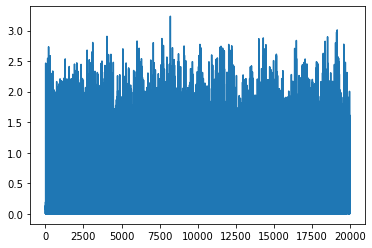

In [27]:
plt.plot([i for i in range(len(losses))], losses)

In [28]:
torch.save(n.state_dict(), "snapshots/neurosat_30.pt")

In [3]:
test_ds = SatProblemDataSet("data/pickle/test/sr10-40")
test_dl = torch.utils.data.DataLoader(test_ds)

In [4]:
test_cm = ConfusionMatrix()
with torch.no_grad():
    i = 0
    for prob, target in tqdm(test_dl):
        i += 1
        
        outputs = n(prob[0].float())
        test_cm.update_one(target[0], outputs > 0)
        if i % 100 == 0:
            test_cm.pretty_print()

  0%|          | 104/40000 [00:04<27:35, 24.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               40|                  5|
| Predicted is_unsat |               10|                 45|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.800000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.900000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.888889|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.842105|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.850000|
+--------------------+-----------------+-------------------+
        


  1%|          | 203/40000 [00:08<27:20, 24.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |               85|                  7|
| Predicted is_unsat |               15|                 93|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.850000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.923913|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.885417|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.890000|
+--------------------+-----------------+-------------------+
        


  1%|          | 302/40000 [00:12<27:13, 24.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              129|                  9|
| Predicted is_unsat |               21|                141|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.860000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.934783|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.895833|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.900000|
+--------------------+-----------------+-------------------+
        


  1%|          | 404/40000 [00:17<27:57, 23.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              173|                 12|
| Predicted is_unsat |               27|                188|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.865000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.935135|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.898701|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.902500|
+--------------------+-----------------+-------------------+
        


  1%|▏         | 503/40000 [00:21<27:17, 24.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              216|                 17|
| Predicted is_unsat |               34|                233|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.864000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.927039|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.894410|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.898000|
+--------------------+-----------------+-------------------+
        


  2%|▏         | 602/40000 [00:25<26:43, 24.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              262|                 19|
| Predicted is_unsat |               38|                281|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.873333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.932384|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.901893|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.905000|
+--------------------+-----------------+-------------------+
        


  2%|▏         | 704/40000 [00:29<28:13, 23.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              302|                 21|
| Predicted is_unsat |               48|                329|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.862857|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.934985|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.897474|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.901429|
+--------------------+-----------------+-------------------+
        


  2%|▏         | 803/40000 [00:34<25:59, 25.13it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              342|                 22|
| Predicted is_unsat |               58|                378|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.855000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.939560|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.895288|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.900000|
+--------------------+-----------------+-------------------+
        


  2%|▏         | 905/40000 [00:38<26:02, 25.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              383|                 25|
| Predicted is_unsat |               67|                425|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.851111|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944444|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.938725|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.892774|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.897778|
+--------------------+-----------------+-------------------+
        


  3%|▎         | 1004/40000 [00:42<26:07, 24.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              425|                 27|
| Predicted is_unsat |               75|                473|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.850000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.946000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.940265|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.892857|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.898000|
+--------------------+-----------------+-------------------+
        


  3%|▎         | 1103/40000 [00:46<26:57, 24.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              469|                 28|
| Predicted is_unsat |               81|                522|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.852727|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.949091|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.943662|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.895893|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.900909|
+--------------------+-----------------+-------------------+
        


  3%|▎         | 1205/40000 [00:50<24:53, 25.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              509|                 29|
| Predicted is_unsat |               91|                571|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.848333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.951667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946097|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.894552|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.900000|
+--------------------+-----------------+-------------------+
        


  3%|▎         | 1304/40000 [00:54<24:57, 25.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              554|                 32|
| Predicted is_unsat |               96|                618|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.852308|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950769|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.945392|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.896440|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.901538|
+--------------------+-----------------+-------------------+
        


  4%|▎         | 1403/40000 [00:57<25:34, 25.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              593|                 32|
| Predicted is_unsat |              107|                668|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.847143|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954286|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948800|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.895094|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.900714|
+--------------------+-----------------+-------------------+
        


  4%|▍         | 1502/40000 [01:01<26:33, 24.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              634|                 37|
| Predicted is_unsat |              116|                713|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.845333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.944858|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.892329|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.898000|
+--------------------+-----------------+-------------------+
        


  4%|▍         | 1604/40000 [01:06<24:51, 25.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              680|                 41|
| Predicted is_unsat |              120|                759|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.850000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.948750|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.943135|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.894149|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.899375|
+--------------------+-----------------+-------------------+
        


  4%|▍         | 1703/40000 [01:10<26:06, 24.44it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              720|                 42|
| Predicted is_unsat |              130|                808|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.847059|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950588|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.944882|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.893300|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.898824|
+--------------------+-----------------+-------------------+
        


  5%|▍         | 1805/40000 [01:14<25:50, 24.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              766|                 43|
| Predicted is_unsat |              134|                857|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.851111|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952222|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946848|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.896431|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.901667|
+--------------------+-----------------+-------------------+
        


  5%|▍         | 1904/40000 [01:18<26:28, 23.99it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              811|                 44|
| Predicted is_unsat |              139|                906|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.853684|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953684|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948538|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.898615|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.903684|
+--------------------+-----------------+-------------------+
        


  5%|▌         | 2003/40000 [01:22<26:25, 23.96it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              849|                 49|
| Predicted is_unsat |              151|                951|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.849000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.951000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.945434|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.894626|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.900000|
+--------------------+-----------------+-------------------+
        


  5%|▌         | 2102/40000 [01:26<26:04, 24.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              888|                 50|
| Predicted is_unsat |              162|               1000|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.845714|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952381|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946695|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.893360|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.899048|
+--------------------+-----------------+-------------------+
        


  6%|▌         | 2204/40000 [01:30<25:00, 25.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              930|                 51|
| Predicted is_unsat |              170|               1049|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.845455|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953636|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948012|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.893801|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.899545|
+--------------------+-----------------+-------------------+
        


  6%|▌         | 2303/40000 [01:34<25:17, 24.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |              971|                 52|
| Predicted is_unsat |              179|               1098|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.844348|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954783|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.949169|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.893695|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.899565|
+--------------------+-----------------+-------------------+
        


  6%|▌         | 2402/40000 [01:38<26:35, 23.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1010|                 56|
| Predicted is_unsat |              190|               1144|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.841667|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947467|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.891439|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.897500|
+--------------------+-----------------+-------------------+
        


  6%|▋         | 2504/40000 [01:43<26:46, 23.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1052|                 58|
| Predicted is_unsat |              198|               1192|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.841600|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953600|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947748|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.891525|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.897600|
+--------------------+-----------------+-------------------+
        


  7%|▋         | 2603/40000 [01:47<26:17, 23.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1097|                 59|
| Predicted is_unsat |              203|               1241|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.843846|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954615|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948962|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.893322|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.899231|
+--------------------+-----------------+-------------------+
        


  7%|▋         | 2702/40000 [01:51<25:36, 24.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1127|                 63|
| Predicted is_unsat |              223|               1287|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.834815|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947059|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.887402|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.894074|
+--------------------+-----------------+-------------------+
        


  7%|▋         | 2804/40000 [01:55<24:38, 25.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1169|                 67|
| Predicted is_unsat |              231|               1333|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.835000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.945793|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.886950|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.893571|
+--------------------+-----------------+-------------------+
        


  7%|▋         | 2903/40000 [01:59<26:20, 23.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1207|                 67|
| Predicted is_unsat |              243|               1383|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.832414|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953793|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947410|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.886197|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.893103|
+--------------------+-----------------+-------------------+
        


  8%|▊         | 3002/40000 [02:03<25:31, 24.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1253|                 68|
| Predicted is_unsat |              247|               1432|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.835333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948524|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.888337|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.895000|
+--------------------+-----------------+-------------------+
        


  8%|▊         | 3104/40000 [02:08<26:26, 23.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1289|                 69|
| Predicted is_unsat |              261|               1481|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.831613|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955484|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.949190|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.886520|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.893548|
+--------------------+-----------------+-------------------+
        


  8%|▊         | 3203/40000 [02:12<25:20, 24.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1327|                 71|
| Predicted is_unsat |              273|               1529|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.829375|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955625|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.949213|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.885257|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.892500|
+--------------------+-----------------+-------------------+
        


  8%|▊         | 3302/40000 [02:16<27:20, 22.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1368|                 74|
| Predicted is_unsat |              282|               1576|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.829091|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955152|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948682|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.884864|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.892121|
+--------------------+-----------------+-------------------+
        


  9%|▊         | 3404/40000 [02:20<25:35, 23.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1408|                 75|
| Predicted is_unsat |              292|               1625|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.828235|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955882|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.949427|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.884700|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.892059|
+--------------------+-----------------+-------------------+
        


  9%|▉         | 3503/40000 [02:24<24:49, 24.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1446|                 76|
| Predicted is_unsat |              304|               1674|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.826286|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956571|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.950066|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.883863|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.891429|
+--------------------+-----------------+-------------------+
        


  9%|▉         | 3602/40000 [02:28<23:53, 25.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1487|                 79|
| Predicted is_unsat |              313|               1721|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.826111|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956111|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.949553|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.883541|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.891111|
+--------------------+-----------------+-------------------+
        


  9%|▉         | 3704/40000 [02:33<25:29, 23.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1534|                 80|
| Predicted is_unsat |              316|               1770|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.829189|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.956757|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.950434|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.885681|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.892973|
+--------------------+-----------------+-------------------+
        


 10%|▉         | 3803/40000 [02:37<24:27, 24.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1577|                 85|
| Predicted is_unsat |              323|               1815|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.830000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955263|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948857|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.885458|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.892632|
+--------------------+-----------------+-------------------+
        


 10%|▉         | 3902/40000 [02:41<25:23, 23.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1615|                 88|
| Predicted is_unsat |              335|               1862|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.828205|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954872|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948326|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.884205|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.891538|
+--------------------+-----------------+-------------------+
        


 10%|█         | 4004/40000 [02:45<24:59, 24.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1656|                 92|
| Predicted is_unsat |              344|               1908|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.828000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.883671|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.891000|
+--------------------+-----------------+-------------------+
        


 10%|█         | 4103/40000 [02:49<24:39, 24.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1699|                 94|
| Predicted is_unsat |              351|               1956|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.828780|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954146|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947574|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.884205|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.891463|
+--------------------+-----------------+-------------------+
        


 11%|█         | 4202/40000 [02:54<25:00, 23.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1742|                 98|
| Predicted is_unsat |              358|               2002|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.829524|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946739|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.884264|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.891429|
+--------------------+-----------------+-------------------+
        


 11%|█         | 4304/40000 [02:58<24:44, 24.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1785|                100|
| Predicted is_unsat |              365|               2050|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.830233|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953488|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946950|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.884758|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.891860|
+--------------------+-----------------+-------------------+
        


 11%|█         | 4403/40000 [03:02<25:08, 23.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1826|                101|
| Predicted is_unsat |              374|               2099|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.830000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954091|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947587|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.884904|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.892045|
+--------------------+-----------------+-------------------+
        


 11%|█▏        | 4505/40000 [03:06<23:46, 24.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1868|                106|
| Predicted is_unsat |              382|               2144|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.830222|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952889|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946302|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.884470|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.891556|
+--------------------+-----------------+-------------------+
        


 12%|█▏        | 4604/40000 [03:11<25:19, 23.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1910|                109|
| Predicted is_unsat |              390|               2191|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.830435|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952609|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946013|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.884464|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.891522|
+--------------------+-----------------+-------------------+
        


 12%|█▏        | 4703/40000 [03:15<24:53, 23.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1948|                111|
| Predicted is_unsat |              402|               2239|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.828936|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952766|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946090|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.883647|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.890851|
+--------------------+-----------------+-------------------+
        


 12%|█▏        | 4802/40000 [03:19<24:56, 23.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             1988|                112|
| Predicted is_unsat |              412|               2288|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.828333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.883556|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.890833|
+--------------------+-----------------+-------------------+
        


 12%|█▏        | 4904/40000 [03:23<24:31, 23.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2026|                112|
| Predicted is_unsat |              424|               2338|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.826939|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954286|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947615|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.883173|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.890612|
+--------------------+-----------------+-------------------+
        


 13%|█▎        | 5003/40000 [03:28<26:37, 21.91it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2066|                113|
| Predicted is_unsat |              434|               2387|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.826400|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954800|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948141|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.883095|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.890600|
+--------------------+-----------------+-------------------+
        


 13%|█▎        | 5102/40000 [03:32<24:27, 23.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2106|                114|
| Predicted is_unsat |              444|               2436|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.825882|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955294|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948649|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.883019|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.890588|
+--------------------+-----------------+-------------------+
        


 13%|█▎        | 5204/40000 [03:37<24:54, 23.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2149|                116|
| Predicted is_unsat |              451|               2484|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.826538|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955385|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948786|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.883453|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.890962|
+--------------------+-----------------+-------------------+
        


 13%|█▎        | 5303/40000 [03:41<24:52, 23.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2188|                120|
| Predicted is_unsat |              462|               2530|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.825660|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954717|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948007|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.882614|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.890189|
+--------------------+-----------------+-------------------+
        


 14%|█▎        | 5402/40000 [03:45<24:46, 23.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2227|                121|
| Predicted is_unsat |              473|               2579|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.824815|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955185|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948467|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.882330|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.890000|
+--------------------+-----------------+-------------------+
        


 14%|█▍        | 5504/40000 [03:50<24:43, 23.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2266|                123|
| Predicted is_unsat |              484|               2627|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.824000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955273|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948514|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.881884|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.889636|
+--------------------+-----------------+-------------------+
        


 14%|█▍        | 5603/40000 [03:54<25:10, 22.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2303|                130|
| Predicted is_unsat |              497|               2670|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.822500|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953571|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946568|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.880183|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.888036|
+--------------------+-----------------+-------------------+
        


 14%|█▍        | 5702/40000 [03:58<24:59, 22.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2338|                130|
| Predicted is_unsat |              512|               2720|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.820351|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954386|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947326|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.879278|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.887368|
+--------------------+-----------------+-------------------+
        


 15%|█▍        | 5804/40000 [04:03<24:02, 23.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2380|                131|
| Predicted is_unsat |              520|               2769|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.820690|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954828|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947830|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.879690|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.887759|
+--------------------+-----------------+-------------------+
        


 15%|█▍        | 5903/40000 [04:07<23:15, 24.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2424|                133|
| Predicted is_unsat |              526|               2817|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.821695|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954915|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947986|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.880334|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.888305|
+--------------------+-----------------+-------------------+
        


 15%|█▌        | 6002/40000 [04:11<24:11, 23.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2467|                136|
| Predicted is_unsat |              533|               2864|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.822333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947753|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.880600|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.888500|
+--------------------+-----------------+-------------------+
        


 15%|█▌        | 6104/40000 [04:16<23:04, 24.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2505|                136|
| Predicted is_unsat |              545|               2914|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.821311|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955410|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948504|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.880337|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.888361|
+--------------------+-----------------+-------------------+
        


 16%|█▌        | 6203/40000 [04:20<23:48, 23.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2543|                138|
| Predicted is_unsat |              557|               2962|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.820323|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955484|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.948527|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.879779|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.887903|
+--------------------+-----------------+-------------------+
        


 16%|█▌        | 6302/40000 [04:24<23:54, 23.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2578|                142|
| Predicted is_unsat |              572|               3008|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.818413|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954921|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947794|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.878365|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.886667|
+--------------------+-----------------+-------------------+
        


 16%|█▌        | 6404/40000 [04:28<24:29, 22.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2616|                144|
| Predicted is_unsat |              584|               3056|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.817500|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947826|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.877852|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.886250|
+--------------------+-----------------+-------------------+
        


 16%|█▋        | 6503/40000 [04:33<23:24, 23.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2651|                146|
| Predicted is_unsat |              599|               3104|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.815692|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.955077|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947801|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.876798|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.885385|
+--------------------+-----------------+-------------------+
        


 17%|█▋        | 6602/40000 [04:37<24:24, 22.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2689|                151|
| Predicted is_unsat |              611|               3149|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.814848|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954242|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946831|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.875896|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.884545|
+--------------------+-----------------+-------------------+
        


 17%|█▋        | 6704/40000 [04:41<24:45, 22.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2726|                152|
| Predicted is_unsat |              624|               3198|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.813731|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954627|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947186|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.875401|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.884179|
+--------------------+-----------------+-------------------+
        


 17%|█▋        | 6803/40000 [04:46<24:19, 22.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2767|                155|
| Predicted is_unsat |              633|               3245|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.813824|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954412|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946954|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.875356|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.884118|
+--------------------+-----------------+-------------------+
        


 17%|█▋        | 6902/40000 [04:50<24:08, 22.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2801|                157|
| Predicted is_unsat |              649|               3293|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.811884|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954493|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946924|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.874220|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.883188|
+--------------------+-----------------+-------------------+
        


 18%|█▊        | 7004/40000 [04:54<23:16, 23.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2835|                158|
| Predicted is_unsat |              665|               3342|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.810000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954857|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.947210|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.873248|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.882429|
+--------------------+-----------------+-------------------+
        


 18%|█▊        | 7103/40000 [04:59<23:47, 23.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2870|                162|
| Predicted is_unsat |              680|               3388|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.808451|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954366|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946570|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.872075|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.881408|
+--------------------+-----------------+-------------------+
        


 18%|█▊        | 7202/40000 [05:03<23:30, 23.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2908|                165|
| Predicted is_unsat |              692|               3435|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.807778|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954167|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946307|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.871572|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.880972|
+--------------------+-----------------+-------------------+
        


 18%|█▊        | 7304/40000 [05:07<23:45, 22.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2945|                166|
| Predicted is_unsat |              705|               3484|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.806849|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954521|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946641|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.871173|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.880685|
+--------------------+-----------------+-------------------+
        


 19%|█▊        | 7403/40000 [05:12<23:20, 23.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             2981|                168|
| Predicted is_unsat |              719|               3532|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.805676|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954595|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946650|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.870492|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.880135|
+--------------------+-----------------+-------------------+
        


 19%|█▉        | 7502/40000 [05:16<24:52, 21.78it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3017|                172|
| Predicted is_unsat |              733|               3578|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.804533|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954133|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946065|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.869578|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.879333|
+--------------------+-----------------+-------------------+
        


 19%|█▉        | 7604/40000 [05:21<24:05, 22.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3058|                176|
| Predicted is_unsat |              742|               3624|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.804737|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953684|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.945578|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.869491|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.879211|
+--------------------+-----------------+-------------------+
        


 19%|█▉        | 7703/40000 [05:25<23:26, 22.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3096|                176|
| Predicted is_unsat |              754|               3674|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.804156|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954286|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946210|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.869419|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.879221|
+--------------------+-----------------+-------------------+
        


 20%|█▉        | 7802/40000 [05:30<24:51, 21.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3133|                179|
| Predicted is_unsat |              767|               3721|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.803333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954103|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.945954|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.868830|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.878718|
+--------------------+-----------------+-------------------+
        


 20%|█▉        | 7904/40000 [05:34<22:52, 23.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3172|                179|
| Predicted is_unsat |              778|               3771|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.803038|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954684|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946583|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.868922|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.878861|
+--------------------+-----------------+-------------------+
        


 20%|██        | 8003/40000 [05:38<23:17, 22.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3211|                183|
| Predicted is_unsat |              789|               3817|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.802750|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954250|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.946081|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.868542|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.878500|
+--------------------+-----------------+-------------------+
        


 20%|██        | 8102/40000 [05:43<22:38, 23.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3248|                186|
| Predicted is_unsat |              802|               3864|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.801975|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.954074|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.945836|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.867985|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.878025|
+--------------------+-----------------+-------------------+
        


 21%|██        | 8204/40000 [05:47<22:48, 23.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3283|                189|
| Predicted is_unsat |              817|               3911|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.800732|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953902|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.945565|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.867142|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.877317|
+--------------------+-----------------+-------------------+
        


 21%|██        | 8303/40000 [05:51<22:55, 23.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3317|                194|
| Predicted is_unsat |              833|               3956|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.799277|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953253|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.944745|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.865944|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.876265|
+--------------------+-----------------+-------------------+
        


 21%|██        | 8402/40000 [05:56<22:42, 23.18it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3349|                198|
| Predicted is_unsat |              851|               4002|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.797381|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952857|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.944178|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.864593|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.875119|
+--------------------+-----------------+-------------------+
        


 21%|██▏       | 8504/40000 [06:00<23:00, 22.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3387|                201|
| Predicted is_unsat |              863|               4049|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.796941|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952706|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.943980|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.864251|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.874824|
+--------------------+-----------------+-------------------+
        


 22%|██▏       | 8603/40000 [06:05<23:54, 21.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3426|                203|
| Predicted is_unsat |              874|               4097|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.796744|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952791|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.944062|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.864170|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.874767|
+--------------------+-----------------+-------------------+
        


 22%|██▏       | 8702/40000 [06:09<25:10, 20.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3465|                206|
| Predicted is_unsat |              885|               4144|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.796552|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952644|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.943885|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.863982|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.874598|
+--------------------+-----------------+-------------------+
        


 22%|██▏       | 8804/40000 [06:14<23:13, 22.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3498|                206|
| Predicted is_unsat |              902|               4194|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.795000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953182|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.944384|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.863277|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.874091|
+--------------------+-----------------+-------------------+
        


 22%|██▏       | 8903/40000 [06:18<22:28, 23.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3528|                209|
| Predicted is_unsat |              922|               4241|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.792809|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.953034|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.944073|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.861854|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.872921|
+--------------------+-----------------+-------------------+
        


 23%|██▎       | 9002/40000 [06:22<23:09, 22.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3564|                214|
| Predicted is_unsat |              936|               4286|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.792000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952444|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.943356|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.861078|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.872222|
+--------------------+-----------------+-------------------+
        


 23%|██▎       | 9104/40000 [06:27<23:18, 22.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3601|                216|
| Predicted is_unsat |              949|               4334|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.791429|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952527|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.943411|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.860763|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.871978|
+--------------------+-----------------+-------------------+
        


 23%|██▎       | 9203/40000 [06:31<22:38, 22.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3636|                219|
| Predicted is_unsat |              964|               4381|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.790435|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.952391|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.943191|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.860083|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.871413|
+--------------------+-----------------+-------------------+
        


 23%|██▎       | 9302/40000 [06:36<24:03, 21.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3671|                224|
| Predicted is_unsat |              979|               4426|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.789462|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.951828|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.942490|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.859216|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.870645|
+--------------------+-----------------+-------------------+
        


 24%|██▎       | 9404/40000 [06:41<21:43, 23.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3710|                228|
| Predicted is_unsat |              990|               4472|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.789362|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.951489|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.942103|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.858995|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.870426|
+--------------------+-----------------+-------------------+
        


 24%|██▍       | 9503/40000 [06:45<23:13, 21.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3743|                233|
| Predicted is_unsat |             1007|               4517|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.788000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950947|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.941398|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.857896|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.869474|
+--------------------+-----------------+-------------------+
        


 24%|██▍       | 9602/40000 [06:49<23:20, 21.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3783|                237|
| Predicted is_unsat |             1017|               4563|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.788125|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950625|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.941045|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.857823|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.869375|
+--------------------+-----------------+-------------------+
        


 24%|██▍       | 9704/40000 [06:54<23:05, 21.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3822|                239|
| Predicted is_unsat |             1028|               4611|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.788041|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950722|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.941148|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.857816|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.869381|
+--------------------+-----------------+-------------------+
        


 25%|██▍       | 9803/40000 [06:59<22:27, 22.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3858|                245|
| Predicted is_unsat |             1042|               4655|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.787347|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.950000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.940288|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.857048|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.868673|
+--------------------+-----------------+-------------------+
        


 25%|██▍       | 9902/40000 [07:03<22:52, 21.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3890|                250|
| Predicted is_unsat |             1060|               4700|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.785859|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.949495|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.939614|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.855886|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.867677|
+--------------------+-----------------+-------------------+
        


 25%|██▌       | 10004/40000 [07:08<23:06, 21.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3922|                252|
| Predicted is_unsat |             1078|               4748|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.784400|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.949600|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.939626|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.855025|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.867000|
+--------------------+-----------------+-------------------+
        


 25%|██▌       | 10103/40000 [07:12<25:24, 19.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3960|                254|
| Predicted is_unsat |             1090|               4796|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.784158|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.949703|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.939725|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.854922|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.866931|
+--------------------+-----------------+-------------------+
        


 26%|██▌       | 10202/40000 [07:17<23:31, 21.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             3988|                256|
| Predicted is_unsat |             1112|               4844|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.781961|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.949804|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.939680|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.853596|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.865882|
+--------------------+-----------------+-------------------+
        


 26%|██▌       | 10304/40000 [07:21<22:41, 21.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4025|                262|
| Predicted is_unsat |             1125|               4888|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.781553|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.949126|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.938885|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.853025|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.865340|
+--------------------+-----------------+-------------------+
        


 26%|██▌       | 10403/40000 [07:26<21:36, 22.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4060|                266|
| Predicted is_unsat |             1140|               4934|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.780769|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.948846|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.938511|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.852404|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.864808|
+--------------------+-----------------+-------------------+
        


 26%|██▋       | 10502/40000 [07:30<22:22, 21.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4094|                270|
| Predicted is_unsat |             1156|               4980|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.779810|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.948571|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.938130|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.851675|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.864190|
+--------------------+-----------------+-------------------+
        


 27%|██▋       | 10604/40000 [07:35<22:02, 22.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4124|                272|
| Predicted is_unsat |             1176|               5028|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.778113|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.948679|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.938126|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.850660|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.863396|
+--------------------+-----------------+-------------------+
        


 27%|██▋       | 10703/40000 [07:39<21:52, 22.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4159|                276|
| Predicted is_unsat |             1191|               5074|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.777383|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.948411|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.937768|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.850077|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.862897|
+--------------------+-----------------+-------------------+
        


 27%|██▋       | 10802/40000 [07:44<21:18, 22.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4195|                279|
| Predicted is_unsat |             1205|               5121|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.776852|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.948333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.937640|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.849706|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.862593|
+--------------------+-----------------+-------------------+
        


 27%|██▋       | 10904/40000 [07:48<20:59, 23.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4231|                280|
| Predicted is_unsat |             1219|               5170|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.776330|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.948624|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.937930|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.849513|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.862477|
+--------------------+-----------------+-------------------+
        


 28%|██▊       | 11003/40000 [07:53<22:04, 21.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4259|                283|
| Predicted is_unsat |             1241|               5217|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.774364|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.948545|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.937693|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.848237|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.861455|
+--------------------+-----------------+-------------------+
        


 28%|██▊       | 11102/40000 [07:58<22:59, 20.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4292|                288|
| Predicted is_unsat |             1258|               5262|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.773333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.948108|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.937118|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.847384|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.860721|
+--------------------+-----------------+-------------------+
        


 28%|██▊       | 11204/40000 [08:02<22:33, 21.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4325|                293|
| Predicted is_unsat |             1275|               5307|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.772321|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.947679|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.936553|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.846545|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.860000|
+--------------------+-----------------+-------------------+
        


 28%|██▊       | 11303/40000 [08:07<22:12, 21.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4362|                299|
| Predicted is_unsat |             1288|               5351|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.772035|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.947080|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.935851|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.846087|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.859558|
+--------------------+-----------------+-------------------+
        


 29%|██▊       | 11402/40000 [08:11<22:00, 21.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4403|                304|
| Predicted is_unsat |             1297|               5396|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.772456|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.946667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.935415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.846161|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.859561|
+--------------------+-----------------+-------------------+
        


 29%|██▉       | 11504/40000 [08:16<21:47, 21.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4442|                313|
| Predicted is_unsat |             1308|               5437|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.772522|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945565|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.934175|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.845693|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.859043|
+--------------------+-----------------+-------------------+
        


 29%|██▉       | 11603/40000 [08:21<21:51, 21.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4473|                314|
| Predicted is_unsat |             1327|               5486|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.771207|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945862|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.934406|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.844999|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.858534|
+--------------------+-----------------+-------------------+
        


 29%|██▉       | 11702/40000 [08:25<21:41, 21.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4504|                316|
| Predicted is_unsat |             1346|               5534|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.769915|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945983|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.934440|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.844236|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.857949|
+--------------------+-----------------+-------------------+
        


 30%|██▉       | 11804/40000 [08:30<22:09, 21.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4533|                319|
| Predicted is_unsat |             1367|               5581|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.768305|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945932|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.934254|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.843192|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.857119|
+--------------------+-----------------+-------------------+
        


 30%|██▉       | 11903/40000 [08:34<21:52, 21.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4569|                321|
| Predicted is_unsat |             1381|               5629|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.767899|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.946050|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.934356|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.842989|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.856975|
+--------------------+-----------------+-------------------+
        


 30%|███       | 12002/40000 [08:39<21:36, 21.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4603|                327|
| Predicted is_unsat |             1397|               5673|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.767167|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.945500|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.933671|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.842269|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.856333|
+--------------------+-----------------+-------------------+
        


 30%|███       | 12104/40000 [08:44<21:00, 22.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4643|                335|
| Predicted is_unsat |             1407|               5715|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.767438|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944628|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.932704|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.842038|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.856033|
+--------------------+-----------------+-------------------+
        


 31%|███       | 12203/40000 [08:48<21:23, 21.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4673|                338|
| Predicted is_unsat |             1427|               5762|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.766066|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944590|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.932548|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.841148|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.855328|
+--------------------+-----------------+-------------------+
        


 31%|███       | 12302/40000 [08:53<20:49, 22.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4709|                343|
| Predicted is_unsat |             1441|               5807|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.765691|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944228|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.932106|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.840743|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.854959|
+--------------------+-----------------+-------------------+
        


 31%|███       | 12404/40000 [08:58<21:15, 21.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4745|                345|
| Predicted is_unsat |             1455|               5855|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.765323|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944355|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.932220|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.840567|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.854839|
+--------------------+-----------------+-------------------+
        


 31%|███▏      | 12503/40000 [09:02<21:03, 21.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4777|                350|
| Predicted is_unsat |             1473|               5900|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.764320|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.944000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.931734|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.839764|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.854160|
+--------------------+-----------------+-------------------+
        


 32%|███▏      | 12604/40000 [09:07<21:58, 20.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4812|                357|
| Predicted is_unsat |             1488|               5943|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.763810|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.930934|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.839132|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.853571|
+--------------------+-----------------+-------------------+
        


 32%|███▏      | 12703/40000 [09:12<22:05, 20.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4840|                361|
| Predicted is_unsat |             1510|               5989|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.762205|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943150|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.930590|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.838023|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.852677|
+--------------------+-----------------+-------------------+
        


 32%|███▏      | 12802/40000 [09:16<20:21, 22.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4875|                362|
| Predicted is_unsat |             1525|               6038|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.761719|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943438|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.930876|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.837845|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.852578|
+--------------------+-----------------+-------------------+
        


 32%|███▏      | 12904/40000 [09:21<20:58, 21.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4907|                366|
| Predicted is_unsat |             1543|               6084|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.760775|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943256|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.930590|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.837158|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.852016|
+--------------------+-----------------+-------------------+
        


 33%|███▎      | 13003/40000 [09:26<20:07, 22.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4940|                369|
| Predicted is_unsat |             1560|               6131|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.760000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943231|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.930495|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.836650|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.851615|
+--------------------+-----------------+-------------------+
        


 33%|███▎      | 13102/40000 [09:30<20:32, 21.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             4969|                372|
| Predicted is_unsat |             1581|               6178|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.758626|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943206|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.930350|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.835758|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.850916|
+--------------------+-----------------+-------------------+
        


 33%|███▎      | 13201/40000 [09:35<20:06, 22.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5000|                376|
| Predicted is_unsat |             1600|               6224|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.757576|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943030|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.930060|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.835003|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.850303|
+--------------------+-----------------+-------------------+
        


 33%|███▎      | 13303/40000 [09:39<19:38, 22.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5034|                381|
| Predicted is_unsat |             1616|               6269|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.756992|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942707|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.929640|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.834480|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.849850|
+--------------------+-----------------+-------------------+
        


 34%|███▎      | 13402/40000 [09:44<19:55, 22.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5071|                381|
| Predicted is_unsat |             1629|               6319|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.756866|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.943134|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.930117|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.834595|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.850000|
+--------------------+-----------------+-------------------+
        


 34%|███▍      | 13504/40000 [09:48<19:31, 22.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5103|                387|
| Predicted is_unsat |             1647|               6363|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.756000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.929508|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.833824|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.849333|
+--------------------+-----------------+-------------------+
        


 34%|███▍      | 13603/40000 [09:53<20:28, 21.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5139|                392|
| Predicted is_unsat |             1661|               6408|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.755735|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.942353|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.929127|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.833509|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.849044|
+--------------------+-----------------+-------------------+
        


 34%|███▍      | 13702/40000 [09:57<20:09, 21.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5175|                400|
| Predicted is_unsat |             1675|               6450|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.755474|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.941606|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.928251|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.832998|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.848540|
+--------------------+-----------------+-------------------+
        


 35%|███▍      | 13804/40000 [10:02<20:58, 20.82it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5208|                404|
| Predicted is_unsat |             1692|               6496|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.754783|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.941449|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.928011|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.832481|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.848116|
+--------------------+-----------------+-------------------+
        


 35%|███▍      | 13903/40000 [10:06<20:00, 21.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5244|                407|
| Predicted is_unsat |             1706|               6543|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.754532|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.941439|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.927977|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.832315|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.847986|
+--------------------+-----------------+-------------------+
        


 35%|███▌      | 14002/40000 [10:11<20:10, 21.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5272|                412|
| Predicted is_unsat |             1728|               6588|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.753143|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.941143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.927516|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.831284|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.847143|
+--------------------+-----------------+-------------------+
        


 35%|███▌      | 14104/40000 [10:15<19:41, 21.91it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5305|                421|
| Predicted is_unsat |             1745|               6629|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.752482|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940284|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.926476|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.830463|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.846383|
+--------------------+-----------------+-------------------+
        


 36%|███▌      | 14203/40000 [10:20<19:35, 21.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5345|                424|
| Predicted is_unsat |             1755|               6676|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.752817|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940282|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.926504|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.830678|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.846549|
+--------------------+-----------------+-------------------+
        


 36%|███▌      | 14302/40000 [10:24<19:14, 22.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5377|                425|
| Predicted is_unsat |             1773|               6725|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.752028|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940559|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.926749|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.830296|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.846294|
+--------------------+-----------------+-------------------+
        


 36%|███▌      | 14404/40000 [10:29<19:30, 21.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5403|                431|
| Predicted is_unsat |             1797|               6769|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.750417|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.940139|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.926123|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.829062|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.845278|
+--------------------+-----------------+-------------------+
        


 36%|███▋      | 14503/40000 [10:34<20:00, 21.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5430|                436|
| Predicted is_unsat |             1820|               6814|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.748966|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.939862|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.925673|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.827996|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.844414|
+--------------------+-----------------+-------------------+
        


 37%|███▋      | 14602/40000 [10:38<19:51, 21.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5462|                444|
| Predicted is_unsat |             1838|               6856|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.748219|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.939178|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.924822|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.827200|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.843699|
+--------------------+-----------------+-------------------+
        


 37%|███▋      | 14704/40000 [10:43<19:57, 21.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5492|                452|
| Predicted is_unsat |             1858|               6898|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.747211|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.938503|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.923957|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.826237|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.842857|
+--------------------+-----------------+-------------------+
        


 37%|███▋      | 14803/40000 [10:48<18:34, 22.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5527|                462|
| Predicted is_unsat |             1873|               6938|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.746892|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.937568|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.922859|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.825603|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.842230|
+--------------------+-----------------+-------------------+
        


 37%|███▋      | 14902/40000 [10:52<18:53, 22.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5561|                468|
| Predicted is_unsat |             1889|               6982|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.746443|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.937181|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.922375|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.825135|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.841812|
+--------------------+-----------------+-------------------+
        


 38%|███▊      | 15004/40000 [10:57<20:01, 20.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5589|                473|
| Predicted is_unsat |             1911|               7027|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.745200|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936933|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.921973|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.824215|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.841067|
+--------------------+-----------------+-------------------+
        


 38%|███▊      | 15104/40000 [11:02<20:40, 20.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5619|                476|
| Predicted is_unsat |             1931|               7074|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.744238|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936954|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.921903|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.823598|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.840596|
+--------------------+-----------------+-------------------+
        


 38%|███▊      | 15203/40000 [11:07<20:15, 20.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5652|                481|
| Predicted is_unsat |             1948|               7119|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743684|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936711|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.921572|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.823127|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.840197|
+--------------------+-----------------+-------------------+
        


 38%|███▊      | 15303/40000 [11:12<20:15, 20.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5687|                488|
| Predicted is_unsat |             1963|               7162|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743399|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.936209|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.920972|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.822712|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.839804|
+--------------------+-----------------+-------------------+
        


 39%|███▊      | 15402/40000 [11:16<18:13, 22.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5722|                494|
| Predicted is_unsat |             1978|               7206|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743117|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935844|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.920528|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.822363|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.839481|
+--------------------+-----------------+-------------------+
        


 39%|███▉      | 15504/40000 [11:21<18:53, 21.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5750|                501|
| Predicted is_unsat |             2000|               7249|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741935|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935355|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.919853|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.821370|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.838645|
+--------------------+-----------------+-------------------+
        


 39%|███▉      | 15603/40000 [11:26<19:08, 21.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5784|                504|
| Predicted is_unsat |             2016|               7296|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741538|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935385|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.919847|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.821124|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.838462|
+--------------------+-----------------+-------------------+
        


 39%|███▉      | 15704/40000 [11:31<18:52, 21.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5815|                510|
| Predicted is_unsat |             2035|               7340|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.740764|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935032|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.919368|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820459|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837898|
+--------------------+-----------------+-------------------+
        


 40%|███▉      | 15803/40000 [11:35<19:38, 20.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5846|                511|
| Predicted is_unsat |             2054|               7389|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.740000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935316|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.919616|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820088|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837658|
+--------------------+-----------------+-------------------+
        


 40%|███▉      | 15904/40000 [11:40<18:46, 21.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5873|                516|
| Predicted is_unsat |             2077|               7434|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.738742|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935094|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.919236|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819165|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836918|
+--------------------+-----------------+-------------------+
        


 40%|████      | 16003/40000 [11:45<18:44, 21.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5901|                520|
| Predicted is_unsat |             2099|               7480|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737625|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.935000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.919016|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.818390|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836313|
+--------------------+-----------------+-------------------+
        


 40%|████      | 16104/40000 [11:50<19:06, 20.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5935|                526|
| Predicted is_unsat |             2115|               7524|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737267|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934658|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.818000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835963|
+--------------------+-----------------+-------------------+
        


 41%|████      | 16203/40000 [11:55<19:20, 20.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5969|                535|
| Predicted is_unsat |             2131|               7565|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.736914|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933951|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917743|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817447|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835432|
+--------------------+-----------------+-------------------+
        


 41%|████      | 16304/40000 [12:00<19:42, 20.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             5998|                543|
| Predicted is_unsat |             2152|               7607|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.735951|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933374|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916985|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816554|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834663|
+--------------------+-----------------+-------------------+
        


 41%|████      | 16402/40000 [12:05<20:43, 18.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6024|                546|
| Predicted is_unsat |             2176|               7654|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.734634|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933415|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916895|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.815708|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834024|
+--------------------+-----------------+-------------------+
        


 41%|████▏     | 16504/40000 [12:09<19:06, 20.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6060|                549|
| Predicted is_unsat |             2190|               7701|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.734545|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933455|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916931|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.815667|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834000|
+--------------------+-----------------+-------------------+
        


 42%|████▏     | 16603/40000 [12:14<19:33, 19.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6087|                554|
| Predicted is_unsat |             2213|               7746|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.733373|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933253|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916579|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.814805|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.833313|
+--------------------+-----------------+-------------------+
        


 42%|████▏     | 16701/40000 [12:19<18:54, 20.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6120|                558|
| Predicted is_unsat |             2230|               7792|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.732934|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933174|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916442|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.814480|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.833054|
+--------------------+-----------------+-------------------+
        


 42%|████▏     | 16803/40000 [12:25<19:43, 19.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6151|                565|
| Predicted is_unsat |             2249|               7835|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.732262|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932738|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915873|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.813840|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.832500|
+--------------------+-----------------+-------------------+
        


 42%|████▏     | 16901/40000 [12:30<18:54, 20.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6184|                571|
| Predicted is_unsat |             2266|               7879|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.731834|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932426|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915470|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.813417|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.832130|
+--------------------+-----------------+-------------------+
        


 43%|████▎     | 17002/40000 [12:35<18:26, 20.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6217|                577|
| Predicted is_unsat |             2283|               7923|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.731412|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932118|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915072|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.812999|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.831765|
+--------------------+-----------------+-------------------+
        


 43%|████▎     | 17104/40000 [12:40<18:26, 20.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6250|                585|
| Predicted is_unsat |             2300|               7965|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.730994|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931579|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914411|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.812480|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.831287|
+--------------------+-----------------+-------------------+
        


 43%|████▎     | 17203/40000 [12:45<18:34, 20.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6281|                591|
| Predicted is_unsat |             2319|               8009|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.730349|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931279|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913999|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.811918|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.830814|
+--------------------+-----------------+-------------------+
        


 43%|████▎     | 17302/40000 [12:49<18:49, 20.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6310|                597|
| Predicted is_unsat |             2340|               8053|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.729480|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930983|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913566|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.811210|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.830231|
+--------------------+-----------------+-------------------+
        


 44%|████▎     | 17402/40000 [12:54<18:47, 20.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6340|                600|
| Predicted is_unsat |             2360|               8100|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.728736|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931034|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913545|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.810742|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.829885|
+--------------------+-----------------+-------------------+
        


 44%|████▍     | 17502/40000 [13:00<19:06, 19.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6376|                602|
| Predicted is_unsat |             2374|               8148|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.728686|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931200|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913729|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.810783|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.829943|
+--------------------+-----------------+-------------------+
        


 44%|████▍     | 17603/40000 [13:05<18:39, 20.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6403|                609|
| Predicted is_unsat |             2397|               8191|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.727614|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930795|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913149|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.809891|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.829205|
+--------------------+-----------------+-------------------+
        


 44%|████▍     | 17702/40000 [13:10<19:11, 19.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6430|                617|
| Predicted is_unsat |             2420|               8233|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.726554|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930282|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.912445|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.808958|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.828418|
+--------------------+-----------------+-------------------+
        


 45%|████▍     | 17802/40000 [13:15<18:29, 20.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6461|                623|
| Predicted is_unsat |             2439|               8277|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.725955|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.912055|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.808433|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.827978|
+--------------------+-----------------+-------------------+
        


 45%|████▍     | 17902/40000 [13:20<19:06, 19.27it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6487|                627|
| Predicted is_unsat |             2463|               8323|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.724804|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929944|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911864|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.807644|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.827374|
+--------------------+-----------------+-------------------+
        


 45%|████▌     | 18002/40000 [13:26<19:09, 19.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6518|                632|
| Predicted is_unsat |             2482|               8368|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.724222|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929778|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911608|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.807183|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.827000|
+--------------------+-----------------+-------------------+
        


 45%|████▌     | 18104/40000 [13:31<18:11, 20.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6551|                636|
| Predicted is_unsat |             2499|               8414|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.723867|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929724|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911507|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.806922|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.826796|
+--------------------+-----------------+-------------------+
        


 46%|████▌     | 18203/40000 [13:36<17:50, 20.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6587|                646|
| Predicted is_unsat |             2513|               8454|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.723846|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929011|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.910687|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.806588|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.826429|
+--------------------+-----------------+-------------------+
        


 46%|████▌     | 18303/40000 [13:41<19:28, 18.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6623|                654|
| Predicted is_unsat |             2527|               8496|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.723825|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928525|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.910128|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.806355|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.826175|
+--------------------+-----------------+-------------------+
        


 46%|████▌     | 18403/40000 [13:46<18:29, 19.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6651|                661|
| Predicted is_unsat |             2549|               8539|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.722935|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928152|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909601|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.805596|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.825543|
+--------------------+-----------------+-------------------+
        


 46%|████▋     | 18503/40000 [13:51<18:42, 19.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6676|                667|
| Predicted is_unsat |             2574|               8583|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.721730|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927892|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909165|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.804677|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.824811|
+--------------------+-----------------+-------------------+
        


 47%|████▋     | 18603/40000 [13:56<18:49, 18.94it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6707|                673|
| Predicted is_unsat |             2593|               8627|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.721183|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927634|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.908808|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.804197|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.824409|
+--------------------+-----------------+-------------------+
        


 47%|████▋     | 18703/40000 [14:02<18:56, 18.74it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6739|                680|
| Predicted is_unsat |             2611|               8670|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.720749|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927273|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.908343|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.803745|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.824011|
+--------------------+-----------------+-------------------+
        


 47%|████▋     | 18803/40000 [14:07<19:05, 18.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6768|                687|
| Predicted is_unsat |             2632|               8713|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.720000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926915|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907847|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.803085|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.823457|
+--------------------+-----------------+-------------------+
        


 47%|████▋     | 18902/40000 [14:12<18:59, 18.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6800|                694|
| Predicted is_unsat |             2650|               8756|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.719577|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926561|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907393|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.802644|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.823069|
+--------------------+-----------------+-------------------+
        


 48%|████▊     | 19003/40000 [14:18<19:31, 17.92it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6833|                702|
| Predicted is_unsat |             2667|               8798|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.719263|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926105|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.906835|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.802231|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822684|
+--------------------+-----------------+-------------------+
        


 48%|████▊     | 19103/40000 [14:23<18:47, 18.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6862|                710|
| Predicted is_unsat |             2688|               8840|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718534|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925654|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.906233|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.801542|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822094|
+--------------------+-----------------+-------------------+
        


 48%|████▊     | 19203/40000 [14:28<18:38, 18.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6898|                717|
| Predicted is_unsat |             2702|               8883|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718542|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925312|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.905844|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.801394|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.821927|
+--------------------+-----------------+-------------------+
        


 48%|████▊     | 19302/40000 [14:33<18:35, 18.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6930|                729|
| Predicted is_unsat |             2720|               8921|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718135|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924456|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.904818|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.800739|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.821295|
+--------------------+-----------------+-------------------+
        


 49%|████▊     | 19403/40000 [14:39<18:25, 18.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6963|                737|
| Predicted is_unsat |             2737|               8963|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.717835|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924021|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.904286|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.800345|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.820928|
+--------------------+-----------------+-------------------+
        


 49%|████▉     | 19503/40000 [14:44<17:49, 19.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             6997|                748|
| Predicted is_unsat |             2753|               9002|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.717641|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923282|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.903422|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.799886|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.820462|
+--------------------+-----------------+-------------------+
        


 49%|████▉     | 19603/40000 [14:49<18:04, 18.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7031|                755|
| Predicted is_unsat |             2769|               9045|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.717449|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922959|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.903031|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.799613|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.820204|
+--------------------+-----------------+-------------------+
        


 49%|████▉     | 19702/40000 [14:55<18:05, 18.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7055|                764|
| Predicted is_unsat |             2795|               9086|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.716244|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922437|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.902289|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.798574|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.819340|
+--------------------+-----------------+-------------------+
        


 50%|████▉     | 19803/40000 [15:00<18:11, 18.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7081|                773|
| Predicted is_unsat |             2819|               9127|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.715253|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921919|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.901579|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.797679|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.818586|
+--------------------+-----------------+-------------------+
        


 50%|████▉     | 19901/40000 [15:06<18:32, 18.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7114|                779|
| Predicted is_unsat |             2836|               9171|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.714975|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921709|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.901305|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.797400|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.818342|
+--------------------+-----------------+-------------------+
        


 50%|█████     | 20003/40000 [15:11<16:44, 19.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7143|                788|
| Predicted is_unsat |             2857|               9212|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.714300|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921200|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.900643|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.796721|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.817750|
+--------------------+-----------------+-------------------+
        


 50%|█████     | 20102/40000 [15:15<13:13, 25.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7185|                795|
| Predicted is_unsat |             2865|               9255|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.714925|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.920896|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.900376|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.797005|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.817910|
+--------------------+-----------------+-------------------+
        


 51%|█████     | 20204/40000 [15:19<12:54, 25.57it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7229|                797|
| Predicted is_unsat |             2871|               9303|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.715743|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921089|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.900698|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.797639|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.818416|
+--------------------+-----------------+-------------------+
        


 51%|█████     | 20303/40000 [15:23<13:17, 24.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7273|                798|
| Predicted is_unsat |             2877|               9352|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.716552|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921379|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.901127|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.798310|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.818966|
+--------------------+-----------------+-------------------+
        


 51%|█████     | 20402/40000 [15:27<13:11, 24.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7316|                800|
| Predicted is_unsat |             2884|               9400|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.717255|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921569|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.901429|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.798864|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.819412|
+--------------------+-----------------+-------------------+
        


 51%|█████▏    | 20504/40000 [15:31<13:23, 24.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7357|                801|
| Predicted is_unsat |             2893|               9449|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.717756|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.921854|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.901814|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.799326|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.819805|
+--------------------+-----------------+-------------------+
        


 52%|█████▏    | 20603/40000 [15:35<12:55, 25.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7401|                801|
| Predicted is_unsat |             2899|               9499|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718544|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922233|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.902341|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.800022|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.820388|
+--------------------+-----------------+-------------------+
        


 52%|█████▏    | 20705/40000 [15:39<12:09, 26.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7443|                804|
| Predicted is_unsat |             2907|               9546|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.719130|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922319|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.902510|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.800452|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.820725|
+--------------------+-----------------+-------------------+
        


 52%|█████▏    | 20804/40000 [15:43<12:42, 25.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7486|                805|
| Predicted is_unsat |             2914|               9595|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.719808|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922596|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.902907|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.801027|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.821202|
+--------------------+-----------------+-------------------+
        


 52%|█████▏    | 20903/40000 [15:47<12:30, 25.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7531|                805|
| Predicted is_unsat |             2919|               9645|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.720670|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.922967|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.903431|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.801767|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.821818|
+--------------------+-----------------+-------------------+
        


 53%|█████▎    | 21005/40000 [15:51<12:18, 25.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7571|                807|
| Predicted is_unsat |             2929|               9693|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.721048|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923143|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.903676|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.802098|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822095|
+--------------------+-----------------+-------------------+
        


 53%|█████▎    | 21104/40000 [15:55<12:33, 25.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7613|                810|
| Predicted is_unsat |             2937|               9740|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.721611|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923223|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.903835|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.802509|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822417|
+--------------------+-----------------+-------------------+
        


 53%|█████▎    | 21203/40000 [15:59<12:28, 25.11it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7659|                812|
| Predicted is_unsat |             2941|               9788|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.722547|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923396|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.904144|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.803209|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822972|
+--------------------+-----------------+-------------------+
        


 53%|█████▎    | 21305/40000 [16:03<12:16, 25.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7702|                813|
| Predicted is_unsat |             2948|               9837|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.723192|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923662|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.904521|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.803757|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.823427|
+--------------------+-----------------+-------------------+
        


 54%|█████▎    | 21404/40000 [16:07<13:17, 23.32it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7746|                815|
| Predicted is_unsat |             2954|               9885|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.723925|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923832|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.904801|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.804320|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.823879|
+--------------------+-----------------+-------------------+
        


 54%|█████▍    | 21503/40000 [16:11<12:26, 24.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7788|                818|
| Predicted is_unsat |             2962|               9932|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.724465|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.923907|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.904950|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.804712|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.824186|
+--------------------+-----------------+-------------------+
        


 54%|█████▍    | 21605/40000 [16:15<12:13, 25.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7826|                820|
| Predicted is_unsat |             2974|               9980|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.724630|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924074|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.905158|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.804896|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.824352|
+--------------------+-----------------+-------------------+
        


 54%|█████▍    | 21704/40000 [16:19<11:54, 25.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7868|                822|
| Predicted is_unsat |             2982|              10028|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.725161|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924240|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.905409|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.805322|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.824700|
+--------------------+-----------------+-------------------+
        


 55%|█████▍    | 21803/40000 [16:23<12:02, 25.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7912|                825|
| Predicted is_unsat |             2988|              10075|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.725872|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924312|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.905574|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.805826|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.825092|
+--------------------+-----------------+-------------------+
        


 55%|█████▍    | 21902/40000 [16:27<12:13, 24.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7951|                828|
| Predicted is_unsat |             2999|              10122|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.726119|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924384|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.905684|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.806022|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.825251|
+--------------------+-----------------+-------------------+
        


 55%|█████▌    | 22004/40000 [16:31<12:22, 24.25it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             7993|                829|
| Predicted is_unsat |             3007|              10171|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.726636|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924636|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.906030|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.806478|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.825636|
+--------------------+-----------------+-------------------+
        


 55%|█████▌    | 22103/40000 [16:35<12:15, 24.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8035|                831|
| Predicted is_unsat |             3015|              10219|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.727149|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924796|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.906271|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.806889|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.825973|
+--------------------+-----------------+-------------------+
        


 56%|█████▌    | 22202/40000 [16:40<12:22, 23.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8078|                834|
| Predicted is_unsat |             3022|              10266|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.727748|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924865|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.906418|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.807316|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.826306|
+--------------------+-----------------+-------------------+
        


 56%|█████▌    | 22304/40000 [16:44<12:14, 24.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8123|                837|
| Predicted is_unsat |             3027|              10313|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.728520|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.924933|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.906585|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.807857|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.826726|
+--------------------+-----------------+-------------------+
        


 56%|█████▌    | 22403/40000 [16:48<11:51, 24.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8164|                840|
| Predicted is_unsat |             3036|              10360|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.728929|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.906708|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.808157|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.826964|
+--------------------+-----------------+-------------------+
        


 56%|█████▋    | 22502/40000 [16:52<11:31, 25.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8206|                842|
| Predicted is_unsat |             3044|              10408|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.729422|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925156|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.906941|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.808553|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.827289|
+--------------------+-----------------+-------------------+
        


 57%|█████▋    | 22604/40000 [16:56<11:55, 24.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8249|                844|
| Predicted is_unsat |             3051|              10456|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.730000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925310|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907181|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.809003|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.827655|
+--------------------+-----------------+-------------------+
        


 57%|█████▋    | 22703/40000 [17:00<12:51, 22.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8289|                847|
| Predicted is_unsat |             3061|              10503|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.730308|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925374|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907290|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.809236|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.827841|
+--------------------+-----------------+-------------------+
        


 57%|█████▋    | 22802/40000 [17:04<11:43, 24.45it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8326|                852|
| Predicted is_unsat |             3074|              10548|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.730351|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925263|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907169|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.809214|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.827807|
+--------------------+-----------------+-------------------+
        


 57%|█████▋    | 22904/40000 [17:09<11:56, 23.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8368|                853|
| Predicted is_unsat |             3082|              10597|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.730830|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925502|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907494|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.809637|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.828166|
+--------------------+-----------------+-------------------+
        


 58%|█████▊    | 23003/40000 [17:13<11:56, 23.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8412|                859|
| Predicted is_unsat |             3088|              10641|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.731478|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925304|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907345|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.809975|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.828391|
+--------------------+-----------------+-------------------+
        


 58%|█████▊    | 23102/40000 [17:17<11:51, 23.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8452|                862|
| Predicted is_unsat |             3098|              10688|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.731775|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925368|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907451|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.810199|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.828571|
+--------------------+-----------------+-------------------+
        


 58%|█████▊    | 23204/40000 [17:21<11:36, 24.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8494|                863|
| Predicted is_unsat |             3106|              10737|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.732241|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925603|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907770|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.810612|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.828922|
+--------------------+-----------------+-------------------+
        


 58%|█████▊    | 23303/40000 [17:25<12:01, 23.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8537|                863|
| Predicted is_unsat |             3113|              10787|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.732790|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925923|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.908191|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.811116|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.829356|
+--------------------+-----------------+-------------------+
        


 59%|█████▊    | 23402/40000 [17:29<11:07, 24.85it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8579|                863|
| Predicted is_unsat |             3121|              10837|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.733248|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926239|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.908600|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.811560|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.829744|
+--------------------+-----------------+-------------------+
        


 59%|█████▉    | 23504/40000 [17:34<10:58, 25.06it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8618|                867|
| Predicted is_unsat |             3132|              10883|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.733447|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926213|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.908593|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.811679|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.829830|
+--------------------+-----------------+-------------------+
        


 59%|█████▉    | 23603/40000 [17:38<11:08, 24.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8664|                870|
| Predicted is_unsat |             3136|              10930|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.734237|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926271|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.908748|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.812225|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.830254|
+--------------------+-----------------+-------------------+
        


 59%|█████▉    | 23705/40000 [17:42<10:38, 25.53it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8705|                871|
| Predicted is_unsat |             3145|              10979|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.734599|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926498|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909043|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.812564|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.830549|
+--------------------+-----------------+-------------------+
        


 60%|█████▉    | 23804/40000 [17:46<10:56, 24.67it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8743|                874|
| Predicted is_unsat |             3157|              11026|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.734706|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926555|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909119|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.812660|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.830630|
+--------------------+-----------------+-------------------+
        


 60%|█████▉    | 23903/40000 [17:50<11:13, 23.91it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8787|                875|
| Predicted is_unsat |             3163|              11075|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.735314|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926778|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909439|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.813159|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.831046|
+--------------------+-----------------+-------------------+
        


 60%|██████    | 24005/40000 [17:54<10:54, 24.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8825|                876|
| Predicted is_unsat |             3175|              11124|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.735417|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909700|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.813327|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.831208|
+--------------------+-----------------+-------------------+
        


 60%|██████    | 24104/40000 [17:58<10:56, 24.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8868|                878|
| Predicted is_unsat |             3182|              11172|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.735934|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927137|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909912|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.813727|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.831535|
+--------------------+-----------------+-------------------+
        


 61%|██████    | 24203/40000 [18:02<10:58, 24.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8914|                883|
| Predicted is_unsat |             3186|              11217|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.736694|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927025|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909870|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.814175|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.831860|
+--------------------+-----------------+-------------------+
        


 61%|██████    | 24302/40000 [18:07<10:53, 24.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8957|                884|
| Predicted is_unsat |             3193|              11266|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737202|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927243|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.910172|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.814606|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.832222|
+--------------------+-----------------+-------------------+
        


 61%|██████    | 24404/40000 [18:11<10:27, 24.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             8997|                884|
| Predicted is_unsat |             3203|              11316|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737459|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927541|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.910535|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.814909|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.832500|
+--------------------+-----------------+-------------------+
        


 61%|██████▏   | 24503/40000 [18:15<10:15, 25.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9039|                886|
| Predicted is_unsat |             3211|              11364|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737878|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927673|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.910730|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.815242|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.832776|
+--------------------+-----------------+-------------------+
        


 62%|██████▏   | 24602/40000 [18:19<10:48, 23.73it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9078|                887|
| Predicted is_unsat |             3222|              11413|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.738049|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927886|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.910988|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.815450|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.832967|
+--------------------+-----------------+-------------------+
        


 62%|██████▏   | 24704/40000 [18:23<10:41, 23.84it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9118|                890|
| Predicted is_unsat |             3232|              11460|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.738300|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927935|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911071|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.815636|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.833117|
+--------------------+-----------------+-------------------+
        


 62%|██████▏   | 24803/40000 [18:28<10:38, 23.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9162|                890|
| Predicted is_unsat |             3238|              11510|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.738871|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928226|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911460|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816141|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.833548|
+--------------------+-----------------+-------------------+
        


 62%|██████▏   | 24902/40000 [18:32<10:43, 23.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9202|                892|
| Predicted is_unsat |             3248|              11558|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739116|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928353|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911631|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816359|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.833735|
+--------------------+-----------------+-------------------+
        


 63%|██████▎   | 25004/40000 [18:36<10:22, 24.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9242|                892|
| Predicted is_unsat |             3258|              11608|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739360|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928640|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911979|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816648|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834000|
+--------------------+-----------------+-------------------+
        


 63%|██████▎   | 25103/40000 [18:40<10:33, 23.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9280|                893|
| Predicted is_unsat |             3270|              11657|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739442|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928845|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.912219|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816794|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834143|
+--------------------+-----------------+-------------------+
        


 63%|██████▎   | 25202/40000 [18:45<12:52, 19.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9321|                895|
| Predicted is_unsat |             3279|              11705|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739762|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928968|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.912392|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817058|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834365|
+--------------------+-----------------+-------------------+
        


 63%|██████▎   | 25303/40000 [18:50<11:25, 21.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9362|                895|
| Predicted is_unsat |             3288|              11755|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.740079|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929249|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.912743|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817392|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834664|
+--------------------+-----------------+-------------------+
        


 64%|██████▎   | 25404/40000 [18:55<11:35, 21.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9402|                898|
| Predicted is_unsat |             3298|              11802|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.740315|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929291|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.912816|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817565|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834803|
+--------------------+-----------------+-------------------+
        


 64%|██████▍   | 25503/40000 [19:00<11:40, 20.70it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9446|                899|
| Predicted is_unsat |             3304|              11851|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.740863|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929490|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913098|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.818013|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835176|
+--------------------+-----------------+-------------------+
        


 64%|██████▍   | 25603/40000 [19:05<10:56, 21.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9491|                902|
| Predicted is_unsat |             3309|              11898|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741484|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929531|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913211|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.818437|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835508|
+--------------------+-----------------+-------------------+
        


 64%|██████▍   | 25702/40000 [19:09<10:52, 21.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9533|                904|
| Predicted is_unsat |             3317|              11946|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741868|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929650|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913385|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.818740|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835759|
+--------------------+-----------------+-------------------+
        


 65%|██████▍   | 25803/40000 [19:14<10:40, 22.17it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9570|                906|
| Predicted is_unsat |             3330|              11994|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741860|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929767|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913517|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.818789|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835814|
+--------------------+-----------------+-------------------+
        


 65%|██████▍   | 25902/40000 [19:19<10:13, 22.99it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9610|                906|
| Predicted is_unsat |             3340|              12044|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742085|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930039|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913846|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819057|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836062|
+--------------------+-----------------+-------------------+
        


 65%|██████▌   | 26004/40000 [19:23<10:05, 23.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9649|                910|
| Predicted is_unsat |             3351|              12090|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742231|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913818|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819135|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836115|
+--------------------+-----------------+-------------------+
        


 65%|██████▌   | 26103/40000 [19:27<10:30, 22.05it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9686|                914|
| Predicted is_unsat |             3364|              12136|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742222|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929962|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913774|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819112|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836092|
+--------------------+-----------------+-------------------+
        


 66%|██████▌   | 26202/40000 [19:32<09:47, 23.50it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9725|                915|
| Predicted is_unsat |             3375|              12185|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742366|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930153|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914004|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819292|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836260|
+--------------------+-----------------+-------------------+
        


 66%|██████▌   | 26304/40000 [19:36<10:55, 20.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9763|                915|
| Predicted is_unsat |             3387|              12235|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742433|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930418|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914310|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819456|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836426|
+--------------------+-----------------+-------------------+
        


 66%|██████▌   | 26403/40000 [19:41<10:12, 22.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9804|                916|
| Predicted is_unsat |             3396|              12284|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742727|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930606|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914552|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819732|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836667|
+--------------------+-----------------+-------------------+
        


 66%|██████▋   | 26502/40000 [19:45<10:04, 22.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9845|                917|
| Predicted is_unsat |             3405|              12333|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743019|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930792|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914793|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820007|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836906|
+--------------------+-----------------+-------------------+
        


 67%|██████▋   | 26604/40000 [19:50<10:23, 21.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9881|                919|
| Predicted is_unsat |             3419|              12381|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742932|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930902|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914907|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820000|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836917|
+--------------------+-----------------+-------------------+
        


 67%|██████▋   | 26703/40000 [19:54<09:35, 23.09it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9913|                919|
| Predicted is_unsat |             3437|              12431|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742547|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931161|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915159|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819866|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836854|
+--------------------+-----------------+-------------------+
        


 67%|██████▋   | 26802/40000 [19:59<09:52, 22.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9955|                921|
| Predicted is_unsat |             3445|              12479|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742910|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931269|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915318|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820152|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837090|
+--------------------+-----------------+-------------------+
        


 67%|██████▋   | 26904/40000 [20:03<09:33, 22.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |             9991|                925|
| Predicted is_unsat |             3459|              12525|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742825|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931227|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915262|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820077|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837026|
+--------------------+-----------------+-------------------+
        


 68%|██████▊   | 27003/40000 [20:08<09:27, 22.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10028|                926|
| Predicted is_unsat |             3472|              12574|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742815|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931407|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915465|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820152|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837111|
+--------------------+-----------------+-------------------+
        


 68%|██████▊   | 27102/40000 [20:12<09:41, 22.18it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10064|                927|
| Predicted is_unsat |             3486|              12623|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742731|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931587|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915658|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820178|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837159|
+--------------------+-----------------+-------------------+
        


 68%|██████▊   | 27204/40000 [20:17<09:09, 23.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10105|                929|
| Predicted is_unsat |             3495|              12671|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743015|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931691|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915806|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820411|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837353|
+--------------------+-----------------+-------------------+
        


 68%|██████▊   | 27303/40000 [20:21<09:36, 22.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10145|                934|
| Predicted is_unsat |             3505|              12716|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743223|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931575|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915696|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820494|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837399|
+--------------------+-----------------+-------------------+
        


 69%|██████▊   | 27403/40000 [20:26<09:46, 21.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10182|                936|
| Predicted is_unsat |             3518|              12764|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743212|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931679|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915812|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820533|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837445|
+--------------------+-----------------+-------------------+
        


 69%|██████▉   | 27503/40000 [20:31<10:16, 20.29it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10223|                937|
| Predicted is_unsat |             3527|              12813|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743491|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931855|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916039|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820795|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837673|
+--------------------+-----------------+-------------------+
        


 69%|██████▉   | 27602/40000 [20:36<09:36, 21.52it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10262|                941|
| Predicted is_unsat |             3538|              12859|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743623|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931812|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916005|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820861|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837717|
+--------------------+-----------------+-------------------+
        


 69%|██████▉   | 27704/40000 [20:41<09:13, 22.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10297|                943|
| Predicted is_unsat |             3553|              12907|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743466|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931913|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916103|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820805|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837690|
+--------------------+-----------------+-------------------+
        


 70%|██████▉   | 27803/40000 [20:45<09:47, 20.75it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10334|                943|
| Predicted is_unsat |             3566|              12957|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743453|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932158|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916378|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820908|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837806|
+--------------------+-----------------+-------------------+
        


 70%|██████▉   | 27902/40000 [20:50<09:10, 21.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10370|                945|
| Predicted is_unsat |             3580|              13005|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743369|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932258|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916483|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820898|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837814|
+--------------------+-----------------+-------------------+
        


 70%|███████   | 28004/40000 [20:54<08:34, 23.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10407|                946|
| Predicted is_unsat |             3593|              13054|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743357|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932429|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916674|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820968|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837893|
+--------------------+-----------------+-------------------+
        


 70%|███████   | 28103/40000 [20:59<08:27, 23.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10443|                947|
| Predicted is_unsat |             3607|              13103|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743274|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932598|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916857|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820991|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837936|
+--------------------+-----------------+-------------------+
        


 71%|███████   | 28202/40000 [21:03<08:22, 23.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10479|                951|
| Predicted is_unsat |             3621|              13149|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743191|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932553|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916798|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820917|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837872|
+--------------------+-----------------+-------------------+
        


 71%|███████   | 28304/40000 [21:08<08:32, 22.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10518|                952|
| Predicted is_unsat |             3632|              13198|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743322|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932721|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917001|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.821077|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.838021|
+--------------------+-----------------+-------------------+
        


 71%|███████   | 28403/40000 [21:12<08:38, 22.35it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10552|                953|
| Predicted is_unsat |             3648|              13247|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743099|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932887|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917166|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.821008|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837993|
+--------------------+-----------------+-------------------+
        


 71%|███████▏  | 28502/40000 [21:16<08:42, 21.99it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10588|                957|
| Predicted is_unsat |             3662|              13293|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.743018|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932842|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917107|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820934|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837930|
+--------------------+-----------------+-------------------+
        


 72%|███████▏  | 28603/40000 [21:21<08:35, 22.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10623|                959|
| Predicted is_unsat |             3677|              13341|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742867|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932937|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917199|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820879|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837902|
+--------------------+-----------------+-------------------+
        


 72%|███████▏  | 28702/40000 [21:26<08:38, 21.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10658|                960|
| Predicted is_unsat |             3692|              13390|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742718|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933101|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917370|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820856|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837909|
+--------------------+-----------------+-------------------+
        


 72%|███████▏  | 28804/40000 [21:30<08:33, 21.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10693|                961|
| Predicted is_unsat |             3707|              13439|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742569|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933264|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917539|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820834|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837917|
+--------------------+-----------------+-------------------+
        


 72%|███████▏  | 28903/40000 [21:35<08:24, 21.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10726|                964|
| Predicted is_unsat |             3724|              13486|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742284|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933287|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917536|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820658|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837785|
+--------------------+-----------------+-------------------+
        


 73%|███████▎  | 29002/40000 [21:39<08:26, 21.72it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10760|                965|
| Predicted is_unsat |             3740|              13535|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742069|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933448|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917697|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820591|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837759|
+--------------------+-----------------+-------------------+
        


 73%|███████▎  | 29104/40000 [21:44<08:15, 21.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10799|                966|
| Predicted is_unsat |             3751|              13584|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.742199|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933608|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917892|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820749|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837904|
+--------------------+-----------------+-------------------+
        


 73%|███████▎  | 29203/40000 [21:48<08:27, 21.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10833|                966|
| Predicted is_unsat |             3767|              13634|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741986|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933836|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918129|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820713|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837911|
+--------------------+-----------------+-------------------+
        


 73%|███████▎  | 29302/40000 [21:53<08:14, 21.65it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10870|                970|
| Predicted is_unsat |             3780|              13680|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741980|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933788|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918074|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820687|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837884|
+--------------------+-----------------+-------------------+
        


 74%|███████▎  | 29404/40000 [21:58<08:10, 21.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10902|                971|
| Predicted is_unsat |             3798|              13729|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741633|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933946|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918218|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820532|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837789|
+--------------------+-----------------+-------------------+
        


 74%|███████▍  | 29503/40000 [22:02<08:05, 21.61it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10939|                974|
| Predicted is_unsat |             3811|              13776|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741627|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933966|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918241|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820538|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837797|
+--------------------+-----------------+-------------------+
        


 74%|███████▍  | 29602/40000 [22:07<07:54, 21.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            10973|                977|
| Predicted is_unsat |             3827|              13823|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741419|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933986|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918243|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820411|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837703|
+--------------------+-----------------+-------------------+
        


 74%|███████▍  | 29704/40000 [22:12<08:05, 21.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11009|                979|
| Predicted is_unsat |             3841|              13871|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741347|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934074|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918335|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820404|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837710|
+--------------------+-----------------+-------------------+
        


 75%|███████▍  | 29803/40000 [22:16<08:07, 20.90it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11047|                983|
| Predicted is_unsat |             3853|              13917|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741409|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934027|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918288|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820423|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837718|
+--------------------+-----------------+-------------------+
        


 75%|███████▍  | 29903/40000 [22:21<07:46, 21.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11081|                983|
| Predicted is_unsat |             3869|              13967|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741204|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934247|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918518|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820389|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837726|
+--------------------+-----------------+-------------------+
        


 75%|███████▌  | 30002/40000 [22:26<07:41, 21.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11117|                988|
| Predicted is_unsat |             3883|              14012|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741133|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934133|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918381|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820291|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837633|
+--------------------+-----------------+-------------------+
        


 75%|███████▌  | 30104/40000 [22:31<07:51, 20.99it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11154|                995|
| Predicted is_unsat |             3896|              14055|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741130|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933887|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918100|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820177|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837508|
+--------------------+-----------------+-------------------+
        


 76%|███████▌  | 30202/40000 [22:35<07:36, 21.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11192|                995|
| Predicted is_unsat |             3908|              14105|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.741192|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934106|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918356|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820317|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837649|
+--------------------+-----------------+-------------------+
        


 76%|███████▌  | 30304/40000 [22:40<07:29, 21.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11222|                996|
| Predicted is_unsat |             3928|              14154|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.740726|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934257|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918481|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.820082|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837492|
+--------------------+-----------------+-------------------+
        


 76%|███████▌  | 30403/40000 [22:45<07:33, 21.16it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11257|               1002|
| Predicted is_unsat |             3943|              14198|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.740592|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934079|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918264|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819913|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837336|
+--------------------+-----------------+-------------------+
        


 76%|███████▋  | 30502/40000 [22:49<07:44, 20.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11291|               1003|
| Predicted is_unsat |             3959|              14247|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.740393|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934230|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918415|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819852|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837311|
+--------------------+-----------------+-------------------+
        


 77%|███████▋  | 30604/40000 [22:54<07:09, 21.88it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11322|               1008|
| Predicted is_unsat |             3978|              14292|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.740000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934118|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918248|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819544|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.837059|
+--------------------+-----------------+-------------------+
        


 77%|███████▋  | 30703/40000 [22:59<07:25, 20.86it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11356|               1013|
| Predicted is_unsat |             3994|              14337|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739805|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934007|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918102|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819366|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836906|
+--------------------+-----------------+-------------------+
        


 77%|███████▋  | 30802/40000 [23:03<06:52, 22.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11388|               1016|
| Predicted is_unsat |             4012|              14384|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739481|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934026|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918091|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819163|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836753|
+--------------------+-----------------+-------------------+
        


 77%|███████▋  | 30904/40000 [23:08<06:36, 22.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11424|               1021|
| Predicted is_unsat |             4026|              14429|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739417|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933916|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917959|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819072|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836667|
+--------------------+-----------------+-------------------+
        


 78%|███████▊  | 31003/40000 [23:12<07:01, 21.33it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11459|               1023|
| Predicted is_unsat |             4041|              14477|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739290|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.934000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918042|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819027|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836645|
+--------------------+-----------------+-------------------+
        


 78%|███████▊  | 31102/40000 [23:17<06:48, 21.79it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11499|               1027|
| Predicted is_unsat |             4051|              14523|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739486|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933955|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.918011|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819134|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836720|
+--------------------+-----------------+-------------------+
        


 78%|███████▊  | 31204/40000 [23:22<06:36, 22.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11535|               1031|
| Predicted is_unsat |             4065|              14569|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739423|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933910|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917953|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819073|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836667|
+--------------------+-----------------+-------------------+
        


 78%|███████▊  | 31303/40000 [23:26<06:50, 21.21it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11575|               1037|
| Predicted is_unsat |             4075|              14613|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739617|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933738|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917777|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.819121|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836677|
+--------------------+-----------------+-------------------+
        


 79%|███████▊  | 31402/40000 [23:31<06:27, 22.18it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11610|               1045|
| Predicted is_unsat |             4090|              14655|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739490|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933439|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917424|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.818903|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836465|
+--------------------+-----------------+-------------------+
        


 79%|███████▉  | 31503/40000 [23:36<06:34, 21.56it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11645|               1048|
| Predicted is_unsat |             4105|              14702|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.739365|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933460|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917435|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.818831|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.836413|
+--------------------+-----------------+-------------------+
        


 79%|███████▉  | 31602/40000 [23:40<06:37, 21.11it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11665|               1050|
| Predicted is_unsat |             4135|              14750|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.738291|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933544|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917420|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.818166|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835918|
+--------------------+-----------------+-------------------+
        


 79%|███████▉  | 31702/40000 [23:45<06:26, 21.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11697|               1056|
| Predicted is_unsat |             4153|              14794|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737981|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933375|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917196|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817886|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835678|
+--------------------+-----------------+-------------------+
        


 80%|███████▉  | 31804/40000 [23:50<06:21, 21.51it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11731|               1061|
| Predicted is_unsat |             4169|              14839|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737799|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933270|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917058|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817719|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835535|
+--------------------+-----------------+-------------------+
        


 80%|███████▉  | 31903/40000 [23:55<06:47, 19.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11767|               1062|
| Predicted is_unsat |             4183|              14888|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737743|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933417|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917219|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817749|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835580|
+--------------------+-----------------+-------------------+
        


 80%|████████  | 32004/40000 [24:00<06:20, 21.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11806|               1065|
| Predicted is_unsat |             4194|              14935|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737875|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933438|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917256|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817845|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835656|
+--------------------+-----------------+-------------------+
        


 80%|████████  | 32103/40000 [24:04<06:23, 20.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11838|               1069|
| Predicted is_unsat |             4212|              14981|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737570|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933396|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917177|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817626|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835483|
+--------------------+-----------------+-------------------+
        


 81%|████████  | 32204/40000 [24:09<06:12, 20.93it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11878|               1074|
| Predicted is_unsat |             4222|              15026|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737764|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933292|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917078|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817706|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835528|
+--------------------+-----------------+-------------------+
        


 81%|████████  | 32304/40000 [24:14<06:13, 20.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11915|               1076|
| Predicted is_unsat |             4235|              15074|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737771|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933375|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917173|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817748|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835573|
+--------------------+-----------------+-------------------+
        


 81%|████████  | 32404/40000 [24:19<05:58, 21.19it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11951|               1078|
| Predicted is_unsat |             4249|              15122|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737716|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933457|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917261|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817749|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835586|
+--------------------+-----------------+-------------------+
        


 81%|████████▏ | 32503/40000 [24:24<06:00, 20.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            11984|               1084|
| Predicted is_unsat |             4266|              15166|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.737477|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933292|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917049|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817518|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835385|
+--------------------+-----------------+-------------------+
        


 82%|████████▏ | 32602/40000 [24:28<05:51, 21.07it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12009|               1088|
| Predicted is_unsat |             4291|              15212|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.736748|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933252|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916928|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.817022|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.835000|
+--------------------+-----------------+-------------------+
        


 82%|████████▏ | 32702/40000 [24:34<06:11, 19.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12044|               1090|
| Predicted is_unsat |             4306|              15260|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.736636|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933333|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.917009|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816985|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834985|
+--------------------+-----------------+-------------------+
        


 82%|████████▏ | 32803/40000 [24:38<05:51, 20.47it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12075|               1095|
| Predicted is_unsat |             4325|              15305|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.736280|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933232|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916856|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816706|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834756|
+--------------------+-----------------+-------------------+
        


 82%|████████▏ | 32902/40000 [24:43<05:17, 22.38it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12108|               1099|
| Predicted is_unsat |             4342|              15351|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.736049|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933191|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916787|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816536|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834620|
+--------------------+-----------------+-------------------+
        


 83%|████████▎ | 33003/40000 [24:48<05:32, 21.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12144|               1106|
| Predicted is_unsat |             4356|              15394|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.736000|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932970|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916528|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816403|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834485|
+--------------------+-----------------+-------------------+
        


 83%|████████▎ | 33104/40000 [24:53<05:28, 21.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12177|               1107|
| Predicted is_unsat |             4373|              15443|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.735770|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933112|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916667|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816317|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834441|
+--------------------+-----------------+-------------------+
        


 83%|████████▎ | 33203/40000 [24:58<05:21, 21.12it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12211|               1114|
| Predicted is_unsat |             4389|              15486|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.735602|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932892|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916398|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816107|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834247|
+--------------------+-----------------+-------------------+
        


 83%|████████▎ | 33302/40000 [25:03<05:07, 21.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12247|               1115|
| Predicted is_unsat |             4403|              15535|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.735556|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.933033|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916554|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816140|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834294|
+--------------------+-----------------+-------------------+
        


 84%|████████▎ | 33404/40000 [25:07<05:13, 21.03it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12284|               1120|
| Predicted is_unsat |             4416|              15580|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.735569|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932934|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916443|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816104|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834251|
+--------------------+-----------------+-------------------+
        


 84%|████████▍ | 33503/40000 [25:12<05:02, 21.49it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12319|               1123|
| Predicted is_unsat |             4431|              15627|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.735463|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932955|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916456|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816044|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834209|
+--------------------+-----------------+-------------------+
        


 84%|████████▍ | 33602/40000 [25:17<04:59, 21.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12360|               1129|
| Predicted is_unsat |             4440|              15671|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.735714|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932798|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916302|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.816138|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834256|
+--------------------+-----------------+-------------------+
        


 84%|████████▍ | 33704/40000 [25:21<04:47, 21.87it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12390|               1132|
| Predicted is_unsat |             4460|              15718|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.735312|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932819|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916285|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.815883|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.834065|
+--------------------+-----------------+-------------------+
        


 85%|████████▍ | 33803/40000 [25:26<04:57, 20.83it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12416|               1135|
| Predicted is_unsat |             4484|              15765|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.734675|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932840|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916242|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.815474|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.833757|
+--------------------+-----------------+-------------------+
        


 85%|████████▍ | 33902/40000 [25:31<04:58, 20.43it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12448|               1138|
| Predicted is_unsat |             4502|              15812|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.734395|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932861|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916237|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.815300|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.833628|
+--------------------+-----------------+-------------------+
        


 85%|████████▌ | 34004/40000 [25:35<04:40, 21.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12483|               1144|
| Predicted is_unsat |             4517|              15856|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.734294|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932706|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916049|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.815163|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.833500|
+--------------------+-----------------+-------------------+
        


 85%|████████▌ | 34103/40000 [25:40<04:32, 21.66it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12518|               1146|
| Predicted is_unsat |             4532|              15904|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.734194|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932786|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.916130|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.815133|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.833490|
+--------------------+-----------------+-------------------+
        


 86%|████████▌ | 34202/40000 [25:45<04:41, 20.63it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12546|               1152|
| Predicted is_unsat |             4554|              15948|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.733684|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932632|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915900|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.814728|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.833158|
+--------------------+-----------------+-------------------+
        


 86%|████████▌ | 34303/40000 [25:50<04:26, 21.34it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12582|               1155|
| Predicted is_unsat |             4568|              15995|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.733644|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932653|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915921|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.814712|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.833149|
+--------------------+-----------------+-------------------+
        


 86%|████████▌ | 34402/40000 [25:54<04:14, 21.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12615|               1160|
| Predicted is_unsat |             4585|              16040|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.733430|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932558|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915789|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.814528|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.832994|
+--------------------+-----------------+-------------------+
        


 86%|████████▋ | 34504/40000 [25:59<04:12, 21.81it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12650|               1164|
| Predicted is_unsat |             4600|              16086|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.733333|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932522|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915738|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.814448|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.832928|
+--------------------+-----------------+-------------------+
        


 87%|████████▋ | 34603/40000 [26:04<04:05, 22.01it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12685|               1172|
| Predicted is_unsat |             4615|              16128|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.733237|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932254|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915422|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.814263|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.832746|
+--------------------+-----------------+-------------------+
        


 87%|████████▋ | 34702/40000 [26:08<04:29, 19.69it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12711|               1178|
| Predicted is_unsat |             4639|              16172|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.732622|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932104|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915185|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.813790|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.832363|
+--------------------+-----------------+-------------------+
        


 87%|████████▋ | 34802/40000 [26:13<04:18, 20.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12744|               1183|
| Predicted is_unsat |             4656|              16217|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.732414|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932011|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.915057|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.813611|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.832213|
+--------------------+-----------------+-------------------+
        


 87%|████████▋ | 34903/40000 [26:18<04:03, 20.97it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12774|               1187|
| Predicted is_unsat |             4676|              16263|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.732034|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931977|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914977|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.813346|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.832006|
+--------------------+-----------------+-------------------+
        


 88%|████████▊ | 35004/40000 [26:23<03:52, 21.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12806|               1192|
| Predicted is_unsat |             4694|              16308|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.731771|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931886|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914845|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.813131|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.831829|
+--------------------+-----------------+-------------------+
        


 88%|████████▊ | 35104/40000 [26:28<04:01, 20.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12831|               1193|
| Predicted is_unsat |             4719|              16357|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.731111|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.932023|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914932|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.812757|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.831567|
+--------------------+-----------------+-------------------+
        


 88%|████████▊ | 35203/40000 [26:33<03:52, 20.64it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12862|               1198|
| Predicted is_unsat |             4738|              16402|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.730795|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931932|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914794|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.812508|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.831364|
+--------------------+-----------------+-------------------+
        


 88%|████████▊ | 35302/40000 [26:37<03:32, 22.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12895|               1201|
| Predicted is_unsat |             4755|              16449|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.730595|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931955|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914799|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.812386|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.831275|
+--------------------+-----------------+-------------------+
        


 89%|████████▊ | 35403/40000 [26:43<04:00, 19.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12926|               1209|
| Predicted is_unsat |             4774|              16491|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.730282|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931695|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914468|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.812062|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.830989|
+--------------------+-----------------+-------------------+
        


 89%|████████▉ | 35503/40000 [26:47<03:44, 20.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12957|               1213|
| Predicted is_unsat |             4793|              16537|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.729972|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931662|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914397|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.811842|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.830817|
+--------------------+-----------------+-------------------+
        


 89%|████████▉ | 35601/40000 [26:52<04:08, 17.68it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            12985|               1220|
| Predicted is_unsat |             4815|              16580|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.729494|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931461|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.914115|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.811436|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.830478|
+--------------------+-----------------+-------------------+
        


 89%|████████▉ | 35703/40000 [26:57<03:20, 21.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13008|               1224|
| Predicted is_unsat |             4842|              16626|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.728739|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931429|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913997|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.810922|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.830084|
+--------------------+-----------------+-------------------+
        


 90%|████████▉ | 35804/40000 [27:02<03:21, 20.77it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13039|               1231|
| Predicted is_unsat |             4861|              16669|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.728436|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931229|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913735|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.810631|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.829832|
+--------------------+-----------------+-------------------+
        


 90%|████████▉ | 35903/40000 [27:07<03:22, 20.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13071|               1236|
| Predicted is_unsat |             4879|              16714|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.728189|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931142|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913609|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.810429|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.829666|
+--------------------+-----------------+-------------------+
        


 90%|█████████ | 36003/40000 [27:12<03:24, 19.54it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13100|               1241|
| Predicted is_unsat |             4900|              16759|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.727778|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931056|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913465|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.810117|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.829417|
+--------------------+-----------------+-------------------+
        


 90%|█████████ | 36103/40000 [27:17<03:35, 18.10it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13128|               1243|
| Predicted is_unsat |             4922|              16807|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.727313|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.931136|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913506|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.809845|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.829224|
+--------------------+-----------------+-------------------+
        


 91%|█████████ | 36203/40000 [27:23<03:19, 19.00it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13163|               1249|
| Predicted is_unsat |             4937|              16851|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.727238|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930994|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913336|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.809732|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.829116|
+--------------------+-----------------+-------------------+
        


 91%|█████████ | 36302/40000 [27:28<03:21, 18.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13192|               1257|
| Predicted is_unsat |             4958|              16893|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.726832|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930744|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.913004|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.809350|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.828788|
+--------------------+-----------------+-------------------+
        


 91%|█████████ | 36404/40000 [27:33<02:59, 20.08it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13219|               1261|
| Predicted is_unsat |             4981|              16939|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.726319|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930714|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.912914|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.808996|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.828516|
+--------------------+-----------------+-------------------+
        


 91%|█████████▏| 36502/40000 [27:38<03:10, 18.41it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13254|               1267|
| Predicted is_unsat |             4996|              16983|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.726247|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930575|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.912747|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.808886|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.828411|
+--------------------+-----------------+-------------------+
        


 92%|█████████▏| 36603/40000 [27:43<02:44, 20.62it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13284|               1275|
| Predicted is_unsat |             5016|              17025|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.725902|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930328|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.912425|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.808546|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.828115|
+--------------------+-----------------+-------------------+
        


 92%|█████████▏| 36704/40000 [27:49<02:42, 20.23it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13316|               1281|
| Predicted is_unsat |             5034|              17069|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.725668|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930191|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.912242|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.808329|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.827929|
+--------------------+-----------------+-------------------+
        


 92%|█████████▏| 36803/40000 [27:54<02:44, 19.46it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13344|               1288|
| Predicted is_unsat |             5056|              17112|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.725217|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.930000|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911974|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.807944|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.827609|
+--------------------+-----------------+-------------------+
        


 92%|█████████▏| 36903/40000 [27:59<02:30, 20.55it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13372|               1297|
| Predicted is_unsat |             5078|              17153|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.724770|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929702|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911582|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.807512|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.827236|
+--------------------+-----------------+-------------------+
        


 93%|█████████▎| 37003/40000 [28:04<02:28, 20.14it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13403|               1303|
| Predicted is_unsat |             5097|              17197|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.724486|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929568|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911397|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.807264|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.827027|
+--------------------+-----------------+-------------------+
        


 93%|█████████▎| 37102/40000 [28:09<02:29, 19.42it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13439|               1307|
| Predicted is_unsat |             5111|              17243|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.724474|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929542|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911366|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.807244|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.827008|
+--------------------+-----------------+-------------------+
        


 93%|█████████▎| 37202/40000 [28:14<02:33, 18.24it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13474|               1313|
| Predicted is_unsat |             5126|              17287|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.724409|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929409|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911206|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.807141|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.826909|
+--------------------+-----------------+-------------------+
        


 93%|█████████▎| 37302/40000 [28:20<02:14, 20.02it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13504|               1319|
| Predicted is_unsat |             5146|              17331|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.724075|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929276|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.911017|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.806859|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.826676|
+--------------------+-----------------+-------------------+
        


 94%|█████████▎| 37403/40000 [28:25<02:13, 19.48it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13533|               1327|
| Predicted is_unsat |             5167|              17373|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.723690|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.929037|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.910700|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.806496|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.826364|
+--------------------+-----------------+-------------------+
        


 94%|█████████▍| 37504/40000 [28:30<02:11, 19.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13566|               1332|
| Predicted is_unsat |             5184|              17418|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.723520|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928960|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.910592|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.806348|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.826240|
+--------------------+-----------------+-------------------+
        


 94%|█████████▍| 37603/40000 [28:35<02:04, 19.20it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13597|               1340|
| Predicted is_unsat |             5203|              17460|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.723245|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928723|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.910290|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.806059|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.825984|
+--------------------+-----------------+-------------------+
        


 94%|█████████▍| 37703/40000 [28:41<02:13, 17.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13626|               1345|
| Predicted is_unsat |             5224|              17505|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.722865|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928647|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.910160|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.805772|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.825756|
+--------------------+-----------------+-------------------+
        


 95%|█████████▍| 37802/40000 [28:46<02:16, 16.15it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13656|               1353|
| Predicted is_unsat |             5244|              17547|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.722540|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928413|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909854|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.805450|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.825476|
+--------------------+-----------------+-------------------+
        


 95%|█████████▍| 37902/40000 [28:52<01:52, 18.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13683|               1361|
| Predicted is_unsat |             5267|              17589|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.722058|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928179|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909532|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.805024|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.825119|
+--------------------+-----------------+-------------------+
        


 95%|█████████▌| 38002/40000 [28:57<01:45, 18.95it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13711|               1366|
| Predicted is_unsat |             5289|              17634|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.721632|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928105|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909398|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.804707|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.824868|
+--------------------+-----------------+-------------------+
        


 95%|█████████▌| 38102/40000 [29:03<01:43, 18.31it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13740|               1368|
| Predicted is_unsat |             5310|              17682|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.721260|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928189|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909452|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.804497|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.824724|
+--------------------+-----------------+-------------------+
        


 96%|█████████▌| 38203/40000 [29:08<01:40, 17.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13773|               1375|
| Predicted is_unsat |             5327|              17725|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.721099|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.928010|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.909229|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.804310|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.824555|
+--------------------+-----------------+-------------------+
        


 96%|█████████▌| 38302/40000 [29:14<01:36, 17.59it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13800|               1382|
| Predicted is_unsat |             5350|              17768|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.720627|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927833|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.908971|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.803915|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.824230|
+--------------------+-----------------+-------------------+
        


 96%|█████████▌| 38403/40000 [29:20<01:29, 17.80it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13829|               1385|
| Predicted is_unsat |             5371|              17815|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.720260|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927865|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.908965|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.803685|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.824063|
+--------------------+-----------------+-------------------+
        


 96%|█████████▋| 38502/40000 [29:25<01:23, 17.91it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13862|               1393|
| Predicted is_unsat |             5388|              17857|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.720104|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927636|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.908686|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.803478|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.823870|
+--------------------+-----------------+-------------------+
        


 97%|█████████▋| 38602/40000 [29:30<01:09, 19.99it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13897|               1403|
| Predicted is_unsat |             5403|              17897|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.720052|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927306|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.908301|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.803295|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.823679|
+--------------------+-----------------+-------------------+
        


 97%|█████████▋| 38703/40000 [29:35<01:10, 18.39it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13928|               1409|
| Predicted is_unsat |             5422|              17941|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.719793|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927183|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.908131|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.803067|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.823488|
+--------------------+-----------------+-------------------+
        


 97%|█████████▋| 38802/40000 [29:41<01:09, 17.36it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13963|               1415|
| Predicted is_unsat |             5437|              17985|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.719742|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.927062|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907985|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.802979|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.823402|
+--------------------+-----------------+-------------------+
        


 97%|█████████▋| 38903/40000 [29:47<01:03, 17.26it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            13993|               1421|
| Predicted is_unsat |             5457|              18029|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.719434|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926941|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907811|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.802719|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.823188|
+--------------------+-----------------+-------------------+
        


 98%|█████████▊| 39002/40000 [29:53<00:56, 17.76it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            14019|               1427|
| Predicted is_unsat |             5481|              18073|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718923|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926821|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907614|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.802324|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822872|
+--------------------+-----------------+-------------------+
        


 98%|█████████▊| 39102/40000 [29:59<00:55, 16.28it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            14054|               1431|
| Predicted is_unsat |             5496|              18119|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718875|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926803|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907588|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.802283|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822839|
+--------------------+-----------------+-------------------+
        


 98%|█████████▊| 39203/40000 [30:04<00:44, 17.89it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            14087|               1437|
| Predicted is_unsat |             5513|              18163|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718724|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926684|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907434|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.802130|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822704|
+--------------------+-----------------+-------------------+
        


 98%|█████████▊| 39303/40000 [30:10<00:40, 17.04it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            14122|               1441|
| Predicted is_unsat |             5528|              18209|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718677|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926667|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907409|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.802090|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822672|
+--------------------+-----------------+-------------------+
        


 99%|█████████▊| 39403/40000 [30:16<00:34, 17.30it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            14158|               1448|
| Predicted is_unsat |             5542|              18252|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718680|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926497|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.907215|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.802017|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822589|
+--------------------+-----------------+-------------------+
        


 99%|█████████▉| 39503/40000 [30:22<00:29, 16.98it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            14190|               1460|
| Predicted is_unsat |             5560|              18290|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718481|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.926076|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.906709|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.801695|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822278|
+--------------------+-----------------+-------------------+
        


 99%|█████████▉| 39601/40000 [30:28<00:32, 12.22it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            14228|               1471|
| Predicted is_unsat |             5572|              18329|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718586|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925707|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.906300|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.801600|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822146|
+--------------------+-----------------+-------------------+
        


 99%|█████████▉| 39703/40000 [30:34<00:17, 16.91it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            14261|               1475|
| Predicted is_unsat |             5589|              18375|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718438|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925693|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.906266|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.801495|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.822065|
+--------------------+-----------------+-------------------+
        


100%|█████████▉| 39802/40000 [30:40<00:10, 18.71it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            14295|               1480|
| Predicted is_unsat |             5605|              18420|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.718342|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925628|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.906181|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.801402|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.821985|
+--------------------+-----------------+-------------------+
        


100%|█████████▉| 39902/40000 [30:46<00:05, 16.58it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            14323|               1489|
| Predicted is_unsat |             5627|              18461|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.717945|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925363|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.905831|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.801018|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.821654|
+--------------------+-----------------+-------------------+
        


100%|██████████| 40000/40000 [30:52<00:00, 21.60it/s]

       
+--------------------+-----------------+-------------------+
|                    | Actually is_sat | Actually is_unsat |
+--------------------+-----------------+-------------------+
| Predicted is_sat   |            14353|               1498|
| Predicted is_unsat |             5647|              18502|
+--------------------+-----------------+-------------------+
| Sensitivity (TPR)  |                             0.717650|
+--------------------+-----------------+-------------------+
| Specificity (TNR)  |                             0.925100|
+--------------------+-----------------+-------------------+
| Precision (PPV)    |                             0.905495|
+--------------------+-----------------+-------------------+
| F-1 Score          |                             0.800703|
+--------------------+-----------------+-------------------+
| Overall Accuracy   |                             0.821375|
+--------------------+-----------------+-------------------+
        
